# Home Credit Default Risk Project | Notebook Exploratory Analysis And Cleaning

## Imports

We are using a typical data science stack: `numpy`, `pandas`, `sklearn`, `matplotlib`.

In [1]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import urllib.request

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder, HashingEncoder, LeaveOneOutEncoder, WOEEncoder, PolynomialEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
import numpy as np
import gc  # Garbage collection
from tqdm import tqdm
import os
import json
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import logging
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
import dask.dataframe as dd
from collections import Counter, defaultdict
from dask.diagnostics import ProgressBar
import pyarrow as pa
import pyarrow.csv as pacsv
import pyarrow.parquet as pq
import missingno as msno
import sweetviz as sv
# from dataprep.eda import create_report
import argparse
from sklearn.preprocessing import StandardScaler
from termcolor import colored
from collections import defaultdict, Counter
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import category_encoders as ce
from concurrent.futures import ThreadPoolExecutor
import gzip
import snappy
import io

KeyboardInterrupt: 

## Constantes (Settings)

In [ ]:
import scripts.utils.general_setups
import importlib

importlib.reload(scripts.utils.general_setups)

# Import the utility
from scripts.utils.general_setups import setup_notebook_environment, reload_and_import

# Set up the environment
setup_notebook_environment()

In [ ]:
get_base_config = reload_and_import("pipelines.resources.path_config", "get_base_config")

# Test the method
config = get_base_config()
print(json.dumps(config, indent=4))

{
    "github_resources_folder_path": "https://github.com/lessons-data-ai-engineer/project_4-home_credit_default_risk/tree/main/resources",
    "local_resources_folder_path": "../data/raw",
    "files": {
        "app_train_file": "application_train.csv",
        "previous_application_file": "previous_application.csv",
        "bureau_file": "bureau.csv",
        "bureau_balance_file": "bureau_balance.csv",
        "pos_cash_balance_file": "POS_CASH_balance.csv",
        "credit_card_balance_file": "credit_card_balance.csv",
        "installments_payments_file": "installments_payments.csv",
        "app_test_file": "application_test.csv",
        "homecredit_columns_description_file": "HomeCredit_columns_description.csv"
    },
    "local_export_folder_path": "../data/interim",
    "export_steps": {
        "columns_metadata": "columns_metadata_files",
        "first_sweetviz_reports": "first_sweetviz_reports",
        "missing_values_replaced": "missing_values_replaced",
        "colu

In [ ]:
# Resources
GITHUB_RESOURCES_FOLDER_PATH='https://github.com/lessons-data-ai-engineer/project_4-home_credit_default_risk/tree/main/resources'
LOCAL_RESOURCES_FOLDER_PATH='../data/raw'
# Resources > Files paths
APP_TRAIN_FILE_PATH = LOCAL_RESOURCES_FOLDER_PATH+'/application_train.csv'
PREVIOUS_APPLICATION_FILE_PATH = LOCAL_RESOURCES_FOLDER_PATH+'/previous_application.csv'
BUREAU_FILE_PATH = LOCAL_RESOURCES_FOLDER_PATH+'/bureau.csv'
BUREAU_BALANCE_FILE_PATH = LOCAL_RESOURCES_FOLDER_PATH+'/bureau_balance.csv'
POS_CASH_BALANCE_FILE_PATH = LOCAL_RESOURCES_FOLDER_PATH+'/POS_CASH_balance.csv'
CREDIT_CARD_BALANCE_FILE_PATH = LOCAL_RESOURCES_FOLDER_PATH+'/credit_card_balance.csv'
INSTALLMENTS_PAYMENTS_FILE_PATH = LOCAL_RESOURCES_FOLDER_PATH+'/installments_payments.csv'
APP_TEST_FILE_PATH = LOCAL_RESOURCES_FOLDER_PATH+'/application_test.csv'
HOMECREDIT_COLUMNS_DESCRIPTION_FILE_PATH = LOCAL_RESOURCES_FOLDER_PATH+'/HomeCredit_columns_description.csv'
# Exports
LOCAL_EXPORT_FOLDER_PATH='../data/interim'
# Export > General Settings
TESTING_MODE=False
TESTING_MODE_MAX_LINES=1000
TESTING_MODE_SUB_FOLDER_NAME='testing_data'
GENERAL_CHUNK_SIZE=10000
# Exports > Columns metadata files
LOCAL_EXPORT_COLUMNS_METADATA_FILES_FOLDER_PATH=LOCAL_EXPORT_FOLDER_PATH+'/columns_metadata_files'
# Exports > Steps paths > Generate first sweetviz report
LOCAL_EXPORT_FIRST_SWEETVIZ_REPORTS_FOLDER_PATH=LOCAL_EXPORT_FOLDER_PATH+'/first_sweetviz_reports'
# Exports > Steps paths > missing_values_replaced
LOCAL_EXPORT_MISSING_VALUES_REPLACED_FOLDER_PATH=LOCAL_EXPORT_FOLDER_PATH+'/missing_values_replaced'
# Exports > Steps paths > columns_types_checked
LOCAL_EXPORT_COLUMNS_TYPES_CHECKED_FOLDER_PATH=LOCAL_EXPORT_FOLDER_PATH+'/columns_types_checked'
# Exports > Steps paths > Replace to nan
LOCAL_EXPORT_REPLACE_EMPTY_TO_NAN_PATH=LOCAL_EXPORT_FOLDER_PATH+'/replace_to_nan'
# Exports > Steps paths > Imputation
LOCAL_EXPORT_IMPUTATION_FOLDER_PATH=LOCAL_EXPORT_FOLDER_PATH+'/imputed'
# Exports > Steps paths > Imputation checks
LOCAL_EXPORT_IMPUTATION_CHECKS_FOLDER_PATH=LOCAL_EXPORT_FOLDER_PATH+'/imputed_checks'
# Exports > Steps paths > Imputation evaluation
LOCAL_EXPORT_IMPUTATION_RESULTS_FOLDER_PATH=LOCAL_EXPORT_FOLDER_PATH+'/imputed_results'
# Exports > Steps paths > Without outliers
LOCAL_EXPORT_IMPUTED_WITHOUT_OUTLIERS_FOLDER_PATH=LOCAL_EXPORT_FOLDER_PATH+'/imputed_without_outliers'
# Exports > Steps paths > Without duplicates
LOCAL_EXPORT_IMPUTED_WITHOUT_DUPLICATES_FOLDER_PATH=LOCAL_EXPORT_FOLDER_PATH+'/imputed_without_duplicates'
# Exports > Steps paths > Feature Enginering
LOCAL_EXPORT_FEATURE_ENGINEERED_FOLDER_PATH=LOCAL_EXPORT_FOLDER_PATH+'/feature_engineered'
# Export > Steps paths > Merge dataframes
LOCAL_EXPORT_MERGED_DATAFRAMES_FOLDER_PATH=LOCAL_EXPORT_FOLDER_PATH+'/merged_dataframes'
# Export > Steps paths > Encoded & Aligned
LOCAL_EXPORT_ENCODED_AND_ALIGNED_FOLDER_PATH=LOCAL_EXPORT_FOLDER_PATH+'/encoded_and_aligned'
# Export > Steps paths > Manual verification after encoding
LOCAL_EXPORT_MANUAL_CHECK_PATCH_FOLDER_PATH=LOCAL_EXPORT_FOLDER_PATH+'/manual_check_patch'

## Resources check

First, we can list all the available data files. There are a total of 9 files: 1 main file for training (with target) 1 main file for testing (without the target), 1 example submission file, and 6 other files containing additional information about each loan.

In [ ]:
# List files available
print(os.listdir(LOCAL_RESOURCES_FOLDER_PATH))

['previous_application.csv', 'POS_CASH_balance.csv', 'bureau_balance.csv', 'application_train.csv', 'bureau.csv', 'sample_submission.csv', 'HomeCredit_columns_description.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_test.csv']


## (Optional) Resources import

Becareful if you start this projet with actual Dockerfile, there resources are allready downloading in /resources folder. On the other hand, you can execute this.

In [ ]:
# Créer les dossiers locaux si nécessaire
os.makedirs(LOCAL_RESOURCES_FOLDER_PATH, exist_ok=True)
os.makedirs(LOCAL_EXPORT_FOLDER_PATH, exist_ok=True)

# Télécharger la liste des fichiers depuis GitHub
!wget -O {LOCAL_RESOURCES_FOLDER_PATH}/index.html {GITHUB_RESOURCES_FOLDER_PATH}

# Extraire les liens des fichiers CSV
!grep -oP 'href="\K[^"]+\.csv' {LOCAL_RESOURCES_FOLDER_PATH}/index.html | awk '{print "https://github.com"$1}' > {LOCAL_RESOURCES_FOLDER_PATH}/csv_links.txt

# Extraire les noms de fichiers CSV de la liste des liens
csv_files = []
with open(f'{LOCAL_RESOURCES_FOLDER_PATH}/csv_links.txt', 'r') as f:
    for line in f:
        file_name = line.strip().split('/')[-1]
        csv_files.append(file_name)

# Liste des fichiers existants dans le dossier local
local_files = os.listdir(LOCAL_RESOURCES_FOLDER_PATH)

# Supprimer les fichiers locaux qui ne sont pas dans la liste des fichiers CSV sur GitHub
for local_file in local_files:
    if local_file not in csv_files and local_file.endswith('.csv'):
        os.remove(os.path.join(LOCAL_RESOURCES_FOLDER_PATH, local_file))
        print(f"Deleted: {local_file}")

# Télécharger chaque fichier CSV sans duplication et mettre à jour les fichiers existants
with open(f'{LOCAL_RESOURCES_FOLDER_PATH}/csv_links.txt', 'r') as f:
    for line in f:
        # Modifier l'URL pour obtenir le lien de téléchargement direct
        download_url = line.strip().replace('/blob/', '/raw/')
        # Utiliser -N pour éviter la duplication des fichiers et mettre à jour les fichiers existants
        !wget -P {LOCAL_RESOURCES_FOLDER_PATH} -N {download_url}

# Vérifier les fichiers téléchargés
!ls {LOCAL_RESOURCES_FOLDER_PATH}

## (Optional) Dataframes creation

This is optional because this consume many RAM storage and this is just for visualize data

In [ ]:
app_train = pd.read_csv(APP_TRAIN_FILE_PATH)

In [ ]:
app_test = pd.read_csv(APP_TEST_FILE_PATH)

In [ ]:
previous_application = pd.read_csv(PREVIOUS_APPLICATION_FILE_PATH)

In [ ]:
bureau = pd.read_csv(BUREAU_FILE_PATH)

In [ ]:
bureau_balance = pd.read_csv(BUREAU_BALANCE_FILE_PATH)

In [ ]:
POS_CASH_balance = pd.read_csv(POS_CASH_BALANCE_FILE_PATH)

In [ ]:
credit_card_balance = pd.read_csv(CREDIT_CARD_BALANCE_FILE_PATH)

In [ ]:
installments_payments = pd.read_csv(INSTALLMENTS_PAYMENTS_FILE_PATH)

In [ ]:
HomeCredit_columns_description = pd.read_csv(HOMECREDIT_COLUMNS_DESCRIPTION_FILE_PATH,encoding='ISO-8859-1')

The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the `TARGET` (the label we want to predict).

## Dataframes preview

In [ ]:
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print('previous_application data shape: ', previous_application.shape)
previous_application.head()

previous_application data shape:  (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print('bureau data shape: ', bureau.shape)
bureau.head()

bureau data shape:  (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
print('bureau_balance data shape: ', bureau_balance.shape)
bureau_balance.head()

bureau_balance data shape:  (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
print('POS_CASH_balance data shape: ', POS_CASH_balance.shape)
POS_CASH_balance.head()

POS_CASH_balance data shape:  (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
print('credit_card_balance data shape: ', credit_card_balance.shape)
credit_card_balance.head()

credit_card_balance data shape:  (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
print('installments_payments data shape: ', installments_payments.shape)
installments_payments.head()

installments_payments data shape:  (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print('Testing data shape: ', HomeCredit_columns_description.shape)
HomeCredit_columns_description.head()

Testing data shape:  (219, 5)


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


The test set is considerably smaller and lacks a `TARGET` column.

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.

## Examine the Distribution of the Target Column

The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

In [ ]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

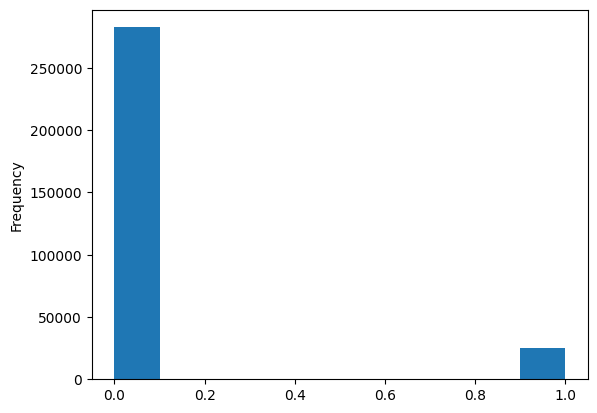

In [ ]:
app_train['TARGET'].astype(int).plot.hist();

In [ ]:
str((app_train['TARGET'] == 1).mean() * 100)+ "% don't have paid"

"8.072881945686495% don't have paid"

From this information, we see this is an [_imbalanced class problem_](http://www.chioka.in/class-imbalance-problem/). There are far more loans that were repaid on time than loans that were not repaid. Once we get into more sophisticated machine learning models, we can [weight the classes](http://xgboost.readthedocs.io/en/latest/parameter.html) by their representation in the data to reflect this imbalance.

## Examine Missing Values

Next we can look at the number and percentage of missing values in each column.

When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can [handle missing values with no need for imputation](https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase). Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

### Columns Description & Missing Values Analysis

In this section, we perform a detailed analysis of the columns and missing values for all CSV files within the input folder. The results of this analysis are saved in the specified output folder.

#### Function Overview:

**Function:** `analyze_missing_values_and_columns_description`

**Purpose:** 
- To analyze missing values across all CSV files in the input folder.
- To provide detailed descriptions of the columns in these files.

**Parameters:**
- **input_folder (str):** The path to the folder containing the CSV files to be analyzed.
- **output_folder (str):** The path to the folder where the analysis reports will be saved.
- **columns_description_file (str):** The path to the file containing descriptions of the columns.
- **main_file (str):** The main CSV file to focus the analysis on.
- **files_with_target (list, optional):** A list of files that include a target column for focused analysis.
- **target_column (str, optional):** The name of the target column to analyze, if applicable.
- **analyze_columns (list, optional):** Specific columns to analyze in detail.
- **extract_columns (list, optional):** Specific columns to extract for the analysis.
- **testing (bool, optional):** If enabled, limits the analysis to a subset of rows for quick testing.
- **max_rows (int, optional):** Maximum number of rows to analyze in testing mode (default is 1000).
- **exclude_files (list, optional):** A list of files to exclude from the analysis.
- **testing_output_folder (str, optional):** The folder to store testing data outputs.
- **chunksize (int, optional):** The number of rows to process at a time, useful for handling large files (default is 50,000).

By running this function, we obtain a comprehensive overview of the dataset, including the extent and distribution of missing values, and detailed descriptions of each column. This information is critical for understanding data quality and preparing for further data processing and analysis.

### Method

In [ ]:
def analyze_missing_values_and_columns_description(input_folder, output_folder, columns_description_file, main_file, files_with_target=None, target_column=None, analyze_columns=None, extract_columns=None, testing=False, max_rows=1000, exclude_files=None, testing_output_folder="testing_data", chunksize=50000, compression_type='gzip'):
    """
    Analyze missing values for all CSV files in the input folder, and save reports in the output folder.
    """

    def missing_values_table(df, df_name):
        """
        Create a table with the number and percentage of missing values for each column of the DataFrame.
        """
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
        mis_val_table_ren_columns['DataFrame Name'] = df_name
        mis_val_table_ren_columns.index.name = 'Row'
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

    def column_metadata(df, df_name, target_column=None):
        """
        Create a table with metadata for each column of the DataFrame, including correlation with the target column.
        """
        metadata = []
        for col in df.columns:
            corr = None
            if target_column and target_column in df.columns and col != target_column:
                if df[col].dtype in [float, int]:
                    if df[col].var() != 0 and df[col].notnull().sum() > 1:
                        try:
                            corr = df[col].corr(df[target_column])
                        except FloatingPointError:
                            corr = None
            col_type = df[col].dtype
            unique_vals = df[col].nunique()
            metadata.append({
                'Row': col,
                'Corr_Target_Before_Cleaning': corr,
                'Data_Type': col_type,
                'Unique_Values': unique_vals,
                'DataFrame Name': df_name
            })
        metadata_df = pd.DataFrame(metadata)
        metadata_df.set_index('Row', inplace=True)
        return metadata_df

    # Load the column descriptions
    hccd = pd.read_csv(os.path.join(input_folder, columns_description_file), encoding="ISO-8859-1")

    hccd.rename(columns={'Table': 'DataFrame Name'}, inplace=True)
    
    # Check that 'Row' and 'DataFrame Name' are in hccd
    if 'Row' not in hccd.columns or 'DataFrame Name' not in hccd.columns:
        raise KeyError("The columns 'Row' and 'DataFrame Name' must be present in the columns description file.")

    # Load the main file containing the target column
    main_df = pd.read_csv(os.path.join(input_folder, main_file))

    # Check if the output folder exists, otherwise create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # If in testing mode, create the subfolder for testing data
    if testing:
        testing_output_folder = os.path.join(output_folder, testing_output_folder)
        if not os.path.exists(testing_output_folder):
            os.makedirs(testing_output_folder)

    # List all CSV files in the input folder
    csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

    # Exclude specified files
    if exclude_files:
        csv_files = [f for f in csv_files if f not in exclude_files]

    # Initialize lists to store missing values and metadata results
    missing_values_list = []
    metadata_list = []

    # Handle application_train.csv and application_test.csv separately
    train_file = 'application_train.csv'
    test_file = 'application_test.csv'

    for filename in [train_file, test_file]:
        file_path = os.path.join(input_folder, filename)
        print(f"\nAnalyzing {file_path}...")

        # Load data in chunks
        chunk_iter = pd.read_csv(file_path, chunksize=chunksize)

        for chunk in chunk_iter:
            if testing:
                chunk = chunk.head(max_rows)

            if extract_columns:
                chunk = chunk[extract_columns]

            if 'SK_ID_CURR' in chunk.columns:
                chunk = chunk.merge(main_df[['SK_ID_CURR', target_column]], on='SK_ID_CURR', how='left')

            missing_values = missing_values_table(chunk, filename)
            missing_values_list.append(missing_values)

            if files_with_target and filename in files_with_target:
                metadata = column_metadata(chunk, filename, target_column)
            else:
                metadata = column_metadata(chunk, filename)

            metadata_list.append(metadata)

    # Process other CSV files
    for filename in tqdm(csv_files, desc="Analyzing missing values and column metadata", unit="file"):
        if filename in [train_file, test_file, main_file]:
            continue  # The train/test/main files are already loaded or will be skipped

        file_path = os.path.join(input_folder, filename)
        print(f"\nAnalyzing {file_path}...")

        # Load data in chunks
        chunk_iter = pd.read_csv(file_path, chunksize=chunksize)

        for chunk in chunk_iter:
            if testing:
                chunk = chunk.head(max_rows)

            if extract_columns:
                chunk = chunk[extract_columns]

            if 'SK_ID_CURR' in chunk.columns:
                chunk = chunk.merge(main_df[['SK_ID_CURR', target_column]], on='SK_ID_CURR', how='left')
            elif 'SK_ID_BUREAU' in chunk.columns:
                chunk = chunk.merge(main_df[['SK_ID_CURR', target_column]], left_on='SK_ID_BUREAU', right_on='SK_ID_CURR', how='left')
            elif 'SK_ID_PREV' in chunk.columns:
                chunk = chunk.merge(main_df[['SK_ID_CURR', target_column]], left_on='SK_ID_PREV', right_on='SK_ID_CURR', how='left')

            missing_values = missing_values_table(chunk, filename)
            missing_values_list.append(missing_values)

            if files_with_target and filename in files_with_target:
                metadata = column_metadata(chunk, filename, target_column)
            else:
                metadata = column_metadata(chunk, filename)

            metadata_list.append(metadata)

    concat_missing_values = pd.concat(missing_values_list, axis=0)
    concat_metadata = pd.concat(metadata_list, axis=0)

    concat_missing_values.reset_index(inplace=True)
    concat_metadata.reset_index(inplace=True)

    print("Missing Values DataFrame Columns:", concat_missing_values.columns)
    print("Metadata DataFrame Columns:", concat_metadata.columns)

    # Check if 'Row' and 'DataFrame Name' columns exist before merging
    if 'Row' not in concat_missing_values.columns or 'Row' not in concat_metadata.columns:
        raise KeyError("The 'Row' column is missing in one of the dataframes.")
    if 'DataFrame Name' not in concat_missing_values.columns or 'DataFrame Name' not in concat_metadata.columns:
        raise KeyError("The 'DataFrame Name' column is missing in one of the dataframes.")

    # Merge with column descriptions using 'Row' and 'DataFrame Name'
    result_all_columns = pd.merge(hccd, concat_missing_values, on=["Row", "DataFrame Name"], how="inner")
    result_all_columns = pd.merge(result_all_columns, concat_metadata, on=["Row", "DataFrame Name"], how="inner")

    if testing:
        output_file_path = os.path.join(testing_output_folder, 'hccd_and_missing_values_all_dfs.csv')
    else:
        output_file_path = os.path.join(output_folder, 'hccd_and_missing_values_all_dfs.csv')

    if compression_type == 'gzip':
        with gzip.open(output_file_path + '.gz', 'wt') as f:
            result_all_columns.to_csv(f, index=True)
        print(f"Missing values and column metadata analysis saved to {output_file_path}.gz")
    elif compression_type == 'snappy':
        compressed_output_path = output_file_path + '.snappy'
        result_all_columns.to_csv(output_file_path, index=True)
        with open(output_file_path, 'rb') as f_in, open(compressed_output_path, 'wb') as f_out:
            f_out.write(snappy.compress(f_in.read()))
        os.remove(output_file_path)  # Remove the uncompressed file after compression
        print(f"Missing values and column metadata analysis saved to {compressed_output_path}")
    else:
        result_all_columns.to_csv(output_file_path, index=True)
        print(f"Missing values and column metadata analysis saved to {output_file_path}")

### Call

In [ ]:
analyze_missing_values_and_columns_description(
        input_folder=LOCAL_RESOURCES_FOLDER_PATH,
        output_folder=LOCAL_EXPORT_COLUMNS_METADATA_FILES_FOLDER_PATH,
        main_file='application_train.csv',
        chunksize=GENERAL_CHUNK_SIZE,
        files_with_target=["application_train.csv", "previous_application.csv"],
        target_column='TARGET',
        columns_description_file='HomeCredit_columns_description.csv',
        analyze_columns=None,
        extract_columns=None,
        testing=TESTING_MODE,
        max_rows=TESTING_MODE_MAX_LINES,
        exclude_files=['application_test.csv','HomeCredit_columns_description.csv','sample_submission.csv','credit_card_balance.csv'],
        testing_output_folder=TESTING_MODE_SUB_FOLDER_NAME,
        compression_type='gzip'
  )


Analyzing ../data/raw/application_train.csv...

Analyzing ../data/raw/application_test.csv...


Analyzing missing values and column metadata:   0%|          | 0/6 [00:00<?, ?file/s]


Analyzing ../data/raw/previous_application.csv...


Analyzing missing values and column metadata:  17%|█▋        | 1/6 [00:08<00:43,  8.63s/file]


Analyzing ../data/raw/POS_CASH_balance.csv...


Analyzing missing values and column metadata:  33%|███▎      | 2/6 [00:23<00:49, 12.49s/file]


Analyzing ../data/raw/bureau_balance.csv...


Analyzing missing values and column metadata:  50%|█████     | 3/6 [00:50<00:57, 19.19s/file]


Analyzing ../data/raw/bureau.csv...


Analyzing missing values and column metadata:  83%|████████▎ | 5/6 [00:54<00:09,  9.36s/file]


Analyzing ../data/raw/installments_payments.csv...


Analyzing missing values and column metadata: 100%|██████████| 6/6 [01:16<00:00, 12.74s/file]


Missing Values DataFrame Columns: Index(['Row', 'Missing Values', '% of Total Values', 'DataFrame Name'], dtype='object')
Metadata DataFrame Columns: Index(['Row', 'Corr_Target_Before_Cleaning', 'Data_Type', 'Unique_Values',
       'DataFrame Name'],
      dtype='object')
Missing values and column metadata analysis saved to ../data/interim/columns_metadata_files/hccd_and_missing_values_all_dfs.csv.gz


In [ ]:
def read_compressed_csv_in_chunks(file_path, compression_type='gzip', chunksize=50000):
    """
    Read the first chunk of a compressed CSV file.

    Parameters:
    - file_path (str): Path to the compressed CSV file.
    - compression_type (str): Type of compression ('gzip' or 'snappy').
    - chunksize (int): Number of rows per chunk.

    Returns:
    - pd.DataFrame: The first chunk of the DataFrame.
    """
    if compression_type == 'gzip':
        with gzip.open(file_path, 'rt') as f:
            chunk_iter = pd.read_csv(f, chunksize=chunksize)
            first_chunk = next(chunk_iter)
            return first_chunk

    elif compression_type == 'snappy':
        with open(file_path, 'rb') as f:
            decompressed_data = snappy.decompress(f.read())
            chunk_iter = pd.read_csv(io.StringIO(decompressed_data.decode('utf-8')), chunksize=chunksize)
            first_chunk = next(chunk_iter)
            return first_chunk

    else:
        raise ValueError("Unsupported compression type. Use 'gzip' or 'snappy'.")

In [ ]:
hccd_and_mission_values_all_dfs = read_compressed_csv_in_chunks(
    file_path=f'{LOCAL_EXPORT_COLUMNS_METADATA_FILES_FOLDER_PATH}/hccd_and_missing_values_all_dfs.csv.gz', 
    compression_type='gzip',
    chunksize=GENERAL_CHUNK_SIZE)

In [ ]:
hccd_and_mission_values_all_dfs.head()

,Unnamed: 0.1,Unnamed: 0,DataFrame Name,Row,Description,Special,Missing Values,% of Total Values,Corr_Target_Before_Cleaning,Data_Type,Unique_Values
0,0,125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed,0,0.0,NaN,int64,2011
1,1,125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed,0,0.0,NaN,int64,1980
2,2,125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed,0,0.0,NaN,int64,2087
3,3,125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed,0,0.0,NaN,int64,2062
4,4,125,bureau.csv,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed,0,0.0,NaN,int64,2035


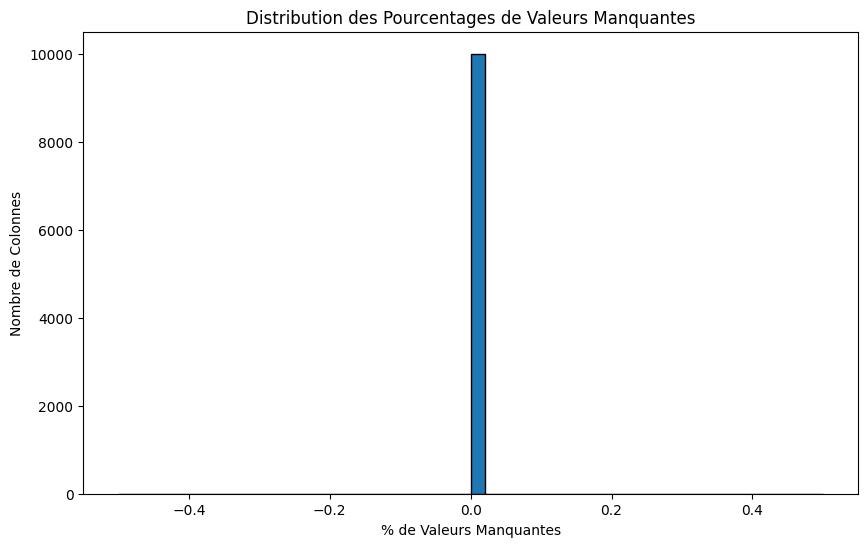

In [ ]:
def plot_missing_values_histogram(df):
    plt.figure(figsize=(10, 6))
    df['% of Total Values'].hist(bins=50, edgecolor='k')
    plt.title('Distribution des Pourcentages de Valeurs Manquantes')
    plt.xlabel('% de Valeurs Manquantes')
    plt.ylabel('Nombre de Colonnes')
    plt.grid(False)
    plt.show()

# Exemple d'utilisation
plot_missing_values_histogram(hccd_and_mission_values_all_dfs)

### First Analysis Reports for All DataFrames

In this section, we generate comprehensive Sweetviz reports for all CSV files located in the input folder. These reports are saved as HTML files in the designated output folder, providing a detailed overview and analysis of the datasets.

#### Process Overview:

1. **Input and Output Folders:**
   - **Input Folder:** Specifies the path to the folder containing the CSV files to be analyzed.
   - **Output Folder:** Specifies the path to the folder where the generated HTML reports will be saved.

2. **Columns Specification:**
   - **Analyze Columns:** A list of columns to be analyzed in detail.
   - **Extract Columns:** A list of columns to be extracted for the analysis.

3. **Testing Mode:**
   - **Testing:** If enabled, the analysis is limited to a specified number of rows for quick testing.
   - **Max Lines:** The maximum number of rows to analyze when in testing mode.

4. **File Exclusions:**
   - **Exclude Files:** A list of files to be excluded from the analysis.

5. **Testing Output Subfolder:**
   - **Testing Output Subfolder:** The name of the subfolder where test data will be stored when in testing mode.

This automated report generation helps in quickly understanding the structure, content, and key statistics of the datasets, facilitating informed decision-making and further data processing.

### Method

In [ ]:
def generate_sweetviz_reports(input_folder, output_folder, analyze_columns=None, extract_columns=None, testing=False, max_lines=1000, exclude_files=None, testing_output_subfolder="testing_data"):
    """
    Génère des rapports Sweetviz pour tous les fichiers CSV dans le dossier d'entrée
    et enregistre les rapports dans le dossier de sortie.

    Parameters:
    input_folder (str): Le chemin du dossier contenant les fichiers CSV.
    output_folder (str): Le chemin du dossier où les rapports HTML seront enregistrés.
    analyze_columns (list): Liste des colonnes à analyser.
    extract_columns (list): Liste des colonnes à extraire.
    testing (bool): Mode testing pour analyser seulement les max_lines premières lignes.
    max_lines (int): Nombre maximum de lignes à analyser en mode testing.
    exclude_files (list): Liste des fichiers à exclure de l'analyse.
    testing_output_subfolder (str): Nom du sous-dossier pour les données de test en mode testing.
    """
    # Déterminer le dossier de sortie final
    if testing:
        output_folder = os.path.join(output_folder, testing_output_subfolder)

    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Lister tous les fichiers CSV dans le dossier d'entrée
    csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

    # Exclure les fichiers spécifiés
    if exclude_files:
        csv_files = [f for f in csv_files if f not in exclude_files]

    # Parcourir les fichiers CSV avec une barre de progression
    for filename in tqdm(csv_files, desc="Generating Sweetviz reports", unit="file"):
        file_path = os.path.join(input_folder, filename)
        print(f"\nAnalyzing {file_path}...")

        # Charger les données
        df = pd.read_csv(file_path)

        # Mode testing : limiter le nombre de lignes
        if testing:
            df = df.head(max_lines)

        # Appliquer les colonnes à extraire si spécifiées
        if extract_columns:
            df = df[extract_columns]

        # Générer le rapport
        if analyze_columns:
            report = sv.analyze(df[analyze_columns])
        else:
            report = sv.analyze(df)

        # Chemin du fichier de sortie
        output_file_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_sweetviz_report.html")

        # Enregistrer le rapport en HTML
        report.show_html(output_file_path, open_browser=False)
        print(f"Report saved to {output_file_path}")


```mermaid
graph TD
A[Start] --> B{Is it Open Source?}
B -- Yes --> C[Perfect for Nextcloud]
B -- No --> D[Look for Alternatives]


In [5]:
import IPython

In [7]:
%%markdown
```mermaid
graph TD
A[Start] --> B{Is it Open Source?}
B -- Yes --> C[Perfect for Nextcloud]
B -- No --> D[Look for Alternatives]
```

```mermaid
graph TD
A[Start] --> B{Is it Open Source?}
B -- Yes --> C[Perfect for Nextcloud]
B -- No --> D[Look for Alternatives]
```


### Call

In [57]:
 generate_sweetviz_reports(
     input_folder=LOCAL_RESOURCES_FOLDER_PATH,
     output_folder=LOCAL_EXPORT_FIRST_SWEETVIZ_REPORTS_FOLDER_PATH,
     analyze_columns=None,
     extract_columns=None,
     testing=TESTING_MODE,
     max_lines=TESTING_MODE_MAX_LINES,
     exclude_files=['HomeCredit_columns_description.csv','sample_submission.csv'],
     testing_output_subfolder=TESTING_MODE_SUB_FOLDER_NAME)


Analyzing ../data/raw/previous_application.csv...


                                             |          | [  0%]   00:00 -> (? left)

Report ../data/interim/first_sweetviz_reports/previous_application_sweetviz_report.html was generated.
---
(likely due to only having a single row, containing non-NaN values for both correlated features)
Affected correlations:['RATE_INTEREST_PRIMARY/DAYS_FIRST_DRAWING', 'RATE_INTEREST_PRIVILEGED/DAYS_FIRST_DRAWING', 'DAYS_FIRST_DRAWING/RATE_INTEREST_PRIMARY', 'DAYS_FIRST_DRAWING/RATE_INTEREST_PRIVILEGED']
Report saved to ../data/interim/first_sweetviz_reports/previous_application_sweetviz_report.html

Analyzing ../data/raw/POS_CASH_balance.csv...


                                             |          | [  0%]   00:00 -> (? left)

Report ../data/interim/first_sweetviz_reports/POS_CASH_balance_sweetviz_report.html was generated.
Report saved to ../data/interim/first_sweetviz_reports/POS_CASH_balance_sweetviz_report.html

Analyzing ../data/raw/bureau_balance.csv...


                                             |          | [  0%]   00:00 -> (? left)

Report ../data/interim/first_sweetviz_reports/bureau_balance_sweetviz_report.html was generated.
Report saved to ../data/interim/first_sweetviz_reports/bureau_balance_sweetviz_report.html

Analyzing ../data/raw/application_train.csv...


                                             |          | [  0%]   00:00 -> (? left)

Report ../data/interim/first_sweetviz_reports/application_train_sweetviz_report.html was generated.
Report saved to ../data/interim/first_sweetviz_reports/application_train_sweetviz_report.html

Analyzing ../data/raw/bureau.csv...


                                             |          | [  0%]   00:00 -> (? left)

Report ../data/interim/first_sweetviz_reports/bureau_sweetviz_report.html was generated.
Report saved to ../data/interim/first_sweetviz_reports/bureau_sweetviz_report.html

Analyzing ../data/raw/credit_card_balance.csv...


                                             |          | [  0%]   00:00 -> (? left)

Report ../data/interim/first_sweetviz_reports/credit_card_balance_sweetviz_report.html was generated.
Report saved to ../data/interim/first_sweetviz_reports/credit_card_balance_sweetviz_report.html

Analyzing ../data/raw/installments_payments.csv...


                                             |          | [  0%]   00:00 -> (? left)

Report ../data/interim/first_sweetviz_reports/installments_payments_sweetviz_report.html was generated.
Report saved to ../data/interim/first_sweetviz_reports/installments_payments_sweetviz_report.html

Analyzing ../data/raw/application_test.csv...


                                             |          | [  0%]   00:00 -> (? left)

Generating Sweetviz reports: 100%|██████████| 8/8 [18:50<00:00, 141.26s/file]

Report ../data/interim/first_sweetviz_reports/application_test_sweetviz_report.html was generated.
Report saved to ../data/interim/first_sweetviz_reports/application_test_sweetviz_report.html


## Handling Missing Values

In this section, we address the issue of missing values in our dataset by replacing empty values with `NaN` (Not a Number). This is a crucial step for data cleaning, as it standardizes missing entries, allowing us to apply various imputation techniques or handle them appropriately in subsequent analysis.

The process involves:

1. **Identifying Empty Values:** We scan the dataset to locate cells that are empty or contain placeholder values indicating missing data.
2. **Replacing with NaN:** Using pandas, we replace these empty values with `NaN`. This ensures that missing data is explicitly marked and can be easily identified and managed in future steps.

By converting empty values to `NaN`, we can leverage pandas' robust functionality to handle missing data effectively, whether through imputation, exclusion, or analysis.

### Method

In [58]:
def load_and_preprocess_dataframes(input_folder, export_folder, chunk_size=100000, ignore_files=None, max_lines=None, testing=False, testing_subfolder="testing_data"):
    """
    Charge plusieurs DataFrames à partir de fichiers CSV dans un dossier, remplace les valeurs vides par NaN,
    et exporte les DataFrames corrigés dans un autre dossier.

    :param input_folder: Dossier contenant les fichiers CSV à charger
    :param export_folder: Dossier où les DataFrames corrigés seront exportés
    :param chunk_size: Taille des chunks pour le traitement des DataFrames
    :param ignore_files: Liste de fichiers à ignorer lors du traitement
    :param max_lines: Nombre maximum de lignes à traiter par fichier (uniquement pris en compte si testing est True)
    :param testing: Booléen indiquant si le mode test est activé
    :param testing_subfolder: Nom du sous-dossier pour les données de test en mode testing
    :return: Dictionnaire des DataFrames corrigés
    """
    if ignore_files is None:
        ignore_files = []

    if testing:
        export_folder = os.path.join(export_folder, testing_subfolder)

    if not os.path.exists(export_folder):
        os.makedirs(export_folder)

    # Lister tous les fichiers CSV dans le dossier d'entrée, en excluant les fichiers ignorés
    csv_files = {os.path.splitext(file)[0]: os.path.join(input_folder, file)
                 for file in os.listdir(input_folder) if file.endswith('.csv') and file not in ignore_files}

    for key, path in csv_files.items():
        corrected_file_path = os.path.join(export_folder, f"{key}.csv")
        total_lines_processed = 0

        try:
            with pd.read_csv(path, chunksize=chunk_size) as reader:
                for i, chunk in enumerate(reader):
                    if testing and max_lines is not None and total_lines_processed >= max_lines:
                        break

                    if testing and max_lines is not None:
                        lines_to_process = chunk.head(max_lines - total_lines_processed)
                    else:
                        lines_to_process = chunk

                    total_lines_processed += len(lines_to_process)

                    lines_to_process.replace(['', ' ', 'NA', 'N/A', None, 'NaN'], np.nan, inplace=True)
                    mode = 'w' if i == 0 else 'a'
                    header = i == 0
                    lines_to_process.to_csv(corrected_file_path, mode=mode, header=header, index=False)
                    print(f"{key}: chunk {i + 1} processed and saved to {corrected_file_path}")

            print(f"Completed processing for {key}.")
        except Exception as e:
            print(f"Failed to process {path} due to {e}")

    print(f"All files processed and saved to {export_folder}")

### Call

In [59]:
load_and_preprocess_dataframes(
    input_folder=LOCAL_RESOURCES_FOLDER_PATH,
    export_folder=LOCAL_EXPORT_MISSING_VALUES_REPLACED_FOLDER_PATH,
    chunk_size=GENERAL_CHUNK_SIZE,
    ignore_files=["HomeCredit_columns_description.csv",'sample_submission.csv'],
    max_lines=TESTING_MODE_MAX_LINES,
    testing=TESTING_MODE,
    testing_subfolder=TESTING_MODE_SUB_FOLDER_NAME
)

previous_application: chunk 1 processed and saved to ../data/interim/missing_values_replaced/previous_application.csv
previous_application: chunk 2 processed and saved to ../data/interim/missing_values_replaced/previous_application.csv
previous_application: chunk 3 processed and saved to ../data/interim/missing_values_replaced/previous_application.csv
previous_application: chunk 4 processed and saved to ../data/interim/missing_values_replaced/previous_application.csv
previous_application: chunk 5 processed and saved to ../data/interim/missing_values_replaced/previous_application.csv
previous_application: chunk 6 processed and saved to ../data/interim/missing_values_replaced/previous_application.csv
previous_application: chunk 7 processed and saved to ../data/interim/missing_values_replaced/previous_application.csv
previous_application: chunk 8 processed and saved to ../data/interim/missing_values_replaced/previous_application.csv
previous_application: chunk 9 processed and saved to ../

### Columns Types Verification

In this section, we verify and analyze the data types of columns in CSV files, logging detailed type summaries and ensuring proper data type conversions.

#### Process Overview:

1. **Logging Configuration:**
   - Set up logging to record data processing activities and errors.

2. **Analyze Chunk Types:**
   - **Function:** `analyze_chunk_types(chunk)`
   - **Purpose:** Analyzes the data types of each column in a chunk of the CSV file.
   - **Method:** Iterates over columns, detects data types, and calculates the proportion of each type.

3. **Detect Data Type:**
   - **Function:** `detect_type(value)`
   - **Purpose:** Identifies the type of a given value (e.g., integer, float, datetime, boolean, string).

4. **Merge and Normalize Type Summaries:**
   - **Function:** `merge_type_summaries(main_summary, chunk_summary)`
   - **Purpose:** Merges type summaries from multiple chunks into a main summary.
   - **Function:** `normalize_type_summaries(type_summary, total_chunks)`
   - **Purpose:** Normalizes the type summaries by the number of chunks processed.

5. **Display and Save Type Summaries:**
   - **Function:** `display_type_summary(file_name, type_summary)`
   - **Purpose:** Logs the type summary for each column.
   - **Function:** `save_type_summary_report(file_name, type_summary)`
   - **Purpose:** Saves the type summary report to a file.

6. **Convert Column Types:**
   - **Function:** `convert_column_types(data, type_summary, identifier_columns)`
   - **Purpose:** Converts columns to their most frequent data type, handling special cases for identifier columns.

7. **Generate and Save Reports:**
   - **Function:** `generate_report(file_name, type_summary_before, type_summary_after)`
   - **Purpose:** Generates a detailed report of column types before and after conversion.
   - **Function:** `save_type_summary_report(file_name, type_summary)`
   - **Purpose:** Saves the type summary report to a specified file.

8. **Load and Preprocess DataFrames:**
   - **Function:** `load_and_preprocess_dataframes(...)`
   - **Purpose:** Loads CSV files, processes them in chunks, replaces placeholders for missing values, normalizes type summaries, and saves the corrected data.

By following this structured approach, we ensure that all columns have consistent and appropriate data types, facilitating accurate analysis and further processing.

### Method

In [64]:
# Configure logging
logging.basicConfig(filename='data_processing.log', level=logging.INFO,
                    format='%(asctime)s %(levelname)s:%(message)s')

def analyze_chunk_types(chunk):
    type_summary = defaultdict(Counter)
    for column in chunk.columns:
        type_counts = chunk[column].apply(detect_type).value_counts(normalize=True)
        for dtype, percentage in type_counts.items():
            type_summary[column][dtype] += percentage * len(chunk) / len(chunk.index)
    return type_summary

def detect_type(value):
    if pd.isnull(value):
        return 'null'
    try:
        int(value)
        return 'int'
    except ValueError:
        pass
    try:
        float(value)
        return 'float'
    except ValueError:
        pass
    try:
        pd.to_datetime(value)
        return 'datetime'
    except (ValueError, TypeError):
        pass
    if str(value).lower() in ['true', 'false']:
        return 'bool'
    return 'str'

def merge_type_summaries(main_summary, chunk_summary):
    for column, types in chunk_summary.items():
        for dtype, percentage in types.items():
            main_summary[column][dtype] += percentage

def normalize_type_summaries(type_summary, total_chunks):
    if total_chunks == 0:
        return type_summary
    for column, types in type_summary.items():
        for dtype in types:
            type_summary[column][dtype] /= total_chunks
    return type_summary

def display_type_summary(file_name, type_summary):
    logging.info(f"\nFile: {file_name}")
    for column, types in type_summary.items():
        logging.info(f"Column: {column}")
        for dtype, percentage in types.items():
            logging.info(f"  {dtype}: {percentage:.2%}")

def get_most_frequent_type(column_types):
    if not column_types:
        return None
    return max(column_types, key=column_types.get)

def convert_column_types(data, type_summary, identifier_columns):
    for column, types in type_summary.items():
        if column in identifier_columns:
            data[column] = data[column].astype(str)
            continue

        most_frequent_type = get_most_frequent_type(types)
        if most_frequent_type:
            try:
                if most_frequent_type == 'int':
                    data[column] = pd.to_numeric(data[column], errors='coerce')
                    data[column] = data[column].fillna(0).astype('Int64')
                elif most_frequent_type == 'float':
                    data[column] = pd.to_numeric(data[column], errors='coerce')
                elif most_frequent_type == 'bool':
                    data[column] = data[column].astype(bool)
                elif most_frequent_type == 'datetime':
                    data[column] = pd.to_datetime(data[column], errors='coerce')
                elif most_frequent_type == 'str':
                    data[column] = data[column].astype(str)
                elif most_frequent_type == 'categorical':
                    if data[column].nunique() < len(data[column]) * 0.05:
                        data[column] = data[column].astype('category')
            except Exception as e:
                logging.error(f"Error converting column {column} to {most_frequent_type}: {e}")
    return data

def generate_report(file_name, type_summary_before, type_summary_after):
    report = f"\nFile: {file_name}\n"
    report += "Column Type Summary Before Conversion:\n"
    for column, types in type_summary_before.items():
        report += f"  Column: {column}\n"
        for dtype, percentage in types.items():
            report += f"    {dtype}: {percentage:.2%}\n"
    report += "Column Type Summary After Conversion:\n"
    for column, types in type_summary_after.items():
        report += f"  Column: {column}\n"
        for dtype in types:
            report += f"    {dtype}\n"
    return report

def save_type_summary_report(file_name, type_summary):
    report = f"Type Summary for {file_name}:\n"
    for column, types in type_summary.items():
        report += f"  {column}:\n"
        for dtype, percentage in types.items():
            report += f"    {dtype}: {percentage:.2%}\n"
    with open(file_name, 'w') as f:
        f.write(report)

def load_and_preprocess_dataframes(input_folder, export_folder, chunk_size=10000, ignore_files=None, max_rows=None, testing=False, testing_sub_folder_name="testing_data", identifier_columns=None):
    if ignore_files is None:
        ignore_files = []

    if identifier_columns is None:
        identifier_columns = []

    if testing:
        input_folder = os.path.join(input_folder, testing_sub_folder_name)
        export_folder = os.path.join(export_folder, testing_sub_folder_name)

    if not os.path.exists(export_folder):
        os.makedirs(export_folder)

    csv_files = {os.path.splitext(file)[0]: os.path.join(input_folder, file)
                 for file in os.listdir(input_folder) if file.endswith('.csv') and file not in ignore_files}

    for key, path in csv_files.items():
        corrected_file_path = os.path.join(export_folder, f"{key}.csv")
        total_lines_processed = 0
        type_summary = defaultdict(Counter)
        chunk_count = 0

        try:
            with pd.read_csv(path, chunksize=chunk_size) as reader:
                for i, chunk in enumerate(reader):
                    if testing and max_rows is not None and total_lines_processed >= max_rows:
                        break

                    if testing and max_rows is not None:
                        lines_to_process = chunk.head(max_rows - total_lines_processed)
                    else:
                        lines_to_process = chunk

                    total_lines_processed += len(lines_to_process)
                    chunk_count += 1

                    chunk_types = analyze_chunk_types(lines_to_process)
                    merge_type_summaries(type_summary, chunk_types)

                    lines_to_process.replace(['', ' ', 'NA', 'N/A', None, 'NaN'], np.nan, inplace=True)
                    mode = 'w' if i == 0 else 'a'
                    header = i == 0
                    lines_to_process.to_csv(corrected_file_path, mode=mode, header=header, index=False)
                    logging.info(f"{key}: chunk {i + 1} processed and saved to {corrected_file_path}")

            # Normalize type summary
            normalized_type_summary = normalize_type_summaries(type_summary, chunk_count)

            # Load the entire file to convert types
            data = pd.read_csv(corrected_file_path)
            data = convert_column_types(data, normalized_type_summary, identifier_columns)
            data.to_csv(corrected_file_path, index=False)

            # Generate and log the report
            final_type_summary = analyze_chunk_types(data)
            report = generate_report(key, normalized_type_summary, final_type_summary)
            logging.info(report)

            # Save the type summary report to a file
            report_file_path = os.path.join(export_folder, f"{key}_type_summary.txt")
            save_type_summary_report(report_file_path, final_type_summary)

            logging.info(f"Completed processing and profiling for {key}.")
        except Exception as e:
            logging.error(f"Failed to process {path} due to {e}")

    logging.info(f"All files processed and saved to {export_folder}")


### Call

In [65]:
load_and_preprocess_dataframes(
    input_folder=LOCAL_EXPORT_MISSING_VALUES_REPLACED_FOLDER_PATH,
    export_folder=LOCAL_EXPORT_COLUMNS_TYPES_CHECKED_FOLDER_PATH,
    chunk_size=GENERAL_CHUNK_SIZE,
    ignore_files=None,
    max_rows=TESTING_MODE_MAX_LINES,
    testing=TESTING_MODE,
    testing_sub_folder_name=TESTING_MODE_SUB_FOLDER_NAME,
    identifier_columns=["SK_ID_PREV", "SK_ID_CURR","SK_ID_BUREAU"])

In [66]:
test = pd.read_csv(LOCAL_EXPORT_COLUMNS_TYPES_CHECKED_FOLDER_PATH+"/testing_data/application_train.csv")

In [67]:
test.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


## Imputation

In this section, we focus on handling missing data through various imputation techniques. This process ensures that our datasets are complete and ready for analysis by filling in missing values systematically.

#### Components:

1. **Column Types Management:**
   - **save_column_types(df):** Saves the original data types of columns.
   - **restore_column_types(df, column_types):** Restores the data types of columns after processing.

2. **Data Preparation for Imputation:**
   - **prepare_data_for_imputation(df, logger, exclude_columns, missing_threshold, extreme_value_threshold, small_value_threshold, round_decimals):**
     - Prepares the data by handling missing values, capping extreme values, ensuring uniform data types, and logging key steps.

3. **Impute and Save DataFrames:**
   - **impute_and_save_dataframes_from_folder(input_folder, imputations, exclude_columns, chunk_size, output_folder, clean_memory, testing, max_rows, testing_data_sub_folder, round_decimals, log_level, export_logs, log_folder_path):**
     - Processes each CSV file in the input folder.
     - Applies various imputation methods to handle missing data.
     - Logs the progress and results.
     - Saves the imputed data to the output folder.

4. **Imputation Techniques:**
   - A list of imputation strategies including median, mean, most frequent, constant, KNN, iterative, forward fill (ffill), and backward fill (bfill).

By following this structured approach, we ensure that our datasets are free of missing values, which enhances the quality and reliability of subsequent analyses. The logger provides detailed insights and traceability for the entire imputation process, while the various imputation techniques offer flexibility to handle different types of missing data scenarios.

### Imputation methods

In [68]:
class Logger:
    def __init__(self, level=4, export_logs=False, log_folder_path='logs'):
        self.log_level = level
        self.export_logs = export_logs
        self.log_folder_path = log_folder_path
        self.log_messages = []

    def log(self, message, level=4, color=None):
        if level <= self.log_level:
					 
											  
				 
            print(message)
            self.log_messages.append(message)

    def export(self, log_file_name='logs.txt'):
        if self.export_logs:
            log_file_path = os.path.join(self.log_folder_path, log_file_name)
            os.makedirs(self.log_folder_path, exist_ok=True)
            with open(log_file_path, 'w') as log_file:
                for message in self.log_messages:
                    log_file.write(message + '\n')
            print(f'Logs exported to {log_file_path}')

# Save original data types of columns
def save_column_types(df):
    return df.dtypes.to_dict()

# Restore data types of columns
def restore_column_types(df, column_types):
    for column, dtype in column_types.items():
        df[column] = df[column].astype(dtype)
    return df

def prepare_data_for_imputation(df, logger, exclude_columns=None, missing_threshold=0.8, extreme_value_threshold=1e15, small_value_threshold=1e-10, round_decimals=None):
    if exclude_columns is None:
        exclude_columns = []
    logger.log("Starting data preparation", 2)

    # Initial data stats
    logger.log(f"Initial dataframe shape: {df.shape}", 3)
    logger.log(f"Initial columns with missing values above {missing_threshold * 100}%:", 3)
    for col in df.columns:
        if col in exclude_columns:
            continue
        missing_ratio = df[col].isnull().mean()
        if missing_ratio > missing_threshold:
            logger.log(f"Column {col} has {missing_ratio * 100:.2f}% missing values", 4)

    # Drop columns with missing values above the threshold
    missing_ratio = df.isnull().mean()
    cols_to_drop = missing_ratio[missing_ratio > missing_threshold].index
    df = df.drop(columns=[col for col in cols_to_drop if col not in exclude_columns])
    logger.log(f"Dropped columns: {list(set(cols_to_drop) - set(exclude_columns))}", 3)
    logger.log(f"Dataframe shape after dropping columns: {df.shape}", 3)

    # Cap extreme values and replace small values to avoid underflow
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if col in exclude_columns:
            continue
        col_min = df[col].min()
        col_max = df[col].max()
        logger.log(f"Column {col}: min before capping = {col_min}, max before capping = {col_max}", 4)

        df[col] = np.clip(df[col], -extreme_value_threshold, extreme_value_threshold)
        df[col] = df[col].apply(lambda x: small_value_threshold if 0 < abs(x) < small_value_threshold else x)

        col_min_after = df[col].min()
        col_max_after = df[col].max()
        logger.log(f"Column {col}: min after capping = {col_min_after}, max after capping = {col_max_after}", 4)

    # Replace infinite values with NaN
    df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

    # Ensure no duplicated indices
    df = df[~df.index.duplicated(keep='first')]

    # Convert all numeric columns to float64 to ensure uniformity
    df[numeric_cols] = df[numeric_cols].astype(np.float64)

    # Round numerical values if specified
    if round_decimals is not None:
        df[numeric_cols] = df[numeric_cols].round(round_decimals)
        logger.log(f"Rounded numerical values to {round_decimals} decimal places", 3)

    # Log final data stats
    for col in numeric_cols:
        logger.log(f"Column {col}: final min = {df[col].min()}, final max = {df[col].max()}, final NaNs = {df[col].isnull().sum()}", 3)

    logger.log("Data preparation completed", 2)
    return df

def impute_and_save_dataframes_from_folder(input_folder, imputations, exclude_columns=None, chunk_size=10000, output_folder='LOCAL_EXPORT_FOLDER_PATH/',
                                           clean_memory=False, testing=False, max_rows=None, testing_data_sub_folder='testing_data',
                                           round_decimals=None, log_level=4, export_logs=False, log_folder_path='logs'):
    logger = Logger(level=log_level, export_logs=export_logs, log_folder_path=log_folder_path)

    if testing:
        input_folder = os.path.join(input_folder, testing_data_sub_folder)
        output_folder = os.path.join(output_folder, testing_data_sub_folder)
        logger.log_folder_path = os.path.join(logger.log_folder_path, testing_data_sub_folder)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    csv_files = {os.path.splitext(file)[0]: os.path.join(input_folder, file)
                 for file in os.listdir(input_folder) if file.endswith('.csv')}

    total_tasks = len(csv_files) * len(imputations)
    task_count = 0

    results = {}

    for df_name, csv_file in csv_files.items():
        try:
            logger.log(f"Processing file {csv_file}", 2)
            original_df = pd.read_csv(csv_file)
            logger.log(f"Original dataframe shape: {original_df.shape}", 3)
            if testing and max_rows is not None:
                original_df = original_df.iloc[:max_rows]
                logger.log(f"Testing mode: reduced dataframe shape: {original_df.shape}", 3)

            # Save original column types
            original_column_types = save_column_types(original_df)
            logger.log(f"Original column types: {original_column_types}", 3)

            original_df = prepare_data_for_imputation(original_df, logger, exclude_columns, round_decimals=round_decimals)

            results[df_name] = {
                "original": csv_file,
                "imputed": {}
            }

            for imp_name, imputer in imputations:
                try:
                    logger.log(f"Starting imputation for {df_name} using {imp_name}", 2)
                    df = original_df.copy()
                    imputed_chunks = []
                    for chunk_start in tqdm(range(0, df.shape[0], chunk_size), desc=f'Imputing {df_name} with {imp_name}', leave=False):
                        chunk_end = min(chunk_start + chunk_size, df.shape[0])
                        df_chunk = df.iloc[chunk_start:chunk_end].copy()

                        logger.log(f"Processing chunk: rows {chunk_start} to {chunk_end}", 3)
                        for col in df_chunk.select_dtypes(include=[np.number]).columns:
                            logger.log(f"Chunk {chunk_start}-{chunk_end} - Column {col}: min = {df_chunk[col].min()}, max = {df_chunk[col].max()}, NaNs = {df_chunk[col].isnull().sum()}", 4)

                        numeric_cols = df_chunk.select_dtypes(include=[np.number]).columns
                        non_numeric_cols = df_chunk.select_dtypes(exclude=[np.number]).columns

                        if numeric_cols.size > 0:
                            try:
                                numeric_imputer = imputer if isinstance(imputer, (SimpleImputer, KNNImputer, IterativeImputer)) else None
                                if numeric_imputer:
                                    df_chunk[numeric_cols] = numeric_imputer.fit_transform(df_chunk[numeric_cols])
                                else:
                                    df_chunk[numeric_cols] = df_chunk[numeric_cols].apply(imputer)
                            except Exception as e:
                                logger.log(f"Error during numeric imputation for chunk {chunk_start}-{chunk_end}: {e}", 2)
                                df_chunk[numeric_cols] = df_chunk[numeric_cols].fillna(0)

                        if non_numeric_cols.size > 0:
                            try:
                                non_numeric_imputer = SimpleImputer(strategy='most_frequent')
                                df_chunk[non_numeric_cols] = non_numeric_imputer.fit_transform(df_chunk[non_numeric_cols])
                            except Exception as e:
                                logger.log(f"Error during non-numeric imputation for chunk {chunk_start}-{chunk_end}: {e}", 2)
                                df_chunk[non_numeric_cols] = df_chunk[non_numeric_cols].fillna("")

                        # Verify no NaN in the chunk
                        if df_chunk.isnull().any().any():
                            nan_columns = df_chunk.columns[df_chunk.isnull().any()].tolist()
                            logger.log(f"NaN values found in chunk: rows {chunk_start} to {chunk_end}, columns: {nan_columns}", 1)
                            logger.log(f"Attempting to fill remaining NaNs with default value", 2)

                            # Fill NaN with 0 or median
                            for col in nan_columns:
                                if df_chunk[col].dtype == np.number:
																							  
									 
                                    df_chunk[col].fillna(0, inplace=True)
                                else:
                                    df_chunk[col].fillna("", inplace=True)

                            # Verify again
                            if df_chunk.isnull().any().any():
                                nan_columns = df_chunk.columns[df_chunk.isnull().any()].tolist()
                                logger.log(f"Still NaN values found in chunk after default filling: rows {chunk_start} to {chunk_end}, columns: {nan_columns}", 1)
                                raise ValueError(f"NaN values found in the imputed chunk for {df_name} using method {imp_name}")

                        imputed_chunks.append(df_chunk)

                        del df_chunk
                        gc.collect()

                    imputed_df = pd.concat(imputed_chunks, ignore_index=True)

                    # Restore original column types
                    imputed_df = restore_column_types(imputed_df, original_column_types)

                    # Second pass to handle any remaining NaNs
                    remaining_na_cols = imputed_df.columns[imputed_df.isnull().any()].tolist()
                    if remaining_na_cols:
                        logger.log(f"Columns with remaining NaNs after first imputation: {remaining_na_cols}", 3)
                        for col in remaining_na_cols:
                            if imputed_df[col].dtype == np.number:
																							  
								 
                                imputed_df[col].fillna(0, inplace=True)
                            else:
                                imputed_df[col].fillna("", inplace=True)
													   
																							
																										   
																																	   

                    df_output_dir = os.path.join(output_folder, imp_name)
                    os.makedirs(df_output_dir, exist_ok=True)
                    output_file = os.path.join(df_output_dir, f'{df_name}.csv')

                    if os.path.exists(output_file):
                        os.remove(output_file)
                        logger.log(f'Existing file {output_file} removed.', 3)

                    imputed_df.to_csv(output_file, index=False)
                    logger.log(f'Successfully imputed and saved {df_name} using {imp_name} to {output_file}', 2)

                    results[df_name]["imputed"][imp_name] = output_file

                    if clean_memory:
                        del imputed_chunks
                        del df
                        gc.collect()
                        logger.log(f'Original dataframe {df_name} deleted and memory cleaned.', 3)

                except Exception as e:
                    logger.log(f"Failed to impute {df_name} using {imp_name} due to {e}", 1)
                    df_output_dir = os.path.join(output_folder, imp_name)
                    output_file = os.path.join(df_output_dir, f'{df_name}.csv')
                    imputed_df.to_csv(output_file, index=False)
                    logger.log(f"Saving {df_name} using {imp_name} but not changed", 2)
                    

                task_count += 1
                progress = (task_count / total_tasks) * 100
                logger.log(f'Progress: {task_count}/{total_tasks} ({progress:.2f}%)', 2)
                tqdm.write(f'Progress: {task_count}/{total_tasks} ({progress:.2f}%)')
        except Exception as e:
            logger.log(f"Failed to process {csv_file} due to {e}", 2)

    json_output_file = os.path.join(output_folder, f'imputation_results{"_test" if testing else ""}.json')
    with open(json_output_file, 'w') as json_file:
        json.dump(results, json_file, indent=4)
    logger.log(f'Successfully exported imputation results to {json_output_file}', 2)

    logger.export()

### Imputation method settings

In [69]:
imputations = [
    ('median', SimpleImputer(strategy='median')),
    ('mean', SimpleImputer(strategy='mean')),
    ('most_frequent', SimpleImputer(strategy='most_frequent')),
    ('constant_0', SimpleImputer(strategy='constant', fill_value=0)),
    ('knn', KNNImputer(n_neighbors=5)),
    ('iterative', IterativeImputer()),
    ('ffill', lambda x: x.ffill()),  # Forward fill
    ('bfill', lambda x: x.bfill())   # Backward fill
]

### Imputation method call

In [70]:
impute_and_save_dataframes_from_folder(
    input_folder=LOCAL_EXPORT_COLUMNS_TYPES_CHECKED_FOLDER_PATH,
    imputations=imputations,
    chunk_size=GENERAL_CHUNK_SIZE,
    output_folder=LOCAL_EXPORT_IMPUTATION_FOLDER_PATH,
    clean_memory=True,
    exclude_columns=["SK_ID_PREV", "SK_ID_CURR","SK_ID_BUREAU"],
    testing=TESTING_MODE,
    max_rows=TESTING_MODE_MAX_LINES,
    testing_data_sub_folder=TESTING_MODE_SUB_FOLDER_NAME,
    round_decimals=3,
    log_level=2,
    export_logs=True,
    log_folder_path=LOCAL_EXPORT_IMPUTATION_FOLDER_PATH)

Processing file ../data/interim/columns_types_checked/previous_application.csv
Starting data preparation
Data preparation completed
Starting imputation for previous_application using median


Failed to impute previous_application using median due to 'RATE_INTEREST_PRIMARY'
Saving previous_application using median but not changed
Progress: 1/64 (1.56%)
Progress: 1/64 (1.56%)
Starting imputation for previous_application using mean


Failed to impute previous_application using mean due to 'RATE_INTEREST_PRIMARY'
Saving previous_application using mean but not changed
Progress: 2/64 (3.12%)
Progress: 2/64 (3.12%)
Starting imputation for previous_application using most_frequent


Failed to impute previous_application using most_frequent due to 'RATE_INTEREST_PRIMARY'
Saving previous_application using most_frequent but not changed
Progress: 3/64 (4.69%)
Progress: 3/64 (4.69%)
Starting imputation for previous_application using constant_0


Failed to impute previous_application using constant_0 due to 'RATE_INTEREST_PRIMARY'
Saving previous_application using constant_0 but not changed
Progress: 4/64 (6.25%)
Progress: 4/64 (6.25%)
Starting imputation for previous_application using knn


Error during numeric imputation for chunk 0-10000: underflow encountered in multiply


Error during numeric imputation for chunk 10000-20000: underflow encountered in multiply


Error during numeric imputation for chunk 20000-30000: underflow encountered in multiply


Error during numeric imputation for chunk 30000-40000: underflow encountered in multiply


Error during numeric imputation for chunk 40000-50000: underflow encountered in multiply


Error during numeric imputation for chunk 50000-60000: underflow encountered in multiply


Error during numeric imputation for chunk 60000-70000: underflow encountered in multiply


Error during numeric imputation for chunk 70000-80000: underflow encountered in multiply


Error during numeric imputation for chunk 80000-90000: underflow encountered in multiply


Error during numeric imputation for chunk 90000-100000: underflow encountered in multiply


Error during numeric imputation for chunk 100000-110000: underflow encountered in multiply


Error during numeric imputation for chunk 110000-120000: underflow encountered in multiply


Error during numeric imputation for chunk 120000-130000: underflow encountered in multiply


Error during numeric imputation for chunk 130000-140000: underflow encountered in multiply


Error during numeric imputation for chunk 140000-150000: underflow encountered in multiply


Error during numeric imputation for chunk 150000-160000: underflow encountered in multiply


Error during numeric imputation for chunk 160000-170000: underflow encountered in multiply


Error during numeric imputation for chunk 170000-180000: underflow encountered in multiply


Error during numeric imputation for chunk 180000-190000: underflow encountered in multiply


Error during numeric imputation for chunk 190000-200000: underflow encountered in multiply


Error during numeric imputation for chunk 200000-210000: underflow encountered in multiply


Error during numeric imputation for chunk 210000-220000: underflow encountered in multiply


Error during numeric imputation for chunk 220000-230000: underflow encountered in multiply


Error during numeric imputation for chunk 230000-240000: underflow encountered in multiply


Error during numeric imputation for chunk 240000-250000: underflow encountered in multiply


Error during numeric imputation for chunk 250000-260000: underflow encountered in multiply


Error during numeric imputation for chunk 260000-270000: underflow encountered in multiply


Error during numeric imputation for chunk 270000-280000: underflow encountered in multiply


Error during numeric imputation for chunk 280000-290000: underflow encountered in multiply


Error during numeric imputation for chunk 290000-300000: underflow encountered in multiply


Error during numeric imputation for chunk 300000-310000: underflow encountered in multiply


Error during numeric imputation for chunk 310000-320000: underflow encountered in multiply


Error during numeric imputation for chunk 320000-330000: underflow encountered in multiply


Error during numeric imputation for chunk 330000-340000: underflow encountered in multiply


Error during numeric imputation for chunk 340000-350000: underflow encountered in multiply


Error during numeric imputation for chunk 350000-360000: underflow encountered in multiply


Error during numeric imputation for chunk 360000-370000: underflow encountered in multiply


Error during numeric imputation for chunk 370000-380000: underflow encountered in multiply


Error during numeric imputation for chunk 380000-390000: underflow encountered in multiply


Error during numeric imputation for chunk 390000-400000: underflow encountered in multiply


Error during numeric imputation for chunk 400000-410000: underflow encountered in multiply


Error during numeric imputation for chunk 410000-420000: underflow encountered in multiply


Error during numeric imputation for chunk 420000-430000: underflow encountered in multiply


Error during numeric imputation for chunk 430000-440000: underflow encountered in multiply


Error during numeric imputation for chunk 440000-450000: underflow encountered in multiply


Error during numeric imputation for chunk 450000-460000: underflow encountered in multiply


Error during numeric imputation for chunk 460000-470000: underflow encountered in multiply


Error during numeric imputation for chunk 470000-480000: underflow encountered in multiply


Error during numeric imputation for chunk 480000-490000: underflow encountered in multiply


Error during numeric imputation for chunk 490000-500000: underflow encountered in multiply


Error during numeric imputation for chunk 500000-510000: underflow encountered in multiply


Error during numeric imputation for chunk 510000-520000: underflow encountered in multiply


Error during numeric imputation for chunk 520000-530000: underflow encountered in multiply


Error during numeric imputation for chunk 530000-540000: underflow encountered in multiply


Error during numeric imputation for chunk 540000-550000: underflow encountered in multiply


Error during numeric imputation for chunk 550000-560000: underflow encountered in multiply


Error during numeric imputation for chunk 560000-570000: underflow encountered in multiply


Error during numeric imputation for chunk 570000-580000: underflow encountered in multiply


Error during numeric imputation for chunk 580000-590000: underflow encountered in multiply


Error during numeric imputation for chunk 590000-600000: underflow encountered in multiply


Error during numeric imputation for chunk 600000-610000: underflow encountered in multiply


Error during numeric imputation for chunk 610000-620000: underflow encountered in multiply


Error during numeric imputation for chunk 620000-630000: underflow encountered in multiply


Error during numeric imputation for chunk 630000-640000: underflow encountered in multiply


Error during numeric imputation for chunk 640000-650000: underflow encountered in multiply


Error during numeric imputation for chunk 650000-660000: underflow encountered in multiply


Error during numeric imputation for chunk 660000-670000: underflow encountered in multiply


Error during numeric imputation for chunk 670000-680000: underflow encountered in multiply


Error during numeric imputation for chunk 680000-690000: underflow encountered in multiply


Error during numeric imputation for chunk 690000-700000: underflow encountered in multiply


Error during numeric imputation for chunk 700000-710000: underflow encountered in multiply


Error during numeric imputation for chunk 710000-720000: underflow encountered in multiply


Error during numeric imputation for chunk 720000-730000: underflow encountered in multiply


Error during numeric imputation for chunk 730000-740000: underflow encountered in multiply


Error during numeric imputation for chunk 740000-750000: underflow encountered in multiply


Error during numeric imputation for chunk 750000-760000: underflow encountered in multiply


Error during numeric imputation for chunk 760000-770000: underflow encountered in multiply


Error during numeric imputation for chunk 770000-780000: underflow encountered in multiply


Error during numeric imputation for chunk 780000-790000: underflow encountered in multiply


Error during numeric imputation for chunk 790000-800000: underflow encountered in multiply


Error during numeric imputation for chunk 800000-810000: underflow encountered in multiply


Error during numeric imputation for chunk 810000-820000: underflow encountered in multiply


Error during numeric imputation for chunk 820000-830000: underflow encountered in multiply


Error during numeric imputation for chunk 830000-840000: underflow encountered in multiply


Error during numeric imputation for chunk 840000-850000: underflow encountered in multiply


Error during numeric imputation for chunk 850000-860000: underflow encountered in multiply


Error during numeric imputation for chunk 860000-870000: underflow encountered in multiply


Error during numeric imputation for chunk 870000-880000: underflow encountered in multiply


Error during numeric imputation for chunk 880000-890000: underflow encountered in multiply


Error during numeric imputation for chunk 890000-900000: underflow encountered in multiply


Error during numeric imputation for chunk 900000-910000: underflow encountered in multiply


Error during numeric imputation for chunk 910000-920000: underflow encountered in multiply


Error during numeric imputation for chunk 920000-930000: underflow encountered in multiply


Error during numeric imputation for chunk 930000-940000: underflow encountered in multiply


Error during numeric imputation for chunk 940000-950000: underflow encountered in multiply


Error during numeric imputation for chunk 950000-960000: underflow encountered in multiply


Error during numeric imputation for chunk 960000-970000: underflow encountered in multiply


Error during numeric imputation for chunk 970000-980000: underflow encountered in multiply


Error during numeric imputation for chunk 980000-990000: underflow encountered in multiply


Error during numeric imputation for chunk 990000-1000000: underflow encountered in multiply


Error during numeric imputation for chunk 1000000-1010000: underflow encountered in multiply


Error during numeric imputation for chunk 1010000-1020000: underflow encountered in multiply


Error during numeric imputation for chunk 1020000-1030000: underflow encountered in multiply


Error during numeric imputation for chunk 1030000-1040000: underflow encountered in multiply


Error during numeric imputation for chunk 1040000-1050000: underflow encountered in multiply


Error during numeric imputation for chunk 1050000-1060000: underflow encountered in multiply


Error during numeric imputation for chunk 1060000-1070000: underflow encountered in multiply


Error during numeric imputation for chunk 1070000-1080000: underflow encountered in multiply


Error during numeric imputation for chunk 1080000-1090000: underflow encountered in multiply


Error during numeric imputation for chunk 1090000-1100000: underflow encountered in multiply


Error during numeric imputation for chunk 1100000-1110000: underflow encountered in multiply


Error during numeric imputation for chunk 1110000-1120000: underflow encountered in multiply


Error during numeric imputation for chunk 1120000-1130000: underflow encountered in multiply


Error during numeric imputation for chunk 1130000-1140000: underflow encountered in multiply


Error during numeric imputation for chunk 1140000-1150000: underflow encountered in multiply


Error during numeric imputation for chunk 1150000-1160000: underflow encountered in multiply


Error during numeric imputation for chunk 1160000-1170000: underflow encountered in multiply


Error during numeric imputation for chunk 1170000-1180000: underflow encountered in multiply


Error during numeric imputation for chunk 1180000-1190000: underflow encountered in multiply


Error during numeric imputation for chunk 1190000-1200000: underflow encountered in multiply


Error during numeric imputation for chunk 1200000-1210000: underflow encountered in multiply


Error during numeric imputation for chunk 1210000-1220000: underflow encountered in multiply


Error during numeric imputation for chunk 1220000-1230000: underflow encountered in multiply


Error during numeric imputation for chunk 1230000-1240000: underflow encountered in multiply


Error during numeric imputation for chunk 1240000-1250000: underflow encountered in multiply


Error during numeric imputation for chunk 1250000-1260000: underflow encountered in multiply


Error during numeric imputation for chunk 1260000-1270000: underflow encountered in multiply


Error during numeric imputation for chunk 1270000-1280000: underflow encountered in multiply


Error during numeric imputation for chunk 1280000-1290000: underflow encountered in multiply


Error during numeric imputation for chunk 1290000-1300000: underflow encountered in multiply


Error during numeric imputation for chunk 1300000-1310000: underflow encountered in multiply


Error during numeric imputation for chunk 1310000-1320000: underflow encountered in multiply


Error during numeric imputation for chunk 1320000-1330000: underflow encountered in multiply


Error during numeric imputation for chunk 1330000-1340000: underflow encountered in multiply


Error during numeric imputation for chunk 1340000-1350000: underflow encountered in multiply


Error during numeric imputation for chunk 1350000-1360000: underflow encountered in multiply


Error during numeric imputation for chunk 1360000-1370000: underflow encountered in multiply


Error during numeric imputation for chunk 1370000-1380000: underflow encountered in multiply


Error during numeric imputation for chunk 1380000-1390000: underflow encountered in multiply


Error during numeric imputation for chunk 1390000-1400000: underflow encountered in multiply


Error during numeric imputation for chunk 1400000-1410000: underflow encountered in multiply


Error during numeric imputation for chunk 1410000-1420000: underflow encountered in multiply


Error during numeric imputation for chunk 1420000-1430000: underflow encountered in multiply


Error during numeric imputation for chunk 1430000-1440000: underflow encountered in multiply


Error during numeric imputation for chunk 1440000-1450000: underflow encountered in multiply


Error during numeric imputation for chunk 1450000-1460000: underflow encountered in multiply


Error during numeric imputation for chunk 1460000-1470000: underflow encountered in multiply


Error during numeric imputation for chunk 1470000-1480000: underflow encountered in multiply


Error during numeric imputation for chunk 1480000-1490000: underflow encountered in multiply


Error during numeric imputation for chunk 1490000-1500000: underflow encountered in multiply


Error during numeric imputation for chunk 1500000-1510000: underflow encountered in multiply


Error during numeric imputation for chunk 1510000-1520000: underflow encountered in multiply


Error during numeric imputation for chunk 1520000-1530000: underflow encountered in multiply


Error during numeric imputation for chunk 1530000-1540000: underflow encountered in multiply


Error during numeric imputation for chunk 1540000-1550000: underflow encountered in multiply


Error during numeric imputation for chunk 1550000-1560000: underflow encountered in multiply


Error during numeric imputation for chunk 1560000-1570000: underflow encountered in multiply


Error during numeric imputation for chunk 1570000-1580000: underflow encountered in multiply


Error during numeric imputation for chunk 1580000-1590000: underflow encountered in multiply


Error during numeric imputation for chunk 1590000-1600000: underflow encountered in multiply


Error during numeric imputation for chunk 1600000-1610000: underflow encountered in multiply


Error during numeric imputation for chunk 1610000-1620000: underflow encountered in multiply


Error during numeric imputation for chunk 1620000-1630000: underflow encountered in multiply


Error during numeric imputation for chunk 1630000-1640000: underflow encountered in multiply


Error during numeric imputation for chunk 1640000-1650000: underflow encountered in multiply


Error during numeric imputation for chunk 1650000-1660000: underflow encountered in multiply


Error during numeric imputation for chunk 1660000-1670000: underflow encountered in multiply


Error during numeric imputation for chunk 1670000-1670214: underflow encountered in multiply


Failed to impute previous_application using knn due to 'RATE_INTEREST_PRIMARY'
Saving previous_application using knn but not changed
Progress: 5/64 (7.81%)
Progress: 5/64 (7.81%)
Starting imputation for previous_application using iterative


Failed to impute previous_application using iterative due to 'RATE_INTEREST_PRIMARY'
Saving previous_application using iterative but not changed
Progress: 6/64 (9.38%)
Progress: 6/64 (9.38%)
Starting imputation for previous_application using ffill


NaN values found in chunk: rows 10000 to 20000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 20000 to 30000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 60000 to 70000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 90000 to 100000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 120000 to 130000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 140000 to 150000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 160000 to 170000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 170000 to 180000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 180000 to 190000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 190000 to 200000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 200000 to 210000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 210000 to 220000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 220000 to 230000, columns: ['AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 230000 to 240000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 280000 to 290000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 300000 to 310000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 350000 to 360000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 360000 to 370000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 370000 to 380000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 380000 to 390000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 390000 to 400000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 400000 to 410000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 410000 to 420000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 440000 to 450000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 500000 to 510000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 540000 to 550000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 570000 to 580000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 610000 to 620000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 630000 to 640000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 640000 to 650000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 660000 to 670000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 670000 to 680000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 680000 to 690000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 690000 to 700000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 710000 to 720000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 730000 to 740000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 740000 to 750000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 750000 to 760000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 770000 to 780000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 780000 to 790000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 790000 to 800000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 850000 to 860000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 870000 to 880000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 930000 to 940000, columns: ['AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 950000 to 960000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 970000 to 980000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1000000 to 1010000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1010000 to 1020000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1020000 to 1030000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1040000 to 1050000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1070000 to 1080000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1100000 to 1110000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1110000 to 1120000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1120000 to 1130000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1140000 to 1150000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1170000 to 1180000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1180000 to 1190000, columns: ['AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1230000 to 1240000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1270000 to 1280000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1280000 to 1290000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1290000 to 1300000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1300000 to 1310000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1320000 to 1330000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1350000 to 1360000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1390000 to 1400000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1400000 to 1410000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1410000 to 1420000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1440000 to 1450000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1490000 to 1500000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1500000 to 1510000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1530000 to 1540000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1560000 to 1570000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1570000 to 1580000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1600000 to 1610000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1610000 to 1620000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1650000 to 1660000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1660000 to 1670000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1670000 to 1670214, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value
Failed to impute previous_application using ffill due to 'RATE_INTEREST_PRIMARY'
Saving previous_application using ffill but not changed
Progress: 7/64 (10.94%)
Progress: 7/64 (10.94%)
Starting imputation for previous_application using bfill


NaN values found in chunk: rows 0 to 10000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 10000 to 20000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 30000 to 40000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 50000 to 60000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 80000 to 90000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 90000 to 100000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 110000 to 120000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 130000 to 140000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 150000 to 160000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 160000 to 170000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 170000 to 180000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 180000 to 190000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 190000 to 200000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 200000 to 210000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 210000 to 220000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 230000 to 240000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 270000 to 280000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 310000 to 320000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 320000 to 330000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 330000 to 340000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 350000 to 360000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 360000 to 370000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 370000 to 380000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 400000 to 410000, columns: ['AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 410000 to 420000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 430000 to 440000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 440000 to 450000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 450000 to 460000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 490000 to 500000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 530000 to 540000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 560000 to 570000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 600000 to 610000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 620000 to 630000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 630000 to 640000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 650000 to 660000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 670000 to 680000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 680000 to 690000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 690000 to 700000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 700000 to 710000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 710000 to 720000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 730000 to 740000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 760000 to 770000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 780000 to 790000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 790000 to 800000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 840000 to 850000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 850000 to 860000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 870000 to 880000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 880000 to 890000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 920000 to 930000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 960000 to 970000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 970000 to 980000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 980000 to 990000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 990000 to 1000000, columns: ['AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1010000 to 1020000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1030000 to 1040000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1060000 to 1070000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1070000 to 1080000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1090000 to 1100000, columns: ['AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1100000 to 1110000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1110000 to 1120000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1120000 to 1130000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1130000 to 1140000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1140000 to 1150000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1160000 to 1170000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1170000 to 1180000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1210000 to 1220000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1220000 to 1230000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1260000 to 1270000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1270000 to 1280000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1280000 to 1290000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1300000 to 1310000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1340000 to 1350000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1380000 to 1390000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1390000 to 1400000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1400000 to 1410000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1460000 to 1470000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1480000 to 1490000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1490000 to 1500000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1520000 to 1530000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1560000 to 1570000, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1590000 to 1600000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1600000 to 1610000, columns: ['AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1650000 to 1660000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1660000 to 1670000, columns: ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1670000 to 1670214, columns: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT']
Attempting to fill remaining NaNs with default value
Failed to impute previous_application using bfill due to 'RATE_INTEREST_PRIMARY'
Saving previous_application using bfill but not changed
Progress: 8/64 (12.50%)
Progress: 8/64 (12.50%)
Processing file ../data/interim/columns_types_checked/POS_CASH_balance.csv
Starting data preparation
Data preparation completed
Starting imputation for POS_CASH_balance using median


Successfully imputed and saved POS_CASH_balance using median to ../data/interim/imputed/median/POS_CASH_balance.csv
Progress: 9/64 (14.06%)
Progress: 9/64 (14.06%)
Starting imputation for POS_CASH_balance using mean


Successfully imputed and saved POS_CASH_balance using mean to ../data/interim/imputed/mean/POS_CASH_balance.csv
Progress: 10/64 (15.62%)
Progress: 10/64 (15.62%)
Starting imputation for POS_CASH_balance using most_frequent


Successfully imputed and saved POS_CASH_balance using most_frequent to ../data/interim/imputed/most_frequent/POS_CASH_balance.csv
Progress: 11/64 (17.19%)
Progress: 11/64 (17.19%)
Starting imputation for POS_CASH_balance using constant_0


Successfully imputed and saved POS_CASH_balance using constant_0 to ../data/interim/imputed/constant_0/POS_CASH_balance.csv
Progress: 12/64 (18.75%)
Progress: 12/64 (18.75%)
Starting imputation for POS_CASH_balance using knn


Successfully imputed and saved POS_CASH_balance using knn to ../data/interim/imputed/knn/POS_CASH_balance.csv
Progress: 13/64 (20.31%)
Progress: 13/64 (20.31%)
Starting imputation for POS_CASH_balance using iterative


Successfully imputed and saved POS_CASH_balance using iterative to ../data/interim/imputed/iterative/POS_CASH_balance.csv
Progress: 14/64 (21.88%)
Progress: 14/64 (21.88%)
Starting imputation for POS_CASH_balance using ffill


Successfully imputed and saved POS_CASH_balance using ffill to ../data/interim/imputed/ffill/POS_CASH_balance.csv
Progress: 15/64 (23.44%)
Progress: 15/64 (23.44%)
Starting imputation for POS_CASH_balance using bfill


Successfully imputed and saved POS_CASH_balance using bfill to ../data/interim/imputed/bfill/POS_CASH_balance.csv
Progress: 16/64 (25.00%)
Progress: 16/64 (25.00%)
Processing file ../data/interim/columns_types_checked/bureau_balance.csv
Starting data preparation
Data preparation completed
Starting imputation for bureau_balance using median


Successfully imputed and saved bureau_balance using median to ../data/interim/imputed/median/bureau_balance.csv
Progress: 17/64 (26.56%)
Progress: 17/64 (26.56%)
Starting imputation for bureau_balance using mean


Successfully imputed and saved bureau_balance using mean to ../data/interim/imputed/mean/bureau_balance.csv
Progress: 18/64 (28.12%)
Progress: 18/64 (28.12%)
Starting imputation for bureau_balance using most_frequent


Successfully imputed and saved bureau_balance using most_frequent to ../data/interim/imputed/most_frequent/bureau_balance.csv
Progress: 19/64 (29.69%)
Progress: 19/64 (29.69%)
Starting imputation for bureau_balance using constant_0


Successfully imputed and saved bureau_balance using constant_0 to ../data/interim/imputed/constant_0/bureau_balance.csv
Progress: 20/64 (31.25%)
Progress: 20/64 (31.25%)
Starting imputation for bureau_balance using knn


Successfully imputed and saved bureau_balance using knn to ../data/interim/imputed/knn/bureau_balance.csv
Progress: 21/64 (32.81%)
Progress: 21/64 (32.81%)
Starting imputation for bureau_balance using iterative


Successfully imputed and saved bureau_balance using iterative to ../data/interim/imputed/iterative/bureau_balance.csv
Progress: 22/64 (34.38%)
Progress: 22/64 (34.38%)
Starting imputation for bureau_balance using ffill


Successfully imputed and saved bureau_balance using ffill to ../data/interim/imputed/ffill/bureau_balance.csv
Progress: 23/64 (35.94%)
Progress: 23/64 (35.94%)
Starting imputation for bureau_balance using bfill


Successfully imputed and saved bureau_balance using bfill to ../data/interim/imputed/bfill/bureau_balance.csv
Progress: 24/64 (37.50%)
Progress: 24/64 (37.50%)
Processing file ../data/interim/columns_types_checked/application_train.csv
Starting data preparation
Data preparation completed
Starting imputation for application_train using median


Successfully imputed and saved application_train using median to ../data/interim/imputed/median/application_train.csv
Progress: 25/64 (39.06%)
Progress: 25/64 (39.06%)
Starting imputation for application_train using mean


Successfully imputed and saved application_train using mean to ../data/interim/imputed/mean/application_train.csv
Progress: 26/64 (40.62%)
Progress: 26/64 (40.62%)
Starting imputation for application_train using most_frequent


Successfully imputed and saved application_train using most_frequent to ../data/interim/imputed/most_frequent/application_train.csv
Progress: 27/64 (42.19%)
Progress: 27/64 (42.19%)
Starting imputation for application_train using constant_0


Successfully imputed and saved application_train using constant_0 to ../data/interim/imputed/constant_0/application_train.csv
Progress: 28/64 (43.75%)
Progress: 28/64 (43.75%)
Starting imputation for application_train using knn


Error during numeric imputation for chunk 0-10000: underflow encountered in multiply


Error during numeric imputation for chunk 10000-20000: underflow encountered in multiply


Error during numeric imputation for chunk 20000-30000: underflow encountered in multiply


Error during numeric imputation for chunk 30000-40000: underflow encountered in multiply


Error during numeric imputation for chunk 40000-50000: underflow encountered in multiply


Error during numeric imputation for chunk 50000-60000: underflow encountered in multiply


Error during numeric imputation for chunk 60000-70000: underflow encountered in multiply


Error during numeric imputation for chunk 70000-80000: underflow encountered in multiply


Error during numeric imputation for chunk 80000-90000: underflow encountered in multiply


Error during numeric imputation for chunk 90000-100000: underflow encountered in multiply


Error during numeric imputation for chunk 100000-110000: underflow encountered in multiply


Error during numeric imputation for chunk 110000-120000: underflow encountered in multiply


Error during numeric imputation for chunk 120000-130000: underflow encountered in multiply


Error during numeric imputation for chunk 130000-140000: underflow encountered in multiply


Error during numeric imputation for chunk 140000-150000: underflow encountered in multiply


Error during numeric imputation for chunk 150000-160000: underflow encountered in multiply


Error during numeric imputation for chunk 160000-170000: underflow encountered in multiply


Error during numeric imputation for chunk 170000-180000: underflow encountered in multiply


Error during numeric imputation for chunk 180000-190000: underflow encountered in multiply


Error during numeric imputation for chunk 190000-200000: underflow encountered in multiply


Error during numeric imputation for chunk 200000-210000: underflow encountered in multiply


Error during numeric imputation for chunk 210000-220000: underflow encountered in multiply


Error during numeric imputation for chunk 220000-230000: underflow encountered in multiply


Error during numeric imputation for chunk 230000-240000: underflow encountered in multiply


Error during numeric imputation for chunk 240000-250000: underflow encountered in multiply


Error during numeric imputation for chunk 250000-260000: underflow encountered in multiply


Error during numeric imputation for chunk 260000-270000: underflow encountered in multiply


Error during numeric imputation for chunk 270000-280000: underflow encountered in multiply


Error during numeric imputation for chunk 280000-290000: underflow encountered in multiply


Error during numeric imputation for chunk 290000-300000: underflow encountered in multiply


Error during numeric imputation for chunk 300000-307511: underflow encountered in multiply


Successfully imputed and saved application_train using knn to ../data/interim/imputed/knn/application_train.csv
Progress: 29/64 (45.31%)
Progress: 29/64 (45.31%)
Starting imputation for application_train using iterative


Successfully imputed and saved application_train using iterative to ../data/interim/imputed/iterative/application_train.csv
Progress: 30/64 (46.88%)
Progress: 30/64 (46.88%)
Starting imputation for application_train using ffill


NaN values found in chunk: rows 0 to 10000, columns: ['OWN_CAR_AGE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 10000 to 20000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remain

NaN values found in chunk: rows 20000 to 30000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remain

NaN values found in chunk: rows 30000 to 40000, columns: ['EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with d

NaN values found in chunk: rows 40000 to 50000, columns: ['OWN_CAR_AGE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with de

NaN values found in chunk: rows 50000 to 60000, columns: ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 60000 to 70000, columns: ['EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with d

NaN values found in chunk: rows 70000 to 80000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 80000 to 90000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remain

NaN values found in chunk: rows 90000 to 100000, columns: ['EXT_SOURCE_1']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 100000 to 110000, columns: ['EXT_SOURCE_1', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 110000 to 120000, columns: ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 120000 to 130000, columns: ['EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with

NaN values found in chunk: rows 130000 to 140000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill rema

NaN values found in chunk: rows 140000 to 150000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill rema

NaN values found in chunk: rows 150000 to 160000, columns: ['EXT_SOURCE_1']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 160000 to 170000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 170000 to 180000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 180000 to 190000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_3']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 190000 to 200000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill rema

NaN values found in chunk: rows 200000 to 210000, columns: ['OWN_CAR_AGE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with 

NaN values found in chunk: rows 210000 to 220000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill rema

NaN values found in chunk: rows 220000 to 230000, columns: ['EXT_SOURCE_1']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 230000 to 240000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 240000 to 250000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 250000 to 260000, columns: ['OWN_CAR_AGE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with 

NaN values found in chunk: rows 260000 to 270000, columns: ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 270000 to 280000, columns: ['EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with

NaN values found in chunk: rows 280000 to 290000, columns: ['EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with

NaN values found in chunk: rows 290000 to 300000, columns: ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 300000 to 307511, columns: ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with default value


Successfully imputed and saved application_train using ffill to ../data/interim/imputed/ffill/application_train.csv
Progress: 31/64 (48.44%)
Progress: 31/64 (48.44%)
Starting imputation for application_train using bfill


NaN values found in chunk: rows 0 to 10000, columns: ['EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with defau

NaN values found in chunk: rows 10000 to 20000, columns: ['EXT_SOURCE_1']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 20000 to 30000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remain

NaN values found in chunk: rows 30000 to 40000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remain

NaN values found in chunk: rows 40000 to 50000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attemptin

NaN values found in chunk: rows 50000 to 60000, columns: ['YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 60000 to 70000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 70000 to 80000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 80000 to 90000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remain

NaN values found in chunk: rows 90000 to 100000, columns: ['EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with 

NaN values found in chunk: rows 100000 to 110000, columns: ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 110000 to 120000, columns: ['OWN_CAR_AGE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with 

NaN values found in chunk: rows 130000 to 140000, columns: ['OWN_CAR_AGE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 140000 to 150000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 150000 to 160000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 160000 to 170000, columns: ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 170000 to 180000, columns: ['YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 180000 to 190000, columns: ['EXT_SOURCE_1', 'COMMONAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 190000 to 200000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill rema

NaN values found in chunk: rows 200000 to 210000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill rema

NaN values found in chunk: rows 210000 to 220000, columns: ['OWN_CAR_AGE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with 

NaN values found in chunk: rows 220000 to 230000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill rema

NaN values found in chunk: rows 230000 to 240000, columns: ['OWN_CAR_AGE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 240000 to 250000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill rema

NaN values found in chunk: rows 250000 to 260000, columns: ['OWN_CAR_AGE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with 

NaN values found in chunk: rows 260000 to 270000, columns: ['OWN_CAR_AGE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 270000 to 280000, columns: ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 280000 to 290000, columns: ['EXT_SOURCE_1']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 290000 to 300000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill rema

NaN values found in chunk: rows 300000 to 307511, columns: ['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI']
Attempting to fill remaining NaNs with default value


Successfully imputed and saved application_train using bfill to ../data/interim/imputed/bfill/application_train.csv
Progress: 32/64 (50.00%)
Progress: 32/64 (50.00%)
Processing file ../data/interim/columns_types_checked/bureau.csv
Starting data preparation
Data preparation completed
Starting imputation for bureau using median


Successfully imputed and saved bureau using median to ../data/interim/imputed/median/bureau.csv
Progress: 33/64 (51.56%)
Progress: 33/64 (51.56%)
Starting imputation for bureau using mean


Successfully imputed and saved bureau using mean to ../data/interim/imputed/mean/bureau.csv
Progress: 34/64 (53.12%)
Progress: 34/64 (53.12%)
Starting imputation for bureau using most_frequent


Successfully imputed and saved bureau using most_frequent to ../data/interim/imputed/most_frequent/bureau.csv
Progress: 35/64 (54.69%)
Progress: 35/64 (54.69%)
Starting imputation for bureau using constant_0


Successfully imputed and saved bureau using constant_0 to ../data/interim/imputed/constant_0/bureau.csv
Progress: 36/64 (56.25%)
Progress: 36/64 (56.25%)
Starting imputation for bureau using knn


Error during numeric imputation for chunk 0-10000: underflow encountered in multiply


Error during numeric imputation for chunk 10000-20000: underflow encountered in multiply


Error during numeric imputation for chunk 20000-30000: underflow encountered in multiply


Error during numeric imputation for chunk 40000-50000: underflow encountered in multiply


Error during numeric imputation for chunk 50000-60000: underflow encountered in multiply


Error during numeric imputation for chunk 60000-70000: underflow encountered in multiply


Error during numeric imputation for chunk 70000-80000: underflow encountered in multiply


Error during numeric imputation for chunk 110000-120000: underflow encountered in multiply


Error during numeric imputation for chunk 120000-130000: underflow encountered in multiply


Error during numeric imputation for chunk 130000-140000: underflow encountered in multiply


Error during numeric imputation for chunk 150000-160000: underflow encountered in multiply


Error during numeric imputation for chunk 160000-170000: underflow encountered in multiply


Error during numeric imputation for chunk 170000-180000: underflow encountered in multiply


Error during numeric imputation for chunk 180000-190000: underflow encountered in multiply


Error during numeric imputation for chunk 190000-200000: underflow encountered in multiply


Error during numeric imputation for chunk 210000-220000: underflow encountered in multiply


Error during numeric imputation for chunk 220000-230000: underflow encountered in multiply


Error during numeric imputation for chunk 240000-250000: underflow encountered in multiply


Error during numeric imputation for chunk 250000-260000: underflow encountered in multiply


Error during numeric imputation for chunk 260000-270000: underflow encountered in multiply


Error during numeric imputation for chunk 270000-280000: underflow encountered in multiply


Error during numeric imputation for chunk 300000-310000: underflow encountered in multiply


Error during numeric imputation for chunk 320000-330000: underflow encountered in multiply


Error during numeric imputation for chunk 330000-340000: underflow encountered in multiply


Error during numeric imputation for chunk 340000-350000: underflow encountered in multiply


Error during numeric imputation for chunk 350000-360000: underflow encountered in multiply


Error during numeric imputation for chunk 360000-370000: underflow encountered in multiply


Error during numeric imputation for chunk 380000-390000: underflow encountered in multiply


Error during numeric imputation for chunk 410000-420000: underflow encountered in multiply


Error during numeric imputation for chunk 430000-440000: underflow encountered in multiply


Error during numeric imputation for chunk 450000-460000: underflow encountered in multiply


Error during numeric imputation for chunk 480000-490000: underflow encountered in multiply


Error during numeric imputation for chunk 500000-510000: underflow encountered in multiply


Error during numeric imputation for chunk 570000-580000: underflow encountered in multiply


Error during numeric imputation for chunk 590000-600000: underflow encountered in multiply


Error during numeric imputation for chunk 600000-610000: underflow encountered in multiply


Error during numeric imputation for chunk 610000-620000: underflow encountered in multiply


Error during numeric imputation for chunk 630000-640000: underflow encountered in multiply


Error during numeric imputation for chunk 640000-650000: underflow encountered in multiply


Error during numeric imputation for chunk 660000-670000: underflow encountered in multiply


Error during numeric imputation for chunk 670000-680000: underflow encountered in multiply


Error during numeric imputation for chunk 690000-700000: underflow encountered in multiply


Error during numeric imputation for chunk 700000-710000: underflow encountered in multiply


Error during numeric imputation for chunk 720000-730000: underflow encountered in multiply


Error during numeric imputation for chunk 730000-740000: underflow encountered in multiply


Error during numeric imputation for chunk 740000-750000: underflow encountered in multiply


Error during numeric imputation for chunk 750000-760000: underflow encountered in multiply


Error during numeric imputation for chunk 790000-800000: underflow encountered in multiply


Error during numeric imputation for chunk 810000-820000: underflow encountered in multiply


Error during numeric imputation for chunk 820000-830000: underflow encountered in multiply


Error during numeric imputation for chunk 830000-840000: underflow encountered in multiply


Error during numeric imputation for chunk 840000-850000: underflow encountered in multiply


Error during numeric imputation for chunk 850000-860000: underflow encountered in multiply


Error during numeric imputation for chunk 860000-870000: underflow encountered in multiply


Error during numeric imputation for chunk 870000-880000: underflow encountered in multiply


Error during numeric imputation for chunk 880000-890000: underflow encountered in multiply


Error during numeric imputation for chunk 890000-900000: underflow encountered in multiply


Error during numeric imputation for chunk 900000-910000: underflow encountered in multiply


Error during numeric imputation for chunk 910000-920000: underflow encountered in multiply


Error during numeric imputation for chunk 920000-930000: underflow encountered in multiply


Error during numeric imputation for chunk 940000-950000: underflow encountered in multiply


Error during numeric imputation for chunk 970000-980000: underflow encountered in multiply


Error during numeric imputation for chunk 980000-990000: underflow encountered in multiply


Error during numeric imputation for chunk 1000000-1010000: underflow encountered in multiply


Error during numeric imputation for chunk 1030000-1040000: underflow encountered in multiply


Error during numeric imputation for chunk 1040000-1050000: underflow encountered in multiply


Error during numeric imputation for chunk 1050000-1060000: underflow encountered in multiply


Error during numeric imputation for chunk 1070000-1080000: underflow encountered in multiply


Error during numeric imputation for chunk 1080000-1090000: underflow encountered in multiply


Error during numeric imputation for chunk 1090000-1100000: underflow encountered in multiply


Error during numeric imputation for chunk 1100000-1110000: underflow encountered in multiply


Error during numeric imputation for chunk 1110000-1120000: underflow encountered in multiply


Error during numeric imputation for chunk 1120000-1130000: underflow encountered in multiply


Error during numeric imputation for chunk 1150000-1160000: underflow encountered in multiply


Error during numeric imputation for chunk 1160000-1170000: underflow encountered in multiply


Error during numeric imputation for chunk 1170000-1180000: underflow encountered in multiply


Error during numeric imputation for chunk 1180000-1190000: underflow encountered in multiply


Error during numeric imputation for chunk 1200000-1210000: underflow encountered in multiply


Error during numeric imputation for chunk 1210000-1220000: underflow encountered in multiply


Error during numeric imputation for chunk 1230000-1240000: underflow encountered in multiply


Error during numeric imputation for chunk 1240000-1250000: underflow encountered in multiply


Error during numeric imputation for chunk 1250000-1260000: underflow encountered in multiply


Error during numeric imputation for chunk 1260000-1270000: underflow encountered in multiply


Error during numeric imputation for chunk 1270000-1280000: underflow encountered in multiply


Error during numeric imputation for chunk 1350000-1360000: underflow encountered in multiply


Error during numeric imputation for chunk 1370000-1380000: underflow encountered in multiply


Error during numeric imputation for chunk 1380000-1390000: underflow encountered in multiply


Error during numeric imputation for chunk 1400000-1410000: underflow encountered in multiply


Error during numeric imputation for chunk 1420000-1430000: underflow encountered in multiply


Error during numeric imputation for chunk 1430000-1440000: underflow encountered in multiply


Error during numeric imputation for chunk 1470000-1480000: underflow encountered in multiply


Error during numeric imputation for chunk 1490000-1500000: underflow encountered in multiply


Error during numeric imputation for chunk 1500000-1510000: underflow encountered in multiply


Error during numeric imputation for chunk 1510000-1520000: underflow encountered in multiply


Error during numeric imputation for chunk 1520000-1530000: underflow encountered in multiply


Error during numeric imputation for chunk 1530000-1540000: underflow encountered in multiply


Error during numeric imputation for chunk 1540000-1550000: underflow encountered in multiply


Error during numeric imputation for chunk 1550000-1560000: underflow encountered in multiply


Error during numeric imputation for chunk 1560000-1570000: underflow encountered in multiply


Error during numeric imputation for chunk 1580000-1590000: underflow encountered in multiply


Error during numeric imputation for chunk 1590000-1600000: underflow encountered in multiply


Error during numeric imputation for chunk 1610000-1620000: underflow encountered in multiply


Error during numeric imputation for chunk 1620000-1630000: underflow encountered in multiply


Error during numeric imputation for chunk 1650000-1660000: underflow encountered in multiply


Error during numeric imputation for chunk 1670000-1680000: underflow encountered in multiply


Error during numeric imputation for chunk 1690000-1700000: underflow encountered in multiply


Successfully imputed and saved bureau using knn to ../data/interim/imputed/knn/bureau.csv
Progress: 37/64 (57.81%)
Progress: 37/64 (57.81%)
Starting imputation for bureau using iterative


Successfully imputed and saved bureau using iterative to ../data/interim/imputed/iterative/bureau.csv
Progress: 38/64 (59.38%)
Progress: 38/64 (59.38%)
Starting imputation for bureau using ffill


NaN values found in chunk: rows 0 to 10000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 10000 to 20000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 20000 to 30000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 30000 to 40000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 40000 to 50000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 50000 to 60000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 60000 to 70000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 70000 to 80000, columns: ['AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 80000 to 90000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 90000 to 100000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 100000 to 110000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 110000 to 120000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 120000 to 130000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 140000 to 150000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 150000 to 160000, columns: ['AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 160000 to 170000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 170000 to 180000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 180000 to 190000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 190000 to 200000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 200000 to 210000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 210000 to 220000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 220000 to 230000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 230000 to 240000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 240000 to 250000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 250000 to 260000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 260000 to 270000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 270000 to 280000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 280000 to 290000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 290000 to 300000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 300000 to 310000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 310000 to 320000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 320000 to 330000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 330000 to 340000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 340000 to 350000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 350000 to 360000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 360000 to 370000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 370000 to 380000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 380000 to 390000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 390000 to 400000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 400000 to 410000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 410000 to 420000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 420000 to 430000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 430000 to 440000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 440000 to 450000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 450000 to 460000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 460000 to 470000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 470000 to 480000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 480000 to 490000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 490000 to 500000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 500000 to 510000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 510000 to 520000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 520000 to 530000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 530000 to 540000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 540000 to 550000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 550000 to 560000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 560000 to 570000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 570000 to 580000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 580000 to 590000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 590000 to 600000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 600000 to 610000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 620000 to 630000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 630000 to 640000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 640000 to 650000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 660000 to 670000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 680000 to 690000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 690000 to 700000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 700000 to 710000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 710000 to 720000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 720000 to 730000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 730000 to 740000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 740000 to 750000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 750000 to 760000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 760000 to 770000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 770000 to 780000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 780000 to 790000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 800000 to 810000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 810000 to 820000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 820000 to 830000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 830000 to 840000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 840000 to 850000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 850000 to 860000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 860000 to 870000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 870000 to 880000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 880000 to 890000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 890000 to 900000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 900000 to 910000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 910000 to 920000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 920000 to 930000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 930000 to 940000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 940000 to 950000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 950000 to 960000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 960000 to 970000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 970000 to 980000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 980000 to 990000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 990000 to 1000000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1020000 to 1030000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1030000 to 1040000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1040000 to 1050000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1060000 to 1070000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1070000 to 1080000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1080000 to 1090000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1090000 to 1100000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1100000 to 1110000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1110000 to 1120000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1120000 to 1130000, columns: ['AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1130000 to 1140000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1140000 to 1150000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1150000 to 1160000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1160000 to 1170000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1170000 to 1180000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1180000 to 1190000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1190000 to 1200000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1200000 to 1210000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1210000 to 1220000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1220000 to 1230000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1230000 to 1240000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1240000 to 1250000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1250000 to 1260000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1260000 to 1270000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1280000 to 1290000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1290000 to 1300000, columns: ['AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1300000 to 1310000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1310000 to 1320000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1320000 to 1330000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1330000 to 1340000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1340000 to 1350000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1350000 to 1360000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1360000 to 1370000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1370000 to 1380000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1380000 to 1390000, columns: ['AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1390000 to 1400000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1400000 to 1410000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1410000 to 1420000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1420000 to 1430000, columns: ['AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1430000 to 1440000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1440000 to 1450000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1450000 to 1460000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1460000 to 1470000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1470000 to 1480000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1480000 to 1490000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1490000 to 1500000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1500000 to 1510000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1510000 to 1520000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1520000 to 1530000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1530000 to 1540000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1540000 to 1550000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1550000 to 1560000, columns: ['AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1560000 to 1570000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1570000 to 1580000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1580000 to 1590000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1590000 to 1600000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1600000 to 1610000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1610000 to 1620000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1620000 to 1630000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1630000 to 1640000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1640000 to 1650000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1650000 to 1660000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1660000 to 1670000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1680000 to 1690000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1690000 to 1700000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1700000 to 1710000, columns: ['AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1710000 to 1716428, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


Successfully imputed and saved bureau using ffill to ../data/interim/imputed/ffill/bureau.csv
Progress: 39/64 (60.94%)
Progress: 39/64 (60.94%)
Starting imputation for bureau using bfill


NaN values found in chunk: rows 0 to 10000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 10000 to 20000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 20000 to 30000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 30000 to 40000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 40000 to 50000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 50000 to 60000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 60000 to 70000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 70000 to 80000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 80000 to 90000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 90000 to 100000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 100000 to 110000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 110000 to 120000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 120000 to 130000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 130000 to 140000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 140000 to 150000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 150000 to 160000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 160000 to 170000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 170000 to 180000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 180000 to 190000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 190000 to 200000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 200000 to 210000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 210000 to 220000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 220000 to 230000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 230000 to 240000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 240000 to 250000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 250000 to 260000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 260000 to 270000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 270000 to 280000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 280000 to 290000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 290000 to 300000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 330000 to 340000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 340000 to 350000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 350000 to 360000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 360000 to 370000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 370000 to 380000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 380000 to 390000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 400000 to 410000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 410000 to 420000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 440000 to 450000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 460000 to 470000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 470000 to 480000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 480000 to 490000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 490000 to 500000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 500000 to 510000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 510000 to 520000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 530000 to 540000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 540000 to 550000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 550000 to 560000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 560000 to 570000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 570000 to 580000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 580000 to 590000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 590000 to 600000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 610000 to 620000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 620000 to 630000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 630000 to 640000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 640000 to 650000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 650000 to 660000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 660000 to 670000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 670000 to 680000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 680000 to 690000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 690000 to 700000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 700000 to 710000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 710000 to 720000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 720000 to 730000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 730000 to 740000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 740000 to 750000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 750000 to 760000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 760000 to 770000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 770000 to 780000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 780000 to 790000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 790000 to 800000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 800000 to 810000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 810000 to 820000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 820000 to 830000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 830000 to 840000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 850000 to 860000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 860000 to 870000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 870000 to 880000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 880000 to 890000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 890000 to 900000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 900000 to 910000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 910000 to 920000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 920000 to 930000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 930000 to 940000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 940000 to 950000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 950000 to 960000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 960000 to 970000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 970000 to 980000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 980000 to 990000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 990000 to 1000000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1000000 to 1010000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1010000 to 1020000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1020000 to 1030000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1030000 to 1040000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1040000 to 1050000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1050000 to 1060000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1060000 to 1070000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1070000 to 1080000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1080000 to 1090000, columns: ['AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1090000 to 1100000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1100000 to 1110000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1110000 to 1120000, columns: ['AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1120000 to 1130000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1130000 to 1140000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1140000 to 1150000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1150000 to 1160000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1160000 to 1170000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1170000 to 1180000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1180000 to 1190000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1190000 to 1200000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1200000 to 1210000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1210000 to 1220000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1220000 to 1230000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1230000 to 1240000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1240000 to 1250000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1250000 to 1260000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1270000 to 1280000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1290000 to 1300000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1300000 to 1310000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1310000 to 1320000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1320000 to 1330000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1330000 to 1340000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1340000 to 1350000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1350000 to 1360000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1360000 to 1370000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1370000 to 1380000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1380000 to 1390000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1390000 to 1400000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1400000 to 1410000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1410000 to 1420000, columns: ['AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1420000 to 1430000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1430000 to 1440000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1440000 to 1450000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1450000 to 1460000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1460000 to 1470000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1470000 to 1480000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1480000 to 1490000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1490000 to 1500000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1500000 to 1510000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1510000 to 1520000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1520000 to 1530000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1530000 to 1540000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1540000 to 1550000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1550000 to 1560000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1560000 to 1570000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1570000 to 1580000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1580000 to 1590000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1590000 to 1600000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1600000 to 1610000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1610000 to 1620000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1620000 to 1630000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1630000 to 1640000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1640000 to 1650000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


Imputing bureau with bfill:  96%|█████████▌| 165/172 [00:41<00:02,  3.35it/s]

NaN values found in chunk: rows 1650000 to 1660000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1670000 to 1680000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1680000 to 1690000, columns: ['AMT_ANNUITY']
Attempting to fill remaining NaNs with default value
NaN values found in chunk: rows 1690000 to 1700000, columns: ['AMT_CREDIT_MAX_OVERDUE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1700000 to 1710000, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1710000 to 1716428, columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']
Attempting to fill remaining NaNs with default value


Successfully imputed and saved bureau using bfill to ../data/interim/imputed/bfill/bureau.csv
Progress: 40/64 (62.50%)
Progress: 40/64 (62.50%)
Processing file ../data/interim/columns_types_checked/credit_card_balance.csv
Starting data preparation
Data preparation completed
Starting imputation for credit_card_balance using median


Successfully imputed and saved credit_card_balance using median to ../data/interim/imputed/median/credit_card_balance.csv
Progress: 41/64 (64.06%)
Progress: 41/64 (64.06%)
Starting imputation for credit_card_balance using mean


Successfully imputed and saved credit_card_balance using mean to ../data/interim/imputed/mean/credit_card_balance.csv
Progress: 42/64 (65.62%)
Progress: 42/64 (65.62%)
Starting imputation for credit_card_balance using most_frequent


Successfully imputed and saved credit_card_balance using most_frequent to ../data/interim/imputed/most_frequent/credit_card_balance.csv
Progress: 43/64 (67.19%)
Progress: 43/64 (67.19%)
Starting imputation for credit_card_balance using constant_0


Successfully imputed and saved credit_card_balance using constant_0 to ../data/interim/imputed/constant_0/credit_card_balance.csv
Progress: 44/64 (68.75%)
Progress: 44/64 (68.75%)
Starting imputation for credit_card_balance using knn


Error during numeric imputation for chunk 0-10000: underflow encountered in multiply


Error during numeric imputation for chunk 10000-20000: underflow encountered in multiply


Error during numeric imputation for chunk 30000-40000: underflow encountered in multiply


Error during numeric imputation for chunk 50000-60000: underflow encountered in multiply


Error during numeric imputation for chunk 60000-70000: underflow encountered in multiply


Error during numeric imputation for chunk 80000-90000: underflow encountered in multiply


Error during numeric imputation for chunk 90000-100000: underflow encountered in multiply


Error during numeric imputation for chunk 100000-110000: underflow encountered in multiply


Error during numeric imputation for chunk 140000-150000: underflow encountered in multiply


Error during numeric imputation for chunk 170000-180000: underflow encountered in multiply


Error during numeric imputation for chunk 180000-190000: underflow encountered in multiply


Error during numeric imputation for chunk 190000-200000: underflow encountered in multiply


Error during numeric imputation for chunk 200000-210000: underflow encountered in multiply


Error during numeric imputation for chunk 210000-220000: underflow encountered in multiply


Error during numeric imputation for chunk 240000-250000: underflow encountered in multiply


Error during numeric imputation for chunk 250000-260000: underflow encountered in multiply


Error during numeric imputation for chunk 280000-290000: underflow encountered in multiply


Error during numeric imputation for chunk 300000-310000: underflow encountered in multiply


Error during numeric imputation for chunk 310000-320000: underflow encountered in multiply


Error during numeric imputation for chunk 320000-330000: underflow encountered in multiply


Error during numeric imputation for chunk 330000-340000: underflow encountered in multiply


Error during numeric imputation for chunk 340000-350000: underflow encountered in multiply


Error during numeric imputation for chunk 370000-380000: underflow encountered in multiply


Error during numeric imputation for chunk 380000-390000: underflow encountered in multiply


Error during numeric imputation for chunk 400000-410000: underflow encountered in multiply


Error during numeric imputation for chunk 410000-420000: underflow encountered in multiply


Error during numeric imputation for chunk 430000-440000: underflow encountered in multiply


Error during numeric imputation for chunk 440000-450000: underflow encountered in multiply


Error during numeric imputation for chunk 460000-470000: underflow encountered in multiply


Error during numeric imputation for chunk 470000-480000: underflow encountered in multiply


Error during numeric imputation for chunk 490000-500000: underflow encountered in multiply


Error during numeric imputation for chunk 510000-520000: underflow encountered in multiply


Error during numeric imputation for chunk 520000-530000: underflow encountered in multiply


Error during numeric imputation for chunk 530000-540000: underflow encountered in multiply


Error during numeric imputation for chunk 570000-580000: underflow encountered in multiply


Error during numeric imputation for chunk 580000-590000: underflow encountered in multiply


Error during numeric imputation for chunk 590000-600000: underflow encountered in multiply


Error during numeric imputation for chunk 610000-620000: underflow encountered in multiply


Error during numeric imputation for chunk 660000-670000: underflow encountered in multiply


Error during numeric imputation for chunk 670000-680000: underflow encountered in multiply


Error during numeric imputation for chunk 680000-690000: underflow encountered in multiply


Error during numeric imputation for chunk 700000-710000: underflow encountered in multiply


Error during numeric imputation for chunk 720000-730000: underflow encountered in multiply


Error during numeric imputation for chunk 740000-750000: underflow encountered in multiply


Error during numeric imputation for chunk 770000-780000: underflow encountered in multiply


Error during numeric imputation for chunk 800000-810000: underflow encountered in multiply


Error during numeric imputation for chunk 820000-830000: underflow encountered in multiply


Error during numeric imputation for chunk 850000-860000: underflow encountered in multiply


Error during numeric imputation for chunk 860000-870000: underflow encountered in multiply


Error during numeric imputation for chunk 870000-880000: underflow encountered in multiply


Error during numeric imputation for chunk 880000-890000: underflow encountered in multiply


Error during numeric imputation for chunk 900000-910000: underflow encountered in multiply


Error during numeric imputation for chunk 930000-940000: underflow encountered in multiply


Error during numeric imputation for chunk 960000-970000: underflow encountered in multiply


Error during numeric imputation for chunk 980000-990000: underflow encountered in multiply


Error during numeric imputation for chunk 990000-1000000: underflow encountered in multiply


Error during numeric imputation for chunk 1010000-1020000: underflow encountered in multiply


Error during numeric imputation for chunk 1020000-1030000: underflow encountered in multiply


Error during numeric imputation for chunk 1040000-1050000: underflow encountered in multiply


Error during numeric imputation for chunk 1050000-1060000: underflow encountered in multiply


Error during numeric imputation for chunk 1060000-1070000: underflow encountered in multiply


Error during numeric imputation for chunk 1070000-1080000: underflow encountered in multiply


Error during numeric imputation for chunk 1080000-1090000: underflow encountered in multiply


Error during numeric imputation for chunk 1090000-1100000: underflow encountered in multiply


Error during numeric imputation for chunk 1120000-1130000: underflow encountered in multiply


Error during numeric imputation for chunk 1130000-1140000: underflow encountered in multiply


Error during numeric imputation for chunk 1150000-1160000: underflow encountered in multiply


Error during numeric imputation for chunk 1170000-1180000: underflow encountered in multiply


Error during numeric imputation for chunk 1190000-1200000: underflow encountered in multiply


Error during numeric imputation for chunk 1240000-1250000: underflow encountered in multiply


Error during numeric imputation for chunk 1250000-1260000: underflow encountered in multiply


Error during numeric imputation for chunk 1260000-1270000: underflow encountered in multiply


Error during numeric imputation for chunk 1280000-1290000: underflow encountered in multiply


Error during numeric imputation for chunk 1290000-1300000: underflow encountered in multiply


Error during numeric imputation for chunk 1300000-1310000: underflow encountered in multiply


Error during numeric imputation for chunk 1320000-1330000: underflow encountered in multiply


Error during numeric imputation for chunk 1330000-1340000: underflow encountered in multiply


Error during numeric imputation for chunk 1370000-1380000: underflow encountered in multiply


Error during numeric imputation for chunk 1380000-1390000: underflow encountered in multiply


Error during numeric imputation for chunk 1390000-1400000: underflow encountered in multiply


Error during numeric imputation for chunk 1410000-1420000: underflow encountered in multiply


Error during numeric imputation for chunk 1420000-1430000: underflow encountered in multiply


Error during numeric imputation for chunk 1430000-1440000: underflow encountered in multiply


Error during numeric imputation for chunk 1440000-1450000: underflow encountered in multiply


Error during numeric imputation for chunk 1450000-1460000: underflow encountered in multiply


Error during numeric imputation for chunk 1460000-1470000: underflow encountered in multiply


Error during numeric imputation for chunk 1470000-1480000: underflow encountered in multiply


Error during numeric imputation for chunk 1480000-1490000: underflow encountered in multiply


Error during numeric imputation for chunk 1490000-1500000: underflow encountered in multiply


Error during numeric imputation for chunk 1500000-1510000: underflow encountered in multiply


Error during numeric imputation for chunk 1510000-1520000: underflow encountered in multiply


Error during numeric imputation for chunk 1520000-1530000: underflow encountered in multiply


Error during numeric imputation for chunk 1530000-1540000: underflow encountered in multiply


Error during numeric imputation for chunk 1540000-1550000: underflow encountered in multiply


Error during numeric imputation for chunk 1550000-1560000: underflow encountered in multiply


Error during numeric imputation for chunk 1570000-1580000: underflow encountered in multiply


Error during numeric imputation for chunk 1580000-1590000: underflow encountered in multiply


Error during numeric imputation for chunk 1600000-1610000: underflow encountered in multiply


Error during numeric imputation for chunk 1610000-1620000: underflow encountered in multiply


Error during numeric imputation for chunk 1640000-1650000: underflow encountered in multiply


Error during numeric imputation for chunk 1680000-1690000: underflow encountered in multiply


Error during numeric imputation for chunk 1690000-1700000: underflow encountered in multiply


Error during numeric imputation for chunk 1700000-1710000: underflow encountered in multiply


Error during numeric imputation for chunk 1710000-1720000: underflow encountered in multiply


Error during numeric imputation for chunk 1730000-1740000: underflow encountered in multiply


Error during numeric imputation for chunk 1740000-1750000: underflow encountered in multiply


Error during numeric imputation for chunk 1750000-1760000: underflow encountered in multiply


Error during numeric imputation for chunk 1770000-1780000: underflow encountered in multiply


Error during numeric imputation for chunk 1790000-1800000: underflow encountered in multiply


Error during numeric imputation for chunk 1800000-1810000: underflow encountered in multiply


Error during numeric imputation for chunk 1810000-1820000: underflow encountered in multiply


Error during numeric imputation for chunk 1830000-1840000: underflow encountered in multiply


Error during numeric imputation for chunk 1840000-1850000: underflow encountered in multiply


Error during numeric imputation for chunk 1880000-1890000: underflow encountered in multiply


Error during numeric imputation for chunk 1890000-1900000: underflow encountered in multiply


Error during numeric imputation for chunk 1900000-1910000: underflow encountered in multiply


Error during numeric imputation for chunk 1910000-1920000: underflow encountered in multiply


Error during numeric imputation for chunk 1920000-1930000: underflow encountered in multiply


Error during numeric imputation for chunk 1940000-1950000: underflow encountered in multiply


Error during numeric imputation for chunk 1960000-1970000: underflow encountered in multiply


Error during numeric imputation for chunk 1970000-1980000: underflow encountered in multiply


Error during numeric imputation for chunk 2000000-2010000: underflow encountered in multiply


Error during numeric imputation for chunk 2020000-2030000: underflow encountered in multiply


Error during numeric imputation for chunk 2060000-2070000: underflow encountered in multiply


Error during numeric imputation for chunk 2080000-2090000: underflow encountered in multiply


Error during numeric imputation for chunk 2090000-2100000: underflow encountered in multiply


Error during numeric imputation for chunk 2110000-2120000: underflow encountered in multiply


Error during numeric imputation for chunk 2120000-2130000: underflow encountered in multiply


Error during numeric imputation for chunk 2130000-2140000: underflow encountered in multiply


Error during numeric imputation for chunk 2160000-2170000: underflow encountered in multiply


Error during numeric imputation for chunk 2170000-2180000: underflow encountered in multiply


Error during numeric imputation for chunk 2180000-2190000: underflow encountered in multiply


Error during numeric imputation for chunk 2210000-2220000: underflow encountered in multiply


Error during numeric imputation for chunk 2240000-2250000: underflow encountered in multiply


Error during numeric imputation for chunk 2250000-2260000: underflow encountered in multiply


Error during numeric imputation for chunk 2260000-2270000: underflow encountered in multiply


Error during numeric imputation for chunk 2270000-2280000: underflow encountered in multiply


Error during numeric imputation for chunk 2280000-2290000: underflow encountered in multiply


Error during numeric imputation for chunk 2290000-2300000: underflow encountered in multiply


Error during numeric imputation for chunk 2300000-2310000: underflow encountered in multiply


Error during numeric imputation for chunk 2310000-2320000: underflow encountered in multiply


Error during numeric imputation for chunk 2320000-2330000: underflow encountered in multiply


Error during numeric imputation for chunk 2330000-2340000: underflow encountered in multiply


Error during numeric imputation for chunk 2350000-2360000: underflow encountered in multiply


Error during numeric imputation for chunk 2380000-2390000: underflow encountered in multiply


Error during numeric imputation for chunk 2390000-2400000: underflow encountered in multiply


Error during numeric imputation for chunk 2400000-2410000: underflow encountered in multiply


Error during numeric imputation for chunk 2410000-2420000: underflow encountered in multiply


Error during numeric imputation for chunk 2440000-2450000: underflow encountered in multiply


Error during numeric imputation for chunk 2450000-2460000: underflow encountered in multiply


Error during numeric imputation for chunk 2470000-2480000: underflow encountered in multiply


Error during numeric imputation for chunk 2510000-2520000: underflow encountered in multiply


Error during numeric imputation for chunk 2520000-2530000: underflow encountered in multiply


Error during numeric imputation for chunk 2540000-2550000: underflow encountered in multiply


Error during numeric imputation for chunk 2550000-2560000: underflow encountered in multiply


Error during numeric imputation for chunk 2560000-2570000: underflow encountered in multiply


Error during numeric imputation for chunk 2620000-2630000: underflow encountered in multiply


Error during numeric imputation for chunk 2630000-2640000: underflow encountered in multiply


Error during numeric imputation for chunk 2640000-2650000: underflow encountered in multiply


Error during numeric imputation for chunk 2650000-2660000: underflow encountered in multiply


Error during numeric imputation for chunk 2660000-2670000: underflow encountered in multiply


Error during numeric imputation for chunk 2670000-2680000: underflow encountered in multiply


Error during numeric imputation for chunk 2700000-2710000: underflow encountered in multiply


Error during numeric imputation for chunk 2720000-2730000: underflow encountered in multiply


Error during numeric imputation for chunk 2730000-2740000: underflow encountered in multiply


Error during numeric imputation for chunk 2770000-2780000: underflow encountered in multiply


Error during numeric imputation for chunk 2780000-2790000: underflow encountered in multiply


Error during numeric imputation for chunk 2800000-2810000: underflow encountered in multiply


Error during numeric imputation for chunk 2810000-2820000: underflow encountered in multiply


Error during numeric imputation for chunk 2860000-2870000: underflow encountered in multiply


Error during numeric imputation for chunk 2870000-2880000: underflow encountered in multiply


Error during numeric imputation for chunk 2880000-2890000: underflow encountered in multiply


Error during numeric imputation for chunk 2900000-2910000: underflow encountered in multiply


Error during numeric imputation for chunk 2920000-2930000: underflow encountered in multiply


Error during numeric imputation for chunk 2940000-2950000: underflow encountered in multiply


Error during numeric imputation for chunk 2960000-2970000: underflow encountered in multiply


Error during numeric imputation for chunk 2970000-2980000: underflow encountered in multiply


Error during numeric imputation for chunk 2990000-3000000: underflow encountered in multiply


Error during numeric imputation for chunk 3020000-3030000: underflow encountered in multiply


Error during numeric imputation for chunk 3050000-3060000: underflow encountered in multiply


Error during numeric imputation for chunk 3060000-3070000: underflow encountered in multiply


Error during numeric imputation for chunk 3080000-3090000: underflow encountered in multiply


Error during numeric imputation for chunk 3090000-3100000: underflow encountered in multiply


Error during numeric imputation for chunk 3110000-3120000: underflow encountered in multiply


Error during numeric imputation for chunk 3130000-3140000: underflow encountered in multiply


Error during numeric imputation for chunk 3150000-3160000: underflow encountered in multiply


Error during numeric imputation for chunk 3160000-3170000: underflow encountered in multiply


Error during numeric imputation for chunk 3180000-3190000: underflow encountered in multiply


Error during numeric imputation for chunk 3190000-3200000: underflow encountered in multiply


Error during numeric imputation for chunk 3200000-3210000: underflow encountered in multiply


Error during numeric imputation for chunk 3220000-3230000: underflow encountered in multiply


Error during numeric imputation for chunk 3230000-3240000: underflow encountered in multiply


Error during numeric imputation for chunk 3240000-3250000: underflow encountered in multiply


Error during numeric imputation for chunk 3250000-3260000: underflow encountered in multiply


Error during numeric imputation for chunk 3290000-3300000: underflow encountered in multiply


Error during numeric imputation for chunk 3300000-3310000: underflow encountered in multiply


Error during numeric imputation for chunk 3330000-3340000: underflow encountered in multiply


Error during numeric imputation for chunk 3340000-3350000: underflow encountered in multiply


Error during numeric imputation for chunk 3360000-3370000: underflow encountered in multiply


Error during numeric imputation for chunk 3380000-3390000: underflow encountered in multiply


Error during numeric imputation for chunk 3390000-3400000: underflow encountered in multiply


Error during numeric imputation for chunk 3400000-3410000: underflow encountered in multiply


Error during numeric imputation for chunk 3410000-3420000: underflow encountered in multiply


Error during numeric imputation for chunk 3420000-3430000: underflow encountered in multiply


Error during numeric imputation for chunk 3430000-3440000: underflow encountered in multiply


Error during numeric imputation for chunk 3450000-3460000: underflow encountered in multiply


Error during numeric imputation for chunk 3470000-3480000: underflow encountered in multiply


Error during numeric imputation for chunk 3480000-3490000: underflow encountered in multiply


Error during numeric imputation for chunk 3490000-3500000: underflow encountered in multiply


Error during numeric imputation for chunk 3500000-3510000: underflow encountered in multiply


Error during numeric imputation for chunk 3510000-3520000: underflow encountered in multiply


Error during numeric imputation for chunk 3520000-3530000: underflow encountered in multiply


Error during numeric imputation for chunk 3530000-3540000: underflow encountered in multiply


Error during numeric imputation for chunk 3540000-3550000: underflow encountered in multiply


Error during numeric imputation for chunk 3560000-3570000: underflow encountered in multiply


Error during numeric imputation for chunk 3590000-3600000: underflow encountered in multiply


Error during numeric imputation for chunk 3610000-3620000: underflow encountered in multiply


Error during numeric imputation for chunk 3620000-3630000: underflow encountered in multiply


Error during numeric imputation for chunk 3660000-3670000: underflow encountered in multiply


Error during numeric imputation for chunk 3680000-3690000: underflow encountered in multiply


Error during numeric imputation for chunk 3720000-3730000: underflow encountered in multiply


Error during numeric imputation for chunk 3730000-3740000: underflow encountered in multiply


Error during numeric imputation for chunk 3740000-3750000: underflow encountered in multiply


Error during numeric imputation for chunk 3750000-3760000: underflow encountered in multiply


Error during numeric imputation for chunk 3760000-3770000: underflow encountered in multiply


Error during numeric imputation for chunk 3770000-3780000: underflow encountered in multiply


Error during numeric imputation for chunk 3790000-3800000: underflow encountered in multiply


Error during numeric imputation for chunk 3800000-3810000: underflow encountered in multiply


Error during numeric imputation for chunk 3810000-3820000: underflow encountered in multiply


Error during numeric imputation for chunk 3830000-3840000: underflow encountered in multiply


Successfully imputed and saved credit_card_balance using knn to ../data/interim/imputed/knn/credit_card_balance.csv
Progress: 45/64 (70.31%)
Progress: 45/64 (70.31%)
Starting imputation for credit_card_balance using iterative


Successfully imputed and saved credit_card_balance using iterative to ../data/interim/imputed/iterative/credit_card_balance.csv
Progress: 46/64 (71.88%)
Progress: 46/64 (71.88%)
Starting imputation for credit_card_balance using ffill


NaN values found in chunk: rows 60000 to 70000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 90000 to 100000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 100000 to 110000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 130000 to 140000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 160000 to 170000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 170000 to 180000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 250000 to 260000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 260000 to 270000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 330000 to 340000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 340000 to 350000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 400000 to 410000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 440000 to 450000, columns: ['AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 450000 to 460000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 520000 to 530000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 540000 to 550000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 560000 to 570000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 570000 to 580000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 610000 to 620000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 750000 to 760000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 770000 to 780000, columns: ['AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 840000 to 850000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 850000 to 860000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 870000 to 880000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 880000 to 890000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 910000 to 920000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 960000 to 970000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 980000 to 990000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 990000 to 1000000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1040000 to 1050000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1110000 to 1120000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1120000 to 1130000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1140000 to 1150000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1220000 to 1230000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1270000 to 1280000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1280000 to 1290000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1320000 to 1330000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1330000 to 1340000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1390000 to 1400000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1410000 to 1420000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1480000 to 1490000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1490000 to 1500000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1570000 to 1580000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1600000 to 1610000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1620000 to 1630000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1630000 to 1640000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1670000 to 1680000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1680000 to 1690000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1720000 to 1730000, columns: ['AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1740000 to 1750000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1790000 to 1800000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1890000 to 1900000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1940000 to 1950000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1970000 to 1980000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2140000 to 2150000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2170000 to 2180000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2230000 to 2240000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2250000 to 2260000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2260000 to 2270000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2280000 to 2290000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2310000 to 2320000, columns: ['AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2450000 to 2460000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2480000 to 2490000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2500000 to 2510000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2530000 to 2540000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2640000 to 2650000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2650000 to 2660000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2660000 to 2670000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2820000 to 2830000, columns: ['AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2860000 to 2870000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2920000 to 2930000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2940000 to 2950000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2950000 to 2960000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2980000 to 2990000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3090000 to 3100000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3130000 to 3140000, columns: ['AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3170000 to 3180000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3200000 to 3210000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3250000 to 3260000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3310000 to 3320000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3410000 to 3420000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3430000 to 3440000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3450000 to 3460000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3500000 to 3510000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3510000 to 3520000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3590000 to 3600000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3660000 to 3670000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3690000 to 3700000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3770000 to 3780000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3780000 to 3790000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


Successfully imputed and saved credit_card_balance using ffill to ../data/interim/imputed/ffill/credit_card_balance.csv
Progress: 47/64 (73.44%)
Progress: 47/64 (73.44%)
Starting imputation for credit_card_balance using bfill


NaN values found in chunk: rows 10000 to 20000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 50000 to 60000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 100000 to 110000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 160000 to 170000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 240000 to 250000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 300000 to 310000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 440000 to 450000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 470000 to 480000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 530000 to 540000, columns: ['AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 590000 to 600000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 620000 to 630000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 660000 to 670000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 770000 to 780000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 830000 to 840000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 840000 to 850000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 870000 to 880000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 900000 to 910000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 920000 to 930000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 950000 to 960000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 980000 to 990000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1010000 to 1020000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1070000 to 1080000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1090000 to 1100000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1230000 to 1240000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1270000 to 1280000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1400000 to 1410000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1470000 to 1480000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1490000 to 1500000, columns: ['AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1520000 to 1530000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1570000 to 1580000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1590000 to 1600000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1610000 to 1620000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1620000 to 1630000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1660000 to 1670000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1760000 to 1770000, columns: ['AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1780000 to 1790000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1820000 to 1830000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1860000 to 1870000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1920000 to 1930000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1930000 to 1940000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 1940000 to 1950000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2000000 to 2010000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2070000 to 2080000, columns: ['AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2100000 to 2110000, columns: ['AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2120000 to 2130000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2130000 to 2140000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2220000 to 2230000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2230000 to 2240000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2240000 to 2250000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2250000 to 2260000, columns: ['AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2300000 to 2310000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2390000 to 2400000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2520000 to 2530000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2530000 to 2540000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2570000 to 2580000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2630000 to 2640000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2720000 to 2730000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2730000 to 2740000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2780000 to 2790000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2790000 to 2800000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2830000 to 2840000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2890000 to 2900000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2920000 to 2930000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2940000 to 2950000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 2950000 to 2960000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3170000 to 3180000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3190000 to 3200000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3280000 to 3290000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3410000 to 3420000, columns: ['AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3420000 to 3430000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3480000 to 3490000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3540000 to 3550000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3550000 to 3560000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3600000 to 3610000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3630000 to 3640000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3670000 to 3680000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3680000 to 3690000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3810000 to 3820000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 3820000 to 3830000, columns: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']
Attempting to fill remaining NaNs with default value


Successfully imputed and saved credit_card_balance using bfill to ../data/interim/imputed/bfill/credit_card_balance.csv
Progress: 48/64 (75.00%)
Progress: 48/64 (75.00%)
Processing file ../data/interim/columns_types_checked/installments_payments.csv
Starting data preparation
Data preparation completed
Starting imputation for installments_payments using median


Successfully imputed and saved installments_payments using median to ../data/interim/imputed/median/installments_payments.csv
Progress: 49/64 (76.56%)
Progress: 49/64 (76.56%)
Starting imputation for installments_payments using mean


Successfully imputed and saved installments_payments using mean to ../data/interim/imputed/mean/installments_payments.csv
Progress: 50/64 (78.12%)
Progress: 50/64 (78.12%)
Starting imputation for installments_payments using most_frequent


Successfully imputed and saved installments_payments using most_frequent to ../data/interim/imputed/most_frequent/installments_payments.csv
Progress: 51/64 (79.69%)
Progress: 51/64 (79.69%)
Starting imputation for installments_payments using constant_0


Successfully imputed and saved installments_payments using constant_0 to ../data/interim/imputed/constant_0/installments_payments.csv
Progress: 52/64 (81.25%)
Progress: 52/64 (81.25%)
Starting imputation for installments_payments using knn


Successfully imputed and saved installments_payments using knn to ../data/interim/imputed/knn/installments_payments.csv
Progress: 53/64 (82.81%)
Progress: 53/64 (82.81%)
Starting imputation for installments_payments using iterative


Successfully imputed and saved installments_payments using iterative to ../data/interim/imputed/iterative/installments_payments.csv
Progress: 54/64 (84.38%)
Progress: 54/64 (84.38%)
Starting imputation for installments_payments using ffill


Successfully imputed and saved installments_payments using ffill to ../data/interim/imputed/ffill/installments_payments.csv
Progress: 55/64 (85.94%)
Progress: 55/64 (85.94%)
Starting imputation for installments_payments using bfill


NaN values found in chunk: rows 13600000 to 13605401, columns: ['AMT_PAYMENT']
Attempting to fill remaining NaNs with default value
Successfully imputed and saved installments_payments using bfill to ../data/interim/imputed/bfill/installments_payments.csv
Progress: 56/64 (87.50%)
Progress: 56/64 (87.50%)
Processing file ../data/interim/columns_types_checked/application_test.csv
Starting data preparation
Data preparation completed
Starting imputation for application_test using median


Successfully imputed and saved application_test using median to ../data/interim/imputed/median/application_test.csv
Progress: 57/64 (89.06%)
Progress: 57/64 (89.06%)
Starting imputation for application_test using mean


Successfully imputed and saved application_test using mean to ../data/interim/imputed/mean/application_test.csv
Progress: 58/64 (90.62%)
Progress: 58/64 (90.62%)
Starting imputation for application_test using most_frequent


Successfully imputed and saved application_test using most_frequent to ../data/interim/imputed/most_frequent/application_test.csv
Progress: 59/64 (92.19%)
Progress: 59/64 (92.19%)
Starting imputation for application_test using constant_0


Successfully imputed and saved application_test using constant_0 to ../data/interim/imputed/constant_0/application_test.csv
Progress: 60/64 (93.75%)
Progress: 60/64 (93.75%)
Starting imputation for application_test using knn


Error during numeric imputation for chunk 0-10000: underflow encountered in multiply


Error during numeric imputation for chunk 10000-20000: underflow encountered in multiply


Error during numeric imputation for chunk 20000-30000: underflow encountered in multiply


Error during numeric imputation for chunk 30000-40000: underflow encountered in multiply


Error during numeric imputation for chunk 40000-48744: underflow encountered in multiply


Successfully imputed and saved application_test using knn to ../data/interim/imputed/knn/application_test.csv
Progress: 61/64 (95.31%)
Progress: 61/64 (95.31%)
Starting imputation for application_test using iterative


Successfully imputed and saved application_test using iterative to ../data/interim/imputed/iterative/application_test.csv
Progress: 62/64 (96.88%)
Progress: 62/64 (96.88%)
Starting imputation for application_test using ffill


NaN values found in chunk: rows 0 to 10000, columns: ['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 10000 to 20000, columns: ['OWN_CAR_AGE']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 20000 to 30000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_3']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 30000 to 40000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remain

Successfully imputed and saved application_test using ffill to ../data/interim/imputed/ffill/application_test.csv
Progress: 63/64 (98.44%)
Progress: 63/64 (98.44%)
Starting imputation for application_test using bfill


NaN values found in chunk: rows 0 to 10000, columns: ['OWN_CAR_AGE', 'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'BASEMENTAREA_MODE', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'BASEMENTAREA_MEDI', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI']
Attempting to fill remaining NaNs with default value


NaN values found in chunk: rows 10000 to 20000, columns: ['OWN_CAR_AGE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with de

NaN values found in chunk: rows 20000 to 30000, columns: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remain

NaN values found in chunk: rows 40000 to 48744, columns: ['EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']
Attempting to fill remaining NaNs with d

Successfully imputed and saved application_test using bfill to ../data/interim/imputed/bfill/application_test.csv
Progress: 64/64 (100.00%)
Progress: 64/64 (100.00%)
Successfully exported imputation results to ../data/interim/imputed/imputation_results.json
Logs exported to ../data/interim/imputed/logs.txt


In [71]:
# Configure logging
logging.basicConfig(filename='data_processing.log', level=logging.INFO,
                    format='%(asctime)s %(levelname)s:%(message)s')

def validate_dataframes(original, imputed):
    # Ensure the dataframes have the same columns
    common_columns = original.columns.intersection(imputed.columns)
    return original[common_columns], imputed[common_columns]

def replace_missing_values(df, value=0):
    """
    Remplace les valeurs manquantes dans un DataFrame par une valeur donnée.

    :param df: DataFrame avec des valeurs manquantes.
    :param value: Valeur de remplacement (par défaut 0).
    :return: DataFrame avec les valeurs manquantes remplacées.
    """
    return df.fillna(value)

def check_alignment_and_calculate_rmse(original, imputed, mask, replacement_value=0):
    """
    Calcule le RMSE entre les valeurs originales et imputées, uniquement sur les valeurs qui étaient manquantes.

    :param original: DataFrame original.
    :param imputed: DataFrame imputé.
    :param mask: Masque indiquant les positions des valeurs manquantes initiales.
    :param replacement_value: Valeur de remplacement pour les valeurs manquantes dans le calcul (par défaut 0).
    :return: RMSE.
    """
    original_filled = replace_missing_values(original, replacement_value)
    diff = original_filled[mask] - imputed[mask]
    mse = (diff ** 2).mean().mean()
    rmse = np.sqrt(mse)
    return rmse

def scan_directory_for_imputations(input_folder):
    imputation_methods = {}
    for method in os.listdir(input_folder):
        method_path = os.path.join(input_folder, method)
        if os.path.isdir(method_path):
            csv_files = {os.path.splitext(file)[0]: os.path.join(method_path, file)
                         for file in os.listdir(method_path) if file.endswith('.csv')}
            imputation_methods[method] = csv_files
    return imputation_methods

def preprocess_dataframe(df):
    # Drop columns that are not numeric
    df = df.select_dtypes(include=[np.number])
    return df

def evaluate_imputation_methods(originals_folder, imputations_folder, output_folder, chunk_size=10000, testing=False, max_rows=200, testing_data_sub_folder='testing_data'):
    """
    Évalue les méthodes d'imputation sur plusieurs DataFrames originaux et leurs imputations correspondantes par chunks.

    :param originals_folder: Chemin du dossier contenant les DataFrames originaux non imputés.
    :param imputations_folder: Chemin du dossier contenant les DataFrames imputés par différentes méthodes.
    :param output_folder: Chemin du dossier où les résultats doivent être exportés.
    :param chunk_size: Taille des chunks pour le traitement des DataFrames.
    :param testing: Booléen indiquant si le mode test est activé pour traiter un échantillon réduit de données.
    :param max_rows: Nombre maximal de lignes à traiter en mode test.
    :param testing_data_sub_folder: Nom du sous-dossier pour les données de test en mode testing.
    :return: Dictionnaire contenant les scores RMSE moyens pour chaque méthode d'imputation pour chaque DataFrame original.
    """
    if testing:
        imputations_folder = os.path.join(imputations_folder, testing_data_sub_folder)
        output_folder = os.path.join(output_folder, testing_data_sub_folder)
        originals_folder = os.path.join(originals_folder, testing_data_sub_folder)

    imputation_methods = scan_directory_for_imputations(imputations_folder)
    results = {}

    if testing and not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for method, files in imputation_methods.items():
        for df_name, file_path in files.items():
            try:
                # Extraire le nom du fichier original en enlevant le suffixe d'imputation
                original_file_path = os.path.join(originals_folder, f"{df_name}.csv")

                if not os.path.exists(original_file_path):
                    logging.error(f"Original file {original_file_path} not found.")
                    continue

                original_df = pd.read_csv(original_file_path)
                imputed_df = pd.read_csv(file_path)

                original_df = preprocess_dataframe(original_df)
                imputed_df = preprocess_dataframe(imputed_df)

                if testing:
                    original_df = original_df.iloc[:max_rows]  # Take only the first max_rows for test mode
                    imputed_df = imputed_df.iloc[:max_rows]  # Take only the first max_rows for test mode

                # Créer un masque des valeurs manquantes initiales
                missing_mask = original_df.isnull()

                if df_name not in results:
                    results[df_name] = {"original": original_file_path, "imputed": {}}

                total_chunks = 0
                method_scores = []

                for chunk_start in tqdm(range(0, original_df.shape[0], chunk_size), desc=f'Evaluating {df_name} with {method}', leave=False):
                    chunk_end = min(chunk_start + chunk_size, original_df.shape[0])
                    original_chunk = original_df.iloc[chunk_start:chunk_end].copy()
                    imputed_chunk = imputed_df.iloc[chunk_start:chunk_end].copy()

                    numeric_cols = original_chunk.select_dtypes(include=[np.number]).columns

                    total_chunks += 1
                    original_chunk_cleaned, imputed_chunk_cleaned = validate_dataframes(original_chunk, imputed_chunk)

                    # Ajout de la vérification par assertion avant le calcul du RMSE
                    assert not imputed_chunk_cleaned.isnull().values.any(), f"NaN values found in the imputed chunk for {df_name} using method {method}"

                    if not original_chunk_cleaned.empty and not imputed_chunk_cleaned.empty:
                        rmse = check_alignment_and_calculate_rmse(original_chunk_cleaned, imputed_chunk_cleaned, missing_mask.iloc[chunk_start:chunk_end], replacement_value=0)
                        method_scores.append(rmse)

                if method_scores:
                    avg_rmse = np.mean(method_scores)
                    results[df_name]["imputed"][method] = avg_rmse

                if testing:
                    json_output_file = os.path.join(output_folder, 'imputation_results_test.json')
                else:
                    json_output_file = os.path.join(output_folder, 'imputation_results.json')

                with open(json_output_file, 'w') as json_file:
                    json.dump(results, json_file, indent=4)
                logging.info(f'Successfully exported imputation results to {json_output_file}')

            except Exception as e:
                logging.error(f"Failed to process {file_path} due to {e}")

    return results

def verify_imputed_files(imputations_folder):
    """
    Vérifie que les fichiers imputés ne contiennent plus de valeurs NaN ou nulles et génère une assertion en cas d'échec.

    :param imputations_folder: Chemin du dossier contenant les DataFrames imputés par différentes méthodes.
    :return: None
    """
    imputation_methods = scan_directory_for_imputations(imputations_folder)
    verification_results = {}

    for method, files in imputation_methods.items():
        method_results = {}
        for df_name, file_path in files.items():
            try:
                imputed_df = pd.read_csv(file_path)
                if imputed_df.isnull().values.any():
                    method_results[df_name] = False
                else:
                    method_results[df_name] = True
            except Exception as e:
                logging.error(f"Failed to verify {file_path} due to {e}")
                method_results[df_name] = False

        verification_results[method] = method_results

    # Affichage des résultats de la vérification
    for method, results in verification_results.items():
        print(f"Verification results for method {method}:")
        for df_name, result in results.items():
            status = "Passed" if result else "Failed"
            print(f" - {df_name}: {status}")
            assert result, f"Verification failed for {df_name} using method {method}. NaN or null values found."

    return verification_results


In [72]:
evaluate_imputation_methods(
    originals_folder=LOCAL_EXPORT_COLUMNS_TYPES_CHECKED_FOLDER_PATH,
    imputations_folder=LOCAL_EXPORT_IMPUTATION_FOLDER_PATH,
    output_folder=LOCAL_EXPORT_IMPUTATION_CHECKS_FOLDER_PATH,
    chunk_size=GENERAL_CHUNK_SIZE,
    testing=TESTING_MODE,
    max_rows=TESTING_MODE_MAX_LINES,
    testing_data_sub_folder=TESTING_MODE_SUB_FOLDER_NAME)

{'previous_application': {'original': '../data/interim/columns_types_checked/previous_application.csv',
  'imputed': {'knn': 0.0,
   'ffill': 272590.27447406563,
   'mean': 115622.74268650006,
   'constant_0': 0.0,
   'median': 56921.22508411948,
   'iterative': 34412.36609036969,
   'bfill': 274432.98095552885,
   'most_frequent': 39654.13049776598}},
 'POS_CASH_balance': {'original': '../data/interim/columns_types_checked/POS_CASH_balance.csv',
  'imputed': {'knn': nan,
   'ffill': nan,
   'mean': nan,
   'constant_0': nan,
   'median': nan,
   'iterative': nan,
   'bfill': nan,
   'most_frequent': nan}},
 'bureau_balance': {'original': '../data/interim/columns_types_checked/bureau_balance.csv',
  'imputed': {'knn': nan,
   'ffill': nan,
   'mean': nan,
   'constant_0': nan,
   'median': nan,
   'iterative': nan,
   'bfill': nan,
   'most_frequent': nan}},
 'application_train': {'original': '../data/interim/columns_types_checked/application_train.csv',
  'imputed': {'knn': 0.0,
   'f

In [73]:
test2 = pd.read_csv(LOCAL_EXPORT_IMPUTATION_FOLDER_PATH+"/testing_data/bfill/application_train.csv")

In [74]:
test2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


## Imputations Performances Evaluations

### Imputation Performances Evaluations Methods

#### Check align & Calculate RMSE method

In [75]:
def check_alignment_and_calculate_rmse(original_df, imputed_df):
    """
    Vérifie l'alignement des valeurs imputées avec les valeurs originales et calcule le RMSE.

    :param original_df: DataFrame original avec des valeurs manquantes
    :param imputed_df: DataFrame avec les valeurs imputées
    :return: RMSE entre les valeurs originales et imputées
    """
    # Assurez-vous que les indices sont alignés
    if not original_df.index.equals(imputed_df.index):
        raise ValueError("Les indices des DataFrames original et imputé ne sont pas alignés.")

    # Sélectionner uniquement les colonnes numériques
    numeric_cols = original_df.select_dtypes(include=[np.number]).columns
    original_df_numeric = original_df[numeric_cols]
    imputed_df_numeric = imputed_df[numeric_cols]

    # Masquer les valeurs manquantes dans les données originales
    mask = original_df_numeric.isna()
    original_masked = original_df_numeric[mask]
    imputed_values = imputed_df_numeric[mask]

    # Vérifiez l'alignement des valeurs
    if not original_masked.index.equals(imputed_values.index):
        raise ValueError("Les indices des valeurs manquantes et imputées ne sont pas alignés.")
    if not all(original_masked.columns == imputed_values.columns):
        raise ValueError("Les colonnes des valeurs manquantes et imputées ne sont pas alignées.")

    # Convertir en arrays pour comparaison
    y_true = original_masked.values.flatten()
    y_pred = imputed_values.values.flatten()

    # Filtrer les NaN avant de calculer le RMSE
    non_nan_mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
    y_true = y_true[non_nan_mask]
    y_pred = y_pred[non_nan_mask]

    if len(y_true) == 0 or len(y_pred) == 0:
        raise ValueError("Aucune donnée valide pour calculer le RMSE.")

    # Calculer le RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

#### Validate dataframes method

In [ ]:
def validate_dataframes(original_df, imputed_df):
    """
    Vérifie et nettoie les DataFrames avant l'évaluation.

    :param original_df: DataFrame original avec des valeurs manquantes
    :param imputed_df: DataFrame avec les valeurs imputées
    :return: DataFrames nettoyés et alignés
    """
    # Assurez-vous que les indices sont alignés
    if not original_df.index.equals(imputed_df.index):
        raise ValueError("Les indices des DataFrames original et imputé ne sont pas alignés.")

    # Sélectionner uniquement les colonnes numériques
    numeric_cols = original_df.select_dtypes(include=[np.number]).columns
    original_df_numeric = original_df[numeric_cols]
    imputed_df_numeric = imputed_df[numeric_cols]

    # Supprimer les colonnes où toutes les valeurs sont manquantes dans le DataFrame original
    valid_columns = original_df_numeric.columns[original_df_numeric.notna().any()].tolist()
    original_df_cleaned = original_df_numeric[valid_columns]
    imputed_df_cleaned = imputed_df_numeric[valid_columns]

    return original_df_cleaned, imputed_df_cleaned

#### Evaluate imputation method

In [76]:
# Configure logging
logging.basicConfig(filename='data_processing.log', level=logging.INFO,
                    format='%(asctime)s %(levelname)s:%(message)s')

def validate_dataframes(original, imputed):
    # Ensure the dataframes have the same columns
    common_columns = original.columns.intersection(imputed.columns)
    return original[common_columns], imputed[common_columns]

def replace_missing_values(df, value=0):
    """
    Remplace les valeurs manquantes dans un DataFrame par une valeur donnée.

    :param df: DataFrame avec des valeurs manquantes.
    :param value: Valeur de remplacement (par défaut 0).
    :return: DataFrame avec les valeurs manquantes remplacées.
    """
    return df.fillna(value)

def check_alignment_and_calculate_rmse(original, imputed, mask, replacement_value=0):
    """
    Calcule le RMSE entre les valeurs originales et imputées, uniquement sur les valeurs qui étaient manquantes.

    :param original: DataFrame original.
    :param imputed: DataFrame imputé.
    :param mask: Masque indiquant les positions des valeurs manquantes initiales.
    :param replacement_value: Valeur de remplacement pour les valeurs manquantes dans le calcul (par défaut 0).
    :return: RMSE.
    """
    original_filled = replace_missing_values(original, replacement_value)
    diff = original_filled[mask] - imputed[mask]
    mse = (diff ** 2).mean().mean()
    rmse = np.sqrt(mse)
    return rmse

def scan_directory_for_imputations(input_folder):
    imputation_methods = {}
    for method in os.listdir(input_folder):
        method_path = os.path.join(input_folder, method)
        if os.path.isdir(method_path):
            csv_files = {os.path.splitext(file)[0]: os.path.join(method_path, file)
                         for file in os.listdir(method_path) if file.endswith('.csv')}
            imputation_methods[method] = csv_files
    return imputation_methods

def preprocess_dataframe(df):
    # Drop columns that are not numeric
    df = df.select_dtypes(include=[np.number])
    return df

def evaluate_imputation_methods(originals_folder, imputations_folder, output_folder, chunk_size=10000, testing=False, max_rows=200, testing_data_sub_folder='testing_data'):
    """
    Évalue les méthodes d'imputation sur plusieurs DataFrames originaux et leurs imputations correspondantes par chunks.

    :param originals_folder: Chemin du dossier contenant les DataFrames originaux non imputés.
    :param imputations_folder: Chemin du dossier contenant les DataFrames imputés par différentes méthodes.
    :param output_folder: Chemin du dossier où les résultats doivent être exportés.
    :param chunk_size: Taille des chunks pour le traitement des DataFrames.
    :param testing: Booléen indiquant si le mode test est activé pour traiter un échantillon réduit de données.
    :param max_rows: Nombre maximal de lignes à traiter en mode test.
    :param testing_data_sub_folder: Nom du sous-dossier pour les données de test en mode testing.
    :return: Dictionnaire contenant les scores RMSE moyens pour chaque méthode d'imputation pour chaque DataFrame original.
    """
    if testing:
        imputations_folder = os.path.join(imputations_folder, testing_data_sub_folder)
        output_folder = os.path.join(output_folder, testing_data_sub_folder)
        originals_folder = os.path.join(originals_folder, testing_data_sub_folder)

    imputation_methods = scan_directory_for_imputations(imputations_folder)
    results = {}

    if testing and not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for method, files in imputation_methods.items():
        for df_name, file_path in files.items():
            try:
                # Extraire le nom du fichier original en enlevant le suffixe d'imputation
                original_file_path = os.path.join(originals_folder, f"{df_name}.csv")

                if not os.path.exists(original_file_path):
                    logging.error(f"Original file {original_file_path} not found.")
                    continue

                original_df = pd.read_csv(original_file_path)
                imputed_df = pd.read_csv(file_path)

                original_df = preprocess_dataframe(original_df)
                imputed_df = preprocess_dataframe(imputed_df)

                if testing:
                    original_df = original_df.iloc[:max_rows]  # Take only the first max_rows for test mode
                    imputed_df = imputed_df.iloc[:max_rows]  # Take only the first max_rows for test mode

                # Créer un masque des valeurs manquantes initiales
                missing_mask = original_df.isnull()

                if df_name not in results:
                    results[df_name] = {"original": original_file_path, "imputed": {}}

                total_chunks = 0
                method_scores = []

                for chunk_start in tqdm(range(0, original_df.shape[0], chunk_size), desc=f'Evaluating {df_name} with {method}', leave=False):
                    chunk_end = min(chunk_start + chunk_size, original_df.shape[0])
                    original_chunk = original_df.iloc[chunk_start:chunk_end].copy()
                    imputed_chunk = imputed_df.iloc[chunk_start:chunk_end].copy()

                    numeric_cols = original_chunk.select_dtypes(include=[np.number]).columns

                    total_chunks += 1
                    original_chunk_cleaned, imputed_chunk_cleaned = validate_dataframes(original_chunk, imputed_chunk)
                    if not original_chunk_cleaned.empty and not imputed_chunk_cleaned.empty:
                        rmse = check_alignment_and_calculate_rmse(original_chunk_cleaned, imputed_chunk_cleaned, missing_mask.iloc[chunk_start:chunk_end], replacement_value=0)
                        method_scores.append(rmse)

                if method_scores:
                    avg_rmse = np.mean(method_scores)
                    results[df_name]["imputed"][method] = avg_rmse

                if testing:
                    json_output_file = os.path.join(output_folder, 'imputation_results_test.json')
                else:
                    json_output_file = os.path.join(output_folder, 'imputation_results.json')

                with open(json_output_file, 'w') as json_file:
                    json.dump(results, json_file, indent=4)
                logging.info(f'Successfully exported imputation results to {json_output_file}')

            except Exception as e:
                logging.error(f"Failed to process {file_path} due to {e}")

    return results

#### Plot result method

In [ ]:
def plot_results(results):
    """
    Affiche les résultats des scores RMSE moyens pour chaque méthode d'imputation pour chaque DataFrame original.

    :param results: Dictionnaire contenant les scores RMSE moyens pour chaque méthode d'imputation pour chaque DataFrame original.
    """
    for df_name, df_results in results.items():
        method_names = list(df_results['imputed'].keys())
        rmse_scores = list(df_results['imputed'].values())

        plt.figure(figsize=(10, 5))
        plt.bar(method_names, rmse_scores, color='skyblue')
        plt.xlabel('Méthodes d\'imputation')
        plt.ylabel('RMSE moyen')
        plt.title(f'Comparaison des performances des méthodes d\'imputation pour {df_name}')
        plt.xticks(rotation=45)
        plt.show()

### Call

In [77]:
result = evaluate_imputation_methods(
      originals_folder=LOCAL_EXPORT_COLUMNS_TYPES_CHECKED_FOLDER_PATH,
        imputations_folder=LOCAL_EXPORT_IMPUTATION_FOLDER_PATH,
        output_folder=LOCAL_EXPORT_IMPUTATION_RESULTS_FOLDER_PATH,
        chunk_size=GENERAL_CHUNK_SIZE,
        testing=TESTING_MODE,
        max_rows=TESTING_MODE_MAX_LINES,
        testing_data_sub_folder=TESTING_MODE_SUB_FOLDER_NAME
    )

In [78]:
def read_and_display_results(results_folder, testing=False, testing_data_sub_folder='testing_data'):
    """
    Lit et affiche les résultats des évaluations d'imputation.

    :param results_folder: Chemin du dossier contenant les fichiers de résultats JSON.
    :param testing: Booléen indiquant si le mode test est activé.
    :param testing_data_sub_folder: Nom du sous-dossier pour les résultats de test en mode testing.
    :return: DataFrame des résultats d'imputation.
    """
    # Déterminer le chemin du fichier de résultats
    if testing:
        results_file_path = os.path.join(results_folder, testing_data_sub_folder, 'imputation_results_test.json')
    else:
        results_file_path = os.path.join(results_folder, 'imputation_results.json')

    # Vérifier si le fichier de résultats existe
    if not os.path.exists(results_file_path):
        print(f"Le fichier de résultats {results_file_path} n'existe pas.")
        return

    # Lire les résultats du fichier JSON
    with open(results_file_path, 'r') as json_file:
        results = json.load(json_file)

    # Afficher les résultats de manière structurée
    imputation_results = []
    for df_name, df_results in results.items():
        original_file = df_results['original']
        for method, score in df_results['imputed'].items():
            imputation_results.append({
                'DataFrame': df_name,
                'Method': method,
                'RMSE': score,
                'Original File': original_file
            })

    # Convertir les résultats en DataFrame
    results_df = pd.DataFrame(imputation_results)

    # Afficher les résultats
    print("Résultats de l'évaluation des méthodes d'imputation :")
    print(results_df)

    # Afficher les résultats graphiquement
    plot_results(results)

    return results_df

In [79]:
results_df = read_and_display_results(LOCAL_EXPORT_IMPUTATION_RESULTS_FOLDER_PATH, testing=True, testing_data_sub_folder=TESTING_MODE_SUB_FOLDER_NAME)

Résultats de l'évaluation des méthodes d'imputation :
                DataFrame         Method          RMSE  \
0        application_test           mean   4182.516711   
1        application_test          bfill   1015.442409   
2        application_test            knn   6721.590456   
3        application_test         median   3717.807151   
4        application_test      iterative   5897.229634   
5        application_test  most_frequent   3370.575464   
6        application_test          ffill   4148.401063   
7        application_test     constant_0      0.000000   
8        POS_CASH_balance           mean           NaN   
9        POS_CASH_balance          bfill           NaN   
10       POS_CASH_balance            knn           NaN   
11       POS_CASH_balance         median           NaN   
12       POS_CASH_balance      iterative           NaN   
13       POS_CASH_balance  most_frequent           NaN   
14       POS_CASH_balance          ffill           NaN   
15       POS_CASH_

NameError: name 'plot_results' is not defined

### Plot displaying

In [ ]:
def compare_original_and_imputed(originals_folder, imputations_folder, output_folder, num_lines=5, testing=False, testing_data_sub_folder='testing_data'):
    """
    Compare les valeurs originales et imputées pour les 5 premières lignes de chaque DataFrame.

    :param originals_folder: Chemin du dossier contenant les DataFrames originaux non imputés.
    :param imputations_folder: Chemin du dossier contenant les DataFrames imputés par différentes méthodes.
    :param output_folder: Chemin du dossier où les résultats doivent être exportés.
    :param num_lines: Nombre de lignes à comparer (par défaut 5).
    :param testing: Booléen indiquant si le mode test est activé.
    :param testing_data_sub_folder: Nom du sous-dossier pour les données de test en mode testing.
    """
    if testing:
        imputations_folder = os.path.join(imputations_folder, testing_data_sub_folder)
        originals_folder = os.path.join(originals_folder, testing_data_sub_folder)

    imputation_methods = scan_directory_for_imputations(imputations_folder)

    for method, files in imputation_methods.items():
        for df_name, file_path in files.items():
            try:
                # Extraire le nom du fichier original en enlevant le suffixe d'imputation
                # df_name = '_'.join(df_name_with_imputation.split('_')[:-2])
                original_file_path = os.path.join(originals_folder, f"{df_name}.csv")

                if not os.path.exists(original_file_path):
                    logging.error(f"Original file {original_file_path} not found.")
                    continue

                original_df = pd.read_csv(original_file_path)
                imputed_df = pd.read_csv(file_path)

                original_df = preprocess_dataframe(original_df)
                imputed_df = preprocess_dataframe(imputed_df)

                # Prendre les num_lines premières lignes
                original_sample = original_df.head(num_lines)
                imputed_sample = imputed_df.head(num_lines)

                # Créer un DataFrame pour la comparaison
                comparison_df = pd.DataFrame()

                for i in range(num_lines):
                    original_row = original_sample.iloc[i].rename(f"Original_Ligne_{i+1}")
                    imputed_row = imputed_sample.iloc[i].rename(f"Impute_Ligne_{i+1}")
                    comparison_df = pd.concat([comparison_df, original_row, imputed_row], axis=1)

                print(f"Comparaison des premières lignes pour {df_name} avec la méthode {method}:")
                display(comparison_df.T)

            except Exception as e:
                logging.error(f"Failed to process {file_path} due to {e}")

# Fonction d'aide pour afficher les DataFrames de manière plus claire
def display(df):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.width', None)
    print(df)

In [ ]:
compare_original_and_imputed( originals_folder=LOCAL_EXPORT_COLUMNS_TYPES_CHECKED_FOLDER_PATH,
        imputations_folder=LOCAL_EXPORT_IMPUTATION_FOLDER_PATH,
        output_folder=LOCAL_EXPORT_IMPUTATION_RESULTS_FOLDER_PATH,
        testing=TESTING_MODE,
        testing_data_sub_folder=TESTING_MODE_SUB_FOLDER_NAME)

## Outlier handling

### Interquartile Range

In [ ]:
def identify_outliers_iqr(chunk):
    outliers_dict = {}
    for column in chunk.select_dtypes(include=[np.number]).columns:
        Q1 = chunk[column].quantile(0.25)
        Q3 = chunk[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = chunk[(chunk[column] < lower_bound) | (chunk[column] > upper_bound)]
        outliers_dict[column] = outliers
    return outliers_dict

### Z-score

In [ ]:
def identify_outliers_z_score(chunk):
    outliers_dict = {}
    for column in chunk.select_dtypes(include=[np.number]).columns:
        mean = chunk[column].mean()
        std = chunk[column].std()
        chunk['z_score'] = (chunk[column] - mean) / std

        outliers = chunk[(chunk['z_score'] > 3) | (chunk['z_score'] < -3)]
        chunk.drop(columns=['z_score'], inplace=True)
        outliers_dict[column] = outliers
    return outliers_dict

### Isolation Forest

In [ ]:
def identify_outliers_isolation_forest(chunk):
    outliers_dict = {}
    for column in chunk.select_dtypes(include=[np.number]).columns:
        model = IsolationForest(contamination=0.05)
        chunk['anomaly'] = model.fit_predict(chunk[[column]])
        outliers = chunk[chunk['anomaly'] == -1]
        chunk.drop(columns=['anomaly'], inplace=True)
        outliers_dict[column] = outliers
    return outliers_dict

### DBScan

In [ ]:
def identify_outliers_dbscan(chunk):
    outliers_dict = {}
    for column in chunk.select_dtypes(include=[np.number]).columns:
        model = DBSCAN(eps=3, min_samples=2)
        chunk['cluster'] = model.fit_predict(chunk[[column]])
        outliers = chunk[chunk['cluster'] == -1]
        chunk.drop(columns=['cluster'], inplace=True)
        outliers_dict[column] = outliers
    return outliers_dict

### LOF

In [ ]:
def identify_outliers_lof(chunk):
    outliers_dict = {}
    for column in chunk.select_dtypes(include=[np.number]).columns:
        model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
        chunk['lof'] = model.fit_predict(chunk[[column]])
        outliers = chunk[chunk['lof'] == -1]
        outliers_dict[column] = outliers
    return outliers_dict

### MAD

In [ ]:
def identify_outliers_mad(chunk):
    outliers_dict = {}
    for column in chunk.select_dtypes(include=[np.number]).columns:
        median = chunk[column].median()
        mad = (chunk[column] - median).abs().median()
        threshold = 3 * mad
        lower_bound = median - threshold
        upper_bound = median + threshold

        outliers = chunk[(chunk[column] < lower_bound) | (chunk[column] > upper_bound)]
        outliers_dict[column] = outliers
    return outliers_dict

### Plot box

In [ ]:
def plot_box(chunk, output_dir, file_name, chunk_num):
    for column in chunk.select_dtypes(include=[np.number]).columns:
        plt.figure(figsize=(10, 5))
        plt.boxplot(chunk[column])
        plt.title(f'Box plot of {column} - {file_name} - Chunk {chunk_num}')
        plt.ylabel(column)
        plt.savefig(os.path.join(output_dir, f'boxplot_{file_name}_chunk{chunk_num}_{column}.png'))
        plt.close()

### Remove method

In [ ]:
def remove_outliers(chunk, outliers_dict):
    for column, outliers in outliers_dict.items():
        if not outliers.empty:
            chunk = chunk[~chunk.index.isin(outliers.index)]
    return chunk

### Processing

In [ ]:
class Logger:
    def __init__(self, level=4, export_logs=False, log_folder_path='logs'):
        self.log_level = level
        self.export_logs = export_logs
        self.log_folder_path = log_folder_path
        self.log_messages = []

    def log(self, message, level=4, color=None):
        if level <= self.log_level:
            if color:
                print(colored(message, color))
            else:
                print(message)
            self.log_messages.append(message)

    def export(self, log_file_name='logs.txt'):
        if self.export_logs:
            log_file_path = os.path.join(self.log_folder_path, log_file_name)
            os.makedirs(self.log_folder_path, exist_ok=True)
            with open(log_file_path, 'w') as log_file:
                for message in self.log_messages:
                    log_file.write(message + '\n')
            print(colored(f'Logs exported to {log_file_path}', 'green'))

In [ ]:
def outliers_cleaning(input_folder, output_folder, chunk_size=100000, testing=False, max_rows=200, testing_data_sub_folder='testing_data', logger=None):
    if logger is None:
        logger = Logger()

    if testing:
        output_folder = os.path.join(output_folder, testing_data_sub_folder)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    results = {}

    files_to_process = []
    for root, dirs, files in os.walk(input_folder):
        if testing and testing_data_sub_folder not in root:
            continue
        for file in files:
            if file.endswith('.csv'):
                files_to_process.append((root, file))

    for root, file in tqdm(files_to_process, desc="Processing files"):
        file_path = os.path.join(root, file)
        file_name = os.path.basename(file_path)
        chunk_num = 0

        logger.log(f'Starting processing of {file_path}', level=3)

        for chunk in pd.read_csv(file_path, chunksize=chunk_size):
            if testing and chunk_num * chunk_size >= max_rows:
                break

            chunk_num += 1
            logger.log(f'Processing chunk {chunk_num} of {file_name}', level=2)

            # Dictionnaire pour stocker les chunks nettoyés par méthode
            cleaned_chunks = {
                'IQR': chunk.copy(),
                'Z-Score': chunk.copy(),
                'Isolation Forest': chunk.copy(),
                'DBSCAN': chunk.copy(),
                'LOF': chunk.copy(),
                'MAD': chunk.copy()
            }

            # Identification et nettoyage des outliers pour chaque méthode
            outliers_methods = {
                'IQR': identify_outliers_iqr(chunk),
                'Z-Score': identify_outliers_z_score(chunk),
                'Isolation Forest': identify_outliers_isolation_forest(chunk),
                'DBSCAN': identify_outliers_dbscan(chunk),
                'LOF': identify_outliers_lof(chunk),
                'MAD': identify_outliers_mad(chunk)
            }

            for method, outliers in outliers_methods.items():
                all_outliers = pd.concat([df for df in [outliers.get(column) for column in outliers] if df is not None]).drop_duplicates()
                cleaned_chunks[method] = chunk[~chunk.index.isin(all_outliers.index)]

                relative_path = os.path.relpath(root, input_folder)
                if testing and relative_path.startswith(testing_data_sub_folder):
                    relative_path = relative_path[len(testing_data_sub_folder):].lstrip(os.sep)

                # Dossiers de sortie pour les données nettoyées et les outliers
                method_output_dir = os.path.join(output_folder, relative_path, method)
                outliers_output_dir = os.path.join(method_output_dir, 'outliers')

                if not os.path.exists(method_output_dir):
                    os.makedirs(method_output_dir)
                if not os.path.exists(outliers_output_dir):
                    os.makedirs(outliers_output_dir)

                # Export du chunk nettoyé
                output_csv_path = os.path.join(method_output_dir, f'{file_name}')
                cleaned_chunks[method].to_csv(output_csv_path, index=False)

                # Export des outliers
                outliers_csv_path = os.path.join(outliers_output_dir, f'{file_name}')
                all_outliers.to_csv(outliers_csv_path, index=False)

                if file_name not in results:
                    results[file_name] = {
                        'IQR': 0,
                        'Z-Score': 0,
                        'Isolation Forest': 0,
                        'DBSCAN': 0,
                        'LOF': 0,
                        'MAD': 0
                    }

                results[file_name][method] += len(all_outliers)

            logger.log(f'Finished processing chunk {chunk_num} of {file_name}', level=2)

            del chunk
            del cleaned_chunks
            del outliers_methods

    return results

In [ ]:
# app_train_validated = pd.read_csv('/content/exports/imputed_without_outliers/testing_data/bfill/IQR/application_train.csv')
# app_train_outliers = pd.read_csv('/content/exports/imputed_without_outliers/testing_data/bfill/IQR/application_train.csv')

In [ ]:
# app_train_validated.head()

In [ ]:
# app_train_outliers.head()

### Call

In [ ]:
outliers_results = outliers_cleaning(
  input_folder=LOCAL_EXPORT_IMPUTATION_FOLDER_PATH,
  output_folder=LOCAL_EXPORT_IMPUTED_WITHOUT_OUTLIERS_FOLDER_PATH,
  chunk_size=GENERAL_CHUNK_SIZE,
  testing=TESTING_MODE,
  max_rows=TESTING_MODE_MAX_LINES,
  testing_data_sub_folder=TESTING_MODE_SUB_FOLDER_NAME)
outliers_results

## Duplicate managment

### Duplicate managment method

In [ ]:
for root, _, files in os.walk(os.path.join(LOCAL_EXPORT_IMPUTED_WITHOUT_OUTLIERS_FOLDER_PATH, 'testing_data')):
  print(root)
  # print(_)
  print(files)

In [ ]:
def without_duplicates(base_dir, taille_chunk, dossier_export, mode_test=False, max_rows=1000, testing_data_sub_folder_name='testing_data'):
    fichiers = {}
    base_search_dir = os.path.join(base_dir, testing_data_sub_folder_name) if mode_test else base_dir

    for root, _, files in os.walk(base_search_dir):
        for file in files:
            if file.endswith('.csv') and "/outliers" not in root:  # Ignorer les fichiers outliers
                chemin_complet = os.path.join(root, file)
                cle = os.path.relpath(root, base_search_dir)
                if cle not in fichiers:
                    fichiers[cle] = []
                fichiers[cle].append(chemin_complet)
                logging.info(f'Fichier ajouté: {chemin_complet} sous clé: {cle}')

    # Log pour vérifier les fichiers trouvés
    logging.info(f'Fichiers trouvés: {fichiers.items()}')

    try:
        for cle, chemins in fichiers.items():
            df_complet = pd.DataFrame()
            unique_rows = set()
            for fichier in chemins:
                try:
                    logging.info(f'Traitement du fichier: {fichier}')
                    reader = pd.read_csv(fichier, chunksize=taille_chunk)
                    total_rows = sum(1 for row in open(fichier)) - 1  # Nombre total de lignes (moins l'en-tête)
                    pbar = tqdm(total=total_rows, desc=f'Traitement de {fichier}')

                    for chunk in reader:
                        chunk_tuples = [tuple(row) for row in chunk.to_numpy()]
                        new_rows = [row for row, row_tuple in zip(chunk.values, chunk_tuples) if row_tuple not in unique_rows]
                        unique_rows.update(chunk_tuples)
                        if new_rows:
                            df_complet = pd.concat([df_complet, pd.DataFrame(new_rows, columns=chunk.columns)], ignore_index=True)
                        pbar.update(len(chunk))
                        if mode_test and len(df_complet) >= max_rows:
                            break

                    pbar.close()

                except Exception as e:
                    logging.error(f'Erreur lors du traitement de {fichier}: {str(e)}')
                    if 'pbar' in locals():
                        pbar.close()

            dossier_export_final = os.path.join(dossier_export, testing_data_sub_folder_name, cle) if mode_test else os.path.join(dossier_export, cle)

            if not os.path.exists(dossier_export_final):
                os.makedirs(dossier_export_final)

            nom_fichier_export = os.path.join(dossier_export_final, f"{os.path.basename(fichier)}")
            df_complet.to_csv(nom_fichier_export, index=False)
            logging.info(f'Traitement de {cle} terminé avec succès. Fichier exporté : {nom_fichier_export}')

        print("Traitement des fichiers et exportation terminés.")

    except Exception as e:
        logging.critical(f'Erreur critique: {str(e)}')

### Call

In [ ]:
# without_duplicates(
#   base_dir=LOCAL_EXPORT_IMPUTED_WITHOUT_OUTLIERS_FOLDER_PATH,
#   taille_chunk=GENERAL_CHUNK_SIZE,
#   dossier_export=LOCAL_EXPORT_IMPUTED_WITHOUT_DUPLICATES_FOLDER_PATH,
#   mode_test=TESTING_MODE,
#   max_rows=TESTING_MODE_MAX_LINES,
#   testing_data_sub_folder_name=TESTING_MODE_SUB_FOLDER_NAME)

## Feature Engineering

### Method

In [ ]:
logging.basicConfig(level=logging.INFO)

def feature_engineering(df):
    # Conversion des Jours en Années
    if 'DAYS_BIRTH' in df.columns:
        df['YEARS_BIRTH'] = df['DAYS_BIRTH'] / -365
    if 'DAYS_EMPLOYED' in df.columns:
        df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'] / -365
    if 'DAYS_ID_PUBLISH' in df.columns:
        df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'] / -365
    if 'DAYS_LAST_PHONE_CHANGE' in df.columns:
        df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'] / -365

    # Interaction entre Âge et Durée de l'Emploi
    if 'YEARS_EMPLOYED' in df.columns and 'YEARS_BIRTH' in df.columns:
        df['AGE_EMPLOYED_RATIO'] = df['YEARS_EMPLOYED'] / df['YEARS_BIRTH']

    # Ratios Financiers
    if 'AMT_CREDIT' in df.columns and 'AMT_INCOME_TOTAL' in df.columns:
        df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

    # Durée des Crédits Restants
    if 'DAYS_CREDIT_ENDDATE' in df.columns:
        df['CREDIT_DURATION'] = df['DAYS_CREDIT_ENDDATE'] / -365
    if 'DAYS_CREDIT_UPDATE' in df.columns:
        df['CREDIT_UPDATE_DURATION'] = df['DAYS_CREDIT_UPDATE'] / -365

    # Historique de Demandes de Crédit
    credit_request_columns = ['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                              'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                              'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
    if any(col in df.columns for col in credit_request_columns):
        df['TOTAL_CREDIT_BUREAU_REQUESTS'] = df[credit_request_columns].sum(axis=1)

    # Indicateurs Basés sur la Connaissance du Domaine
    if 'CNT_CHILDREN' in df.columns and 'CNT_FAM_MEMBERS' in df.columns:
        df['CHILDREN_RATIO'] = df['CNT_CHILDREN'] / (df['CNT_FAM_MEMBERS'] + 1)
    if 'AMT_INCOME_TOTAL' in df.columns and 'CNT_FAM_MEMBERS' in df.columns:
        df['INCOME_PER_FAMILY_MEMBER'] = df['AMT_INCOME_TOTAL'] / (df['CNT_FAM_MEMBERS'] + 1)

    return df

def process_in_chunks(input_file, output_file, chunk_size=10000):
    columns_to_check = [
        'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
        'YEARS_EMPLOYED', 'YEARS_BIRTH', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
        'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
    ]

    column_exists = False
    chunks = []

    # Read in chunks, apply feature engineering if applicable
    for chunk in pd.read_csv(input_file, chunksize=chunk_size):
        if any(col in chunk.columns for col in columns_to_check):
            column_exists = True
            chunk = feature_engineering(chunk)
        chunks.append(chunk)

    # Concatenate chunks and write to output
    df_full = pd.concat(chunks, ignore_index=True)
    df_full.to_csv(output_file, index=False)

    # If no relevant columns exist, copy the original file to ensure no data is lost
    if not column_exists:
        df_full.to_csv(output_file, index=False)

def process_feature_engineering_to_all_files(base_dir, output_dir, chunk_size=10000, mode_test=False, testing_data_sub_folder_name='testing_data'):
    base_search_dir = os.path.join(base_dir, testing_data_sub_folder_name) if mode_test else base_dir

    all_files = []
    for root, _, files in os.walk(base_search_dir):
        for file in files:
            chemin_complet = os.path.join(root, file)
            if file.endswith('.csv') and "/outliers" not in chemin_complet:  # Ignorer les fichiers outliers
                cle = os.path.relpath(root, base_search_dir)
                output_sub_dir = os.path.join(output_dir, testing_data_sub_folder_name, cle) if mode_test else os.path.join(output_dir, cle)
                input_file = chemin_complet
                output_file = os.path.join(output_sub_dir, f"{os.path.splitext(file)[0]}.csv")
                all_files.append((input_file, output_file, output_sub_dir))

    with tqdm(total=len(all_files), desc="Traitement des fichiers") as pbar:
        for input_file, output_file, output_sub_dir in all_files:
            if not os.path.exists(output_sub_dir):
                os.makedirs(output_sub_dir)
            logging.info(f'Traitement du fichier: {input_file}')
            process_in_chunks(input_file, output_file, chunk_size)
            logging.info(f'Traitement de {input_file} terminé avec succès. Fichier exporté : {output_file}')
            pbar.update(1)

    print("Traitement des fichiers et exportation terminés.")


### Call

In [ ]:
process_feature_engineering_to_all_files(base_dir=LOCAL_EXPORT_IMPUTED_WITHOUT_OUTLIERS_FOLDER_PATH,
                  output_dir=LOCAL_EXPORT_FEATURE_ENGINEERED_FOLDER_PATH,
                  chunk_size=GENERAL_CHUNK_SIZE,
                  mode_test=TESTING_MODE,
                  testing_data_sub_folder_name=TESTING_MODE_SUB_FOLDER_NAME)

In [ ]:
# pd.read_csv('/content/exports/imputed_without_outliers/testing_data/bfill/LOF/application_train.csv')

In [ ]:
# pd.read_csv('/content/exports/imputed_without_duplicates/testing_data/bfill/DBSCAN/application_train.csv')

In [ ]:
# pd.read_csv('/content/exports/feature_engineered/testing_data/bfill/LOF/application_train.csv')

## Merge

In [ ]:
def aggregate_numerical(dataframe, group_by_column):
    """
    Aggregates numerical columns in the dataframe by calculating the mean, grouped by the specified column.

    Args:
    dataframe (pd.DataFrame): The input dataframe containing numerical columns to be aggregated.
    group_by_column (str): The column name to group by.

    Returns:
    pd.DataFrame: A new dataframe with the mean of numerical columns grouped by the specified column.
    """
    # Select numerical columns, excluding the group_by_column
    numerical_columns = dataframe.select_dtypes(include=['number']).columns
    numerical_columns = [col for col in numerical_columns if col != group_by_column]
    return dataframe.groupby(group_by_column)[numerical_columns].mean().reset_index()

def merge_data(application_train, application_test, bureau, bureau_balance, previous_application, pos_cash_balance, installments_payments, credit_card_balance):
    """
    Merges multiple dataframes into a single training and testing dataframe.

    Args:
    application_train (pd.DataFrame): Training application dataframe.
    application_test (pd.DataFrame): Testing application dataframe.
    bureau (pd.DataFrame): Bureau dataframe.
    bureau_balance (pd.DataFrame): Bureau balance dataframe.
    previous_application (pd.DataFrame): Previous application dataframe.
    pos_cash_balance (pd.DataFrame): POS cash balance dataframe.
    installments_payments (pd.DataFrame): Installments payments dataframe.
    credit_card_balance (pd.DataFrame): Credit card balance dataframe.

    Returns:
    tuple: A tuple containing merged training dataframe, merged testing dataframe, and aggregated previous application dataframe.
    """
    # Aggregate and merge bureau_balance with bureau
    bureau_balance_agg = aggregate_numerical(bureau_balance, 'SK_ID_BUREAU')
    bureau_balance_agg = bureau_balance_agg.add_suffix('_bureau_balance')
    bureau_balance_agg.rename(columns={'SK_ID_BUREAU_bureau_balance': 'SK_ID_BUREAU'}, inplace=True)
    bureau = bureau.merge(bureau_balance_agg, on='SK_ID_BUREAU', how='left')

    # Ensure SK_ID_CURR is present before merging
    if 'SK_ID_CURR' not in application_train.columns or 'SK_ID_CURR' not in bureau.columns:
        raise KeyError("SK_ID_CURR column is missing in one of the dataframes.")

    # Merge application_train and application_test with bureau data
    train_merged = application_train.merge(bureau, on='SK_ID_CURR', how='left', suffixes=('', '_bureau'))
    test_merged = application_test.merge(bureau, on='SK_ID_CURR', how='left', suffixes=('', '_bureau'))

    # Aggregate other balance and payment data by SK_ID_PREV
    pos_cash_balance_agg = aggregate_numerical(pos_cash_balance, 'SK_ID_PREV')
    installments_payments_agg = aggregate_numerical(installments_payments, 'SK_ID_PREV')
    credit_card_balance_agg = aggregate_numerical(credit_card_balance, 'SK_ID_PREV')

    # Merge aggregated data with previous_application
    previous_application = previous_application.merge(pos_cash_balance_agg, on='SK_ID_PREV', how='left', suffixes=('', '_pos_cash'))
    previous_application = previous_application.merge(installments_payments_agg, on='SK_ID_PREV', how='left', suffixes=('', '_installments'))
    previous_application = previous_application.merge(credit_card_balance_agg, on='SK_ID_PREV', how='left', suffixes=('', '_credit_card'))

    # Aggregate previous_application data by SK_ID_CURR
    previous_application_agg = aggregate_numerical(previous_application, 'SK_ID_CURR')

    # Merge aggregated previous_application data with train and test data
    train_merged = train_merged.merge(previous_application_agg, on='SK_ID_CURR', how='left', suffixes=('', '_prev_app'))
    test_merged = test_merged.merge(previous_application_agg, on='SK_ID_CURR', how='left', suffixes=('', '_prev_app'))

    return train_merged, test_merged, previous_application_agg

def export_to_csv_in_chunks(dataframe, filepath, chunksize):
    """
    Exports a dataframe to a CSV file in chunks to manage memory usage.

    Args:
    dataframe (pd.DataFrame): The dataframe to be exported.
    filepath (str): The path where the CSV file will be saved.
    chunksize (int): The number of rows per chunk to write at a time.
    """
    dataframe.to_csv(filepath, index=False, chunksize=chunksize)

def merge_and_export(input_base_path, output_base_path, testing=False, max_rows=None, chunk_size=10000, testing_data_sub_folder_name='test'):
    """
    Merges multiple dataframes from the specified input path and exports the merged dataframes to the specified output path.

    Args:
    input_base_path (str): The base path where the input CSV files are located.
    output_base_path (str): The base path where the output CSV files will be saved.
    testing (bool): Whether to activate testing mode (limit the number of rows and modify output paths).
    max_rows (int): The maximum number of rows to read from each input file (only applicable in testing mode).
    chunk_size (int): The number of rows per chunk to write at a time.
    testing_data_sub_folder_name (str): The sub-folder name to use in testing mode for saving output files.
    """
    # Walk through the input directory to process CSV files
    for root, dirs, files in tqdm(os.walk(input_base_path), desc="Processing directories"):
        if "/outliers" not in root:
            dataframes = {}
            # Read each CSV file and store in the dataframes dictionary
            for file in files:
                if file.endswith('.csv'):
                    filepath = os.path.join(root, file)
                    df = pd.read_csv(filepath)
                    if testing and max_rows:
                        df = df.head(max_rows)
                    if 'bureau_balance' in file:
                        dataframes['bureau_balance'] = df
                    elif 'bureau' in file:
                        dataframes['bureau'] = df
                    elif 'POS_CASH_balance' in file:
                        dataframes['POS_CASH_balance'] = df
                    elif 'previous_application' in file:
                        dataframes['previous_application'] = df
                    elif 'credit_card_balance' in file:
                        dataframes['credit_card_balance'] = df
                    elif 'installments_payments' in file:
                        dataframes['installments_payments'] = df
                    elif 'application_train' in file:
                        dataframes['application_train'] = df
                    elif 'application_test' in file:
                        dataframes['application_test'] = df

            # Check if all required dataframes are present
            required_keys = ['bureau', 'bureau_balance', 'POS_CASH_balance', 'previous_application', 'credit_card_balance', 'installments_payments', 'application_train', 'application_test']
            if not all(key in dataframes for key in required_keys):
                continue

            bureau = dataframes['bureau']
            bureau_balance = dataframes['bureau_balance']
            POS_CASH_balance = dataframes['POS_CASH_balance']
            previous_application = dataframes['previous_application']
            credit_card_balance = dataframes['credit_card_balance']
            installments_payments = dataframes['installments_payments']
            app_train = dataframes['application_train']
            app_test = dataframes['application_test']

            # Merge dataframes
            application_train_merged, application_test_merged, previous_application_agg = merge_data(app_train, app_test, bureau, bureau_balance, previous_application, POS_CASH_balance, installments_payments, credit_card_balance)

            # Extract methods for naming the output files
            imputation_method = root.split('/')[-2]
            outlier_method = root.split('/')[-1]
            # encoded_method = root.split('/')[-2]

            # Modify path logic to avoid additional "test" folder
            if testing:
                print(f"output_base_path={output_base_path}")
                print(f"testing_data_sub_folder_name={testing_data_sub_folder_name}")
                print(f"imputation_method={imputation_method}")
                print(f"outlier_method={outlier_method}")

                output_train_path = os.path.join(output_base_path, testing_data_sub_folder_name, imputation_method, outlier_method, 'application_train.csv')
                output_test_path = os.path.join(output_base_path, testing_data_sub_folder_name, imputation_method, outlier_method, 'application_test.csv')
            else:
                output_train_path = os.path.join(output_base_path, imputation_method, outlier_method, 'application_train.csv')
                output_test_path = os.path.join(output_base_path, imputation_method, outlier_method, 'application_test.csv')

            # Create directories if they do not exist
            os.makedirs(os.path.dirname(output_train_path), exist_ok=True)
            # Export merged training data
            export_to_csv_in_chunks(application_train_merged, output_train_path, chunk_size)

            # Clean up to free memory
            del app_train, application_train_merged
            gc.collect()

            # Merge testing data in chunks
            application_test_merged = app_test.merge(previous_application_agg, on='SK_ID_CURR', how='left', suffixes=('', '_prev_app'))

            # Create directories if they do not exist
            os.makedirs(os.path.dirname(output_test_path), exist_ok=True)
            # Export merged testing data
            export_to_csv_in_chunks(application_test_merged, output_test_path, chunk_size)

            # Clean up to free memory
            del app_test, application_test_merged
            gc.collect()

In [ ]:
# dbcscan_bureau = pd.read_csv("/content/exports/imputed_without_outliers/testing_data/bfill/DBSCAN/bureau.csv")
# application_test = pd.read_csv("/content/exports/imputed_without_outliers/testing_data/bfill/DBSCAN/application_test_processed.csv")
# application_train = pd.read_csv("/content/exports/imputed_without_outliers/testing_data/bfill/DBSCAN/application_train_processed.csv")
# credit_card_balance = pd.read_csv("/content/exports/imputed_without_outliers/testing_data/bfill/DBSCAN/credit_card_balance_processed.csv")


In [ ]:
# dbcscan_bureau.head()


In [ ]:
# application_test.head()


In [ ]:
# application_train.head()
# credit_card_balance.head()

### Call

In [ ]:
# Example usage:
merge_and_export(
    input_base_path=LOCAL_EXPORT_FEATURE_ENGINEERED_FOLDER_PATH, 
    output_base_path=LOCAL_EXPORT_MERGED_DATAFRAMES_FOLDER_PATH, 
    testing=TESTING_MODE, 
    max_rows=TESTING_MODE_MAX_LINES, 
    chunk_size=GENERAL_CHUNK_SIZE, 
    testing_data_sub_folder_name=TESTING_MODE_SUB_FOLDER_NAME)

## Label Encoding and One-Hot Encoding

Let's implement the policy described above: for any categorical variable (`dtype == object`) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.

For label encoding, we use the Scikit-Learn `LabelEncoder` and for one-hot encoding, the pandas `get_dummies(df)` function.

In [ ]:
def encode_and_align_chunked(input_dir, output_dir, target_columns=None, encoding_methods=['onehot'], chunk_size=10000, test_mode=False, max_rows=10000, testing_sub_folder_name="test_output"):
    """
    Processes and encodes chunks of CSV files, aligning training and testing data and applying specified encoding methods.

    Args:
    input_dir (str): The directory containing the input CSV files.
    output_dir (str): The directory where the processed CSV files will be saved.
    target_columns (list): List of target columns for encoding methods that require targets.
    encoding_methods (list): List of encoding methods to apply (e.g., ['onehot', 'label']).
    chunk_size (int): The number of rows per chunk to process at a time.
    test_mode (bool): Whether to limit the number of rows for testing purposes.
    max_rows (int): The maximum number of rows to process when test_mode is True.
    testing_sub_folder_name (str): The sub-folder name for saving outputs in testing mode.

    Returns:
    None
    """
    def process_file(train_file, test_file, output_train_file, output_test_file, encoding_method, pbar):
        """
        Processes a pair of training and testing files, applying encoding and alignment.

        Args:
        train_file (str): Path to the training CSV file.
        test_file (str): Path to the testing CSV file.
        output_train_file (str): Path to save the processed training CSV file.
        output_test_file (str): Path to save the processed testing CSV file.
        encoding_method (str): The encoding method to apply.
        pbar (tqdm): Progress bar instance for tracking progress.

        Returns:
        None
        """
        train_header_written = False
        test_header_written = False

        # Initialize encoders
        le = LabelEncoder()
        oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        be = ce.BinaryEncoder()
        he = ce.HashingEncoder()
        loo = ce.LeaveOneOutEncoder()
        woe = ce.WOEEncoder()
        pe = ce.PolynomialEncoder()
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

        # Dictionary to hold target labels if target columns are specified
        if target_columns:
            train_labels_list = {target: [] for target in target_columns}
            print(f"Dictionary to hold target labels initialized: {train_labels_list}")

        try:
            chunk_train_iterator = pd.read_csv(train_file, chunksize=chunk_size, on_bad_lines='skip')
            chunk_test_iterator = pd.read_csv(test_file, chunksize=chunk_size, on_bad_lines='skip')

            rows_processed = 0

            for chunk_train, chunk_test in zip(chunk_train_iterator, chunk_test_iterator):
                if test_mode and rows_processed >= max_rows:
                    break

                if chunk_train.empty or chunk_test.empty:
                    continue

                # Drop columns with all NaN values
                chunk_train.dropna(axis=1, how='all', inplace=True)
                chunk_test.dropna(axis=1, how='all', inplace=True)

                # Ensure both train and test chunks have common columns, excluding target columns from alignment
                common_columns = list(set(chunk_train.columns).intersection(set(chunk_test.columns)))

                if not common_columns:
                    continue

                chunk_train_common = chunk_train[common_columns]
                chunk_test_common = chunk_test[common_columns]

                # Print column names to debug
                print(f"Columns in training chunk from file {train_file}: {chunk_train.columns.tolist()}")
                print(f"Columns in testing chunk from file {test_file}: {chunk_test.columns.tolist()}")

                # Verify presence of target columns
                if target_columns:
                    for target in target_columns:
                        if target not in chunk_train.columns:
                            raise ValueError(f"Target column '{target}' not found in training data from file: {train_file}")
                    print(f"Target columns verified: {target_columns}")
                    for target in target_columns:
                        print(f"First values of target column '{target}' in training data: {chunk_train[target].head().values}")

                # Apply encoding methods
                if encoding_method == 'label':
                    for col in chunk_train_common.columns:
                        if chunk_train_common[col].dtype == 'object' or chunk_train_common[col].dtype.name == 'category':
                            le.fit(chunk_train_common[col])
                            chunk_train_common[col] = le.transform(chunk_train_common[col])
                            chunk_test_common[col] = chunk_test_common[col].map(lambda s: '<unknown>' if s not in le.classes_ else s)
                            le.classes_ = np.append(le.classes_, '<unknown>')
                            chunk_test_common[col] = le.transform(chunk_test_common[col])

                elif encoding_method == 'onehot':
                    categorical_columns = chunk_train_common.select_dtypes(include=['object']).columns
                    if len(categorical_columns) > 0:
                        ohe.fit(chunk_train_common[categorical_columns])
                        train_encoded = pd.DataFrame(ohe.transform(chunk_train_common[categorical_columns]), columns=ohe.get_feature_names_out())
                        test_encoded = pd.DataFrame(ohe.transform(chunk_test_common[categorical_columns]), columns=ohe.get_feature_names_out())
                        chunk_train_common = chunk_train_common.drop(columns=categorical_columns)
                        chunk_test_common = chunk_test_common.drop(columns=categorical_columns)
                        chunk_train_common = pd.concat([chunk_train_common, train_encoded], axis=1)
                        chunk_test_common = pd.concat([chunk_test_common, test_encoded], axis=1)

                elif encoding_method == 'ordinal':
                    categorical_columns = chunk_train_common.select_dtypes(include=['object']).columns
                    chunk_train_common[categorical_columns] = oe.fit_transform(chunk_train_common[categorical_columns])
                    chunk_test_common[categorical_columns] = oe.transform(chunk_test_common[categorical_columns])

                elif encoding_method == 'frequency':
                    for col in chunk_train_common.columns:
                        if chunk_train_common[col].dtype == 'object':
                            freq = chunk_train_common[col].value_counts() / len(chunk_train_common)
                            chunk_train_common[col] = chunk_train_common[col].map(freq)
                            chunk_test_common[col] = chunk_test_common[col].map(freq).fillna(0)

                elif encoding_method == 'target':
                    if target_columns:
                        mean_target = chunk_train.groupby(target_columns).mean()
                        for col in chunk_train_common.columns:
                            if chunk_train_common[col].dtype == 'object':
                                chunk_train_common[col] = chunk_train_common[col].map(mean_target[target_columns])
                                chunk_test_common[col] = chunk_test_common[col].map(mean_target[target_columns]).fillna(chunk_train_common[col].mean())

                elif encoding_method == 'binary':
                    chunk_train_common = be.fit_transform(chunk_train_common)
                    chunk_test_common = be.transform(chunk_test_common)

                elif encoding_method == 'hashing':
                    chunk_train_common = he.fit_transform(chunk_train_common)
                    chunk_test_common = he.transform(chunk_test_common)

                elif encoding_method == 'leaveoneout':
                    if target_columns:
                        chunk_train_common = loo.fit_transform(chunk_train_common, chunk_train[target_columns])
                        chunk_test_common = loo.transform(chunk_test_common)

                elif encoding_method == 'woe':
                    if target_columns:
                        chunk_train_common = woe.fit_transform(chunk_train_common, chunk_train[target_columns])
                        chunk_test_common = woe.transform(chunk_test_common)

                elif encoding_method == 'polynomial':
                    chunk_train_common = pe.fit_transform(chunk_train_common)
                    chunk_test_common = pe.transform(chunk_test_common)

                # Collect target labels if specified
                if target_columns:
                    for target in target_columns:
                        if target in chunk_train.columns:
                            train_labels = chunk_train[target]
                            train_labels_list[target].append(train_labels)

                # Align train and test chunks to ensure they have the same columns
                chunk_train_common, chunk_test_common = chunk_train_common.align(chunk_test_common, join='inner', axis=1)

                # Drop columns with all NaN values after alignment
                chunk_train_common.dropna(axis=1, how='all', inplace=True)
                chunk_test_common.dropna(axis=1, how='all', inplace=True)

                if not all(chunk_train_common.columns == chunk_test_common.columns):
                    continue

                if chunk_train_common.empty or chunk_test_common.empty:
                    continue

                # Combine the common columns with the target columns for the training set
                if target_columns:
                    chunk_train = pd.concat([chunk_train_common, chunk_train[target_columns]], axis=1)
                else:
                    chunk_train = chunk_train_common

                chunk_train.to_csv(output_train_file, mode='a', index=False, header=not train_header_written)
                chunk_test_common.to_csv(output_test_file, mode='a', index=False, header=not test_header_written)
                train_header_written = True
                test_header_written = True

                rows_processed += len(chunk_train_common)
                pbar.update(len(chunk_train_common))
                del chunk_train, chunk_test_common
                gc.collect()

            # If target columns are specified, append them to the output train file
            if target_columns:
                train_data = pd.read_csv(output_train_file, on_bad_lines='skip')
                for target in target_columns:
                    if target in train_labels_list:
                        target_train = pd.concat(train_labels_list[target], ignore_index=True)
                        train_data[target] = target_train
                train_data.to_csv(output_train_file, index=False)

        except Exception as e:
            print(f"An error occurred: {e}")

    # Calculate total files for progress bar
    total_files = sum([len(files) for r, d, files in os.walk(input_dir) if any('application_train.csv' in file or 'application_test.csv' in file for file in files)])
    print(f"Total files to process: {total_files}")
    pbar = tqdm(total=total_files * chunk_size, desc="Processing files")

    for root, dirs, files in os.walk(input_dir):
        print(f"Checking directory: {root}")
        if "/outliers" not in root:
            train_file = None
            test_file = None

            for file in files:
                # Identify train and test files
                if 'application_train.csv' in file:
                    train_file = file
                elif 'application_test.csv' in file:
                    test_file = file

            if not train_file or not test_file:
                continue

            input_train_file = os.path.join(root, train_file)
            input_test_file = os.path.join(root, test_file)

            for encoding_method in encoding_methods:
                imputation_method = root.split('/')[-2]
                outlier_method = root.split('/')[-1]

                # Adjust path logic based on test mode
                if test_mode:
                    output_sub_dir = os.path.join(output_dir, testing_sub_folder_name, imputation_method, outlier_method, encoding_method)
                else:
                    output_sub_dir = os.path.join(output_dir, imputation_method, outlier_method, encoding_method)

                # Ensure there are no duplicate subdirectory names
                output_sub_dir = os.path.normpath(output_sub_dir)
                os.makedirs(output_sub_dir, exist_ok=True)

                output_train_file = os.path.join(output_sub_dir, train_file)
                output_test_file = os.path.join(output_sub_dir, test_file)

                # Check if files exist before processing
                if not os.path.exists(input_train_file) or not os.path.exists(input_test_file):
                    print(f"File not found: {input_train_file} or {input_test_file}")
                    continue

                process_file(input_train_file, input_test_file, output_train_file, output_test_file, encoding_method, pbar)

    pbar.close()

### Call

In [ ]:
encode_and_align_chunked(
    input_dir=LOCAL_EXPORT_MERGED_DATAFRAMES_FOLDER_PATH,
    output_dir=LOCAL_EXPORT_ENCODED_AND_ALIGNED_FOLDER_PATH,
    target_columns=["TARGET"],
    encoding_methods=["onehot", "label", "ordinal"],  # spécifiez les types d'encodage souhaités
    chunk_size=GENERAL_CHUNK_SIZE,
    test_mode=TESTING_MODE,
    max_rows=TESTING_MODE_MAX_LINES,
    testing_sub_folder_name=TESTING_MODE_SUB_FOLDER_NAME
)

In [ ]:
# test_encoding_prev = pd.read_csv("/content/exports/encoded_and_aligned/testing_data/Isolation Forest/ffill/onehot/application_test_merged.csv")
# test_encoding_prev_label = pd.read_csv("/content/exports/encoded_and_aligned/testing_data/Isolation Forest/ffill/label/application_test_merged.csv")
# test_encoding_prev_ordinal = pd.read_csv("/content/exports/encoded_and_aligned/testing_data/Isolation Forest/ffill/ordinal/application_test_merged.csv")


In [ ]:
# test_encoding_prev.head()    

In [ ]:
# test_encoding_prev_label.head()

In [ ]:
# test_encoding_prev_ordinal.head()

## Back to Exploratory Data Analysis

### Anomalies

One problem we always want to be on the lookout for when doing EDA is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the `describe` method. The numbers in the `DAYS_BIRTH` column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:



In [ ]:
# (app_train['DAYS_BIRTH'] / -365).describe()

Those ages look reasonable. There are no outliers for the age on either the high or low end. How about the days of employment?

In [ ]:
# app_train['DAYS_EMPLOYED'].describe()

That doesn't look right! The maximum value (besides being positive) is about 1000 years!

In [ ]:
# app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
# plt.xlabel('Days Employment');

Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

## Manual check patch after encoding

### Method

In [ ]:
def handle_anomalies(df, column, anomaly_value):
    # Create an anomalous flag column
    # df[f'{column}_ANOM'] = df[column] == anomaly_value
    print(f"Anomalies found in column {column}: {(df[f'{column}'] == anomaly_value).sum()}")
    # Replace the anomalous values with np.nan
    df[column].replace({anomaly_value: 0}, inplace=True)
    print(f"Anomalies found in column after patch {column}: {(df[f'{column}'] == anomaly_value).sum()}")

    return df

def process_files_in_directory(base_path, anomaly_column, anomaly_value, output_folder, max_rows=None, testing=False, testing_sub_path_name="testing_data"):
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                print(f"Processing file: {file_path}")

                # Read the CSV file
                df = pd.read_csv(file_path, nrows=max_rows)
                # Handle anomalies
                df = handle_anomalies(df, anomaly_column, anomaly_value)

                # Determine the output path
                relative_path = os.path.relpath(root, base_path)
                imputation_method = root.split('/')[-3]
                outlier_method = root.split('/')[-2]
                encoding_method = root.split('/')[-1]

                if testing:
                    output_dir = os.path.join(output_folder, testing_sub_path_name, imputation_method, outlier_method, encoding_method)
                else:
                    output_dir = os.path.join(output_folder, imputation_method, outlier_method, encoding_method)

                os.makedirs(output_dir, exist_ok=True)
                output_file_path = os.path.join(output_dir, file)

                # Save the processed DataFrame
                df.to_csv(output_file_path, index=False)
                print(f"Saved processed file to: {output_file_path}")

### Call

In [ ]:
process_files_in_directory(
        base_path=LOCAL_EXPORT_ENCODED_AND_ALIGNED_FOLDER_PATH,
        anomaly_column="DAYS_EMPLOYED",
        anomaly_value=365243,
        output_folder=LOCAL_EXPORT_MANUAL_CHECK_PATCH_FOLDER_PATH,
        max_rows=TESTING_MODE_MAX_LINES,  # Set to None to process all rows
        testing=TESTING_MODE,
        testing_sub_path_name=TESTING_MODE_SUB_FOLDER_NAME)

Well that is extremely interesting! It turns out that the anomalies have a lower rate of default.

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (`np.nan`) and then create a new boolean column indicating whether or not the value was anomalous.



In [ ]:
# # Create an anomalous flag column
# app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# # Replace the anomalous values with nan
# app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
# plt.xlabel('Days Employment');

The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (becuase we will have to fill in the nans with some value, probably the median of the column). The other columns with `DAYS` in the dataframe look to be about what we expect with no obvious outliers.

As an extremely important note, anything we do to the training data we also have to do to the testing data. Let's make sure to create the new column and fill in the existing column with `np.nan` in the testing data.

In [ ]:
# app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
# app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

### Correlations

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the `.corr` dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some [general interpretations of the absolute value of the correlation coefficent](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) are:


* .00-.19 “very weak”
*  .20-.39 “weak”
*  .40-.59 “moderate”
*  .60-.79 “strong”
* .80-1.0 “very strong”


In [ ]:
# # Find correlations with the target and sort
# correlations = app_train.corr()['TARGET'].sort_values()

# # Display correlations
# print('Most Positive Correlations:\n', correlations.tail(15))
# print('\nMost Negative Correlations:\n', correlations.head(15))

In [ ]:
# correlations.to_csv("correlations_extrac.csv", index=True)

Let's take a look at some of more significant correlations: the `DAYS_BIRTH` is the most positive correlation. (except for `TARGET` because the correlation of a variable with itself is always 1!) Looking at the documentation, `DAYS_BIRTH` is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

### Effect of Age on Repayment

In [ ]:
# Find the correlation of the positive days since birth and target
# app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
# app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.

In [ ]:
# Set the style of plots
# plt.style.use('fivethirtyeight')

# # Plot the distribution of ages in years
# plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
# plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a [kernel density estimation plot](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) colored by the value of the target. A [kernel density estimate plot shows the distribution of a single variable](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn `kdeplot` for this graph.

In [ ]:
# plt.figure(figsize = (10, 8))

# # KDE plot of loans that were repaid on time
# sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# # KDE plot of loans which were not repaid on time
# sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# # Labeling of plot
# plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.

To make this graph, first we `cut` the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [ ]:
# # Age information into a separate dataframe
# age_data = app_train[['TARGET', 'DAYS_BIRTH']]
# age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# # Bin the age data
# age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
# age_data.head(10)

In [ ]:
# # Group by the bin and calculate averages
# age_groups  = age_data.groupby('YEARS_BINNED').mean()
# age_groups

In [ ]:
# plt.figure(figsize = (8, 8))

# # Graph the age bins and the average of the target as a bar plot
# plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# # Plot labeling
# plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
# plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

### Exterior Sources

The 3 variables with the strongest negative correlations with the target are `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3`.
According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the `EXT_SOURCE` features with the target and with each other.

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
# ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
# ext_data_corrs = ext_data.corr()
# ext_data_corrs

In [ ]:
# plt.figure(figsize = (8, 6))

# # Heatmap of correlations
# sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
# plt.title('Correlation Heatmap');

All three `EXT_SOURCE` featureshave negative correlations with the target, indicating that as the value of the `EXT_SOURCE` increases, the client is more likely to repay the loan. We can also see that `DAYS_BIRTH` is positively correlated with `EXT_SOURCE_1` indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

In [ ]:
# plt.figure(figsize = (10, 12))

# # iterate through the sources
# for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

#     # create a new subplot for each source
#     plt.subplot(3, 1, i + 1)
#     # plot repaid loans
#     sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
#     # plot loans that were not repaid
#     sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')

#     # Label the plots
#     plt.title('Distribution of %s by Target Value' % source)
#     plt.xlabel('%s' % source); plt.ylabel('Density');

# plt.tight_layout(h_pad = 2.5)


`EXT_SOURCE_3` displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all [considered very weak](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf), but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

## Pairs Plot

As a final exploratory plot, we can make a pairs plot of the `EXT_SOURCE` variables and the `DAYS_BIRTH` variable. The [Pairs Plot](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166) is a great exploration tool because it lets us see relationships between multiple pairs of variables as well as distributions of single variables. Here we are using the seaborn visualization library and the PairGrid function to create a Pairs Plot with scatterplots on the upper triangle, histograms on the diagonal, and 2D kernel density plots and correlation coefficients on the lower triangle.

If you don't understand this code, that's all right! Plotting in Python can be overly complex, and for anything beyond the simplest graphs, I usually find an existing implementation and adapt the code (don't repeat yourself)!

In [ ]:
# # Copy the data for plotting
# plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# # Add in the age of the client in years
# plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# # Drop na values and limit to first 100000 rows
# plot_data = plot_data.dropna().loc[:100000, :]

# # Function to calculate correlation coefficient between two columns
# def corr_func(x, y, **kwargs):
#     r = np.corrcoef(x, y)[0][1]
#     ax = plt.gca()
#     ax.annotate("r = {:.2f}".format(r),
#                 xy=(.2, .8), xycoords=ax.transAxes,
#                 size = 20)

# # Create the pairgrid object
# grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
#                     hue = 'TARGET',
#                     vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# # Upper is a scatter plot
# grid.map_upper(plt.scatter, alpha = 0.2)

# # Diagonal is a histogram
# grid.map_diag(sns.kdeplot)

# # Bottom is density plot
# grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

# plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

In this plot, the red indicates loans that were not repaid and the blue are loans that are paid. We can see the different relationships within the data. There does appear to be a moderate positive linear relationship between the `EXT_SOURCE_1` and the `DAYS_BIRTH` (or equivalently `YEARS_BIRTH`), indicating that this feature may take into account the age of the client.

In [ ]:
columns_to_keep = [
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'NAME_FAMILY_STATUS',
    'CODE_GENDER',
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
    'NAME_INCOME_TYPE',
    'OCCUPATION_TYPE',
    'DAYS_CREDIT',
    'DAYS_CREDIT_ENDDATE',
    'DAYS_CREDIT_UPDATE',
    'DAYS_DECISION',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'DAYS_LAST_DUE',
    'DAYS_LAST_DUE_1ST_VERSION',
    'DAYS_TERMINATION',
    'DAYS_ID_PUBLISH',
    'DAYS_INSTALMENT',
    'DAYS_LAST_PHONE_CHANGE',
    'CNT_INSTALMENT',
    'CNT_INSTALMENT_FUTURE',
    'CNT_INSTALMENT_MATURE_CUM',
    'CNT_PAYMENT',
    'SK_DPD',
    'SK_DPD_DEF',
    'CREDIT_DAY_OVERDUE',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT_SUM',
    'AMT_CREDIT_SUM_DEBT',
    'AMT_CREDIT_SUM_LIMIT',
    'AMT_CREDIT_SUM_OVERDUE',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_REGION_NOT_WORK_REGION',
    'REG_REGION_NOT_LIVE_REGION',
    'LIVE_CITY_NOT_WORK_CITY',
    'LIVE_REGION_NOT_WORK_REGION',
    'FLAG_OWN_REALTY',
    'OWN_CAR_AGE',
    'FLAG_DOCUMENT_3',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'AGE_EMPLOYED_RATIO',
    'CREDIT_INCOME_RATIO',
    'ANNUITY_INCOME_RATIO',
    'CREDIT_ANNUITY_RATIO',
    'CHILDREN_RATIO',
    'INCOME_PER_FAMILY_MEMBER'
]


# Entraîner le modèle avec les nouvelles features


Étape 4: Validation et Évaluation
Valider et évaluer l'impact des nouvelles features sur la performance du modèle.

4.1 Validation Croisée
Utiliser la validation croisée pour évaluer la performance du modèle.

python
Copy code


features = app_train.drop(columns=['TARGET'])
target = app_train['TARGET']
model = RandomForestClassifier()
scores = cross_val_score(model, features, target, cv=5, scoring='roc_auc')

print(f"Mean ROC AUC Score: {scores.mean()}")
4.2 Évaluation de la Performance
Comparer les performances du modèle avec et sans les nouvelles features.

python
Copy code
# Modèle avec les nouvelles features
model_with_features = RandomForestClassifier()
model_with_features.fit(features, target)
scores_with_features = cross_val_score(model_with_features, features, target, cv=5, scoring='roc_auc')

# Modèle sans les nouvelles features
selected_features = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_ANNUITY', 'SK_DPD', 'CREDIT_DAY_OVERDUE', 'AMT_INCOME_TOTAL']
features_without = app_train[selected_features]
model_without_features = RandomForestClassifier()
model_without_features.fit(features_without, target)
scores_without_features = cross_val_score(model_without_features, features_without, target, cv=5, scoring='roc_auc')

print(f"Mean ROC AUC Score with features: {scores_with_features.mean()}")
print(f"Mean ROC AUC Score without features: {scores_without_features.mean()}")

## Polynomial Features

One simple feature construction method is called [polynomial features](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). In this method, we make features that are powers of existing features as well as interaction terms between existing features. For example, we can create variables `EXT_SOURCE_1^2` and `EXT_SOURCE_2^2` and also variables such as `EXT_SOURCE_1` x `EXT_SOURCE_2`, `EXT_SOURCE_1` x `EXT_SOURCE_2^2`, `EXT_SOURCE_1^2` x   `EXT_SOURCE_2^2`, and so on. These features that are a combination of multiple individual variables are called [interaction terms](https://en.wikipedia.org/wiki/Interaction_(statistics) because they  capture the interactions between variables. In other words, while two variables by themselves  may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. [Interaction terms are commonly used in statistical models](https://www.theanalysisfactor.com/interpreting-interactions-in-regression/) to capture the effects of multiple variables, but I do not see them used as often in machine learning. Nonetheless, we can try out a few to see if they might help our model to predict whether or not a client will repay a loan.

Jake VanderPlas writes about [polynomial features in his excellent book Python for Data Science](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html) for those who want more information.

In the following code, we create polynomial features using the `EXT_SOURCE` variables and the `DAYS_BIRTH` variable. [Scikit-Learn has a useful class called `PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) that creates the polynomials and the interaction terms up to a specified degree. We can use a degree of 3 to see the results (when we are creating polynomial features, we want to avoid using too high of a degree, both because the number of features scales exponentially with the degree, and because we can run into [problems with overfitting](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from tqdm import tqdm

def generate_polynomial_features(input_file_train, input_file_test, output_file_train, output_file_test, features, degree=3, chunk_size=10000, target_column=None, id_column=None, add_features=True):
    train_header_written = False
    test_header_written = False

    # Imputer pour gérer les valeurs manquantes
    imputer = SimpleImputer(strategy='median')

    # Calculer le nombre total de lignes pour la barre de progression
    total_lines_train = sum(1 for _ in open(input_file_train)) - 1  # -1 pour l'en-tête
    total_lines_test = sum(1 for _ in open(input_file_test)) - 1  # -1 pour l'en-tête

    # Lire les fichiers en chunks
    chunk_train_iterator = pd.read_csv(input_file_train, chunksize=chunk_size)
    chunk_test_iterator = pd.read_csv(input_file_test, chunksize=chunk_size)

    with tqdm(total=total_lines_train, desc="Traitement des chunks") as pbar:
        for chunk_train, chunk_test in zip(chunk_train_iterator, chunk_test_iterator):
            # Vérifier la présence des colonnes de features
            missing_features_train = [feature for feature in features if feature not in chunk_train.columns]
            missing_features_test = [feature for feature in features if feature not in chunk_test.columns]

            if missing_features_train:
                print(f"Colonnes manquantes dans le chunk d'entraînement : {missing_features_train}")
                print(f"Colonnes disponibles dans le chunk d'entraînement : {chunk_train.columns.to_list()}")
                pbar.update(len(chunk_train))
                continue

            if missing_features_test:
                print(f"Colonnes manquantes dans le chunk de test : {missing_features_test}")
                print(f"Colonnes disponibles dans le chunk de test : {chunk_test.columns.to_list()}")
                pbar.update(len(chunk_train))
                continue

            # Séparer les features et la colonne cible si elle est spécifiée
            target_train = None
            if target_column and target_column in chunk_train.columns:
                target_train = chunk_train[target_column]
                chunk_train = chunk_train.drop(columns=[target_column])

            # Séparer la colonne ID si elle est spécifiée
            id_train = id_test = None
            if id_column and id_column in chunk_train.columns:
                id_train = chunk_train[id_column]
                id_test = chunk_test[id_column]
                chunk_train = chunk_train.drop(columns=[id_column])
                chunk_test = chunk_test.drop(columns=[id_column])

            # Sélectionner les features à transformer
            chunk_train_features = chunk_train[features]
            chunk_test_features = chunk_test[features]

            # Vérifier que les DataFrames de features ne sont pas vides
            if chunk_train_features.shape[1] == 0 or chunk_test_features.shape[1] == 0:
                print("Les DataFrames de features sont vides après la sélection des colonnes spécifiées. Chunk ignoré.")
                pbar.update(len(chunk_train))
                continue

            # Imputer les valeurs manquantes
            chunk_train_features = imputer.fit_transform(chunk_train_features)
            chunk_test_features = imputer.transform(chunk_test_features)

            # Créer l'objet PolynomialFeatures avec le degré spécifié
            poly_transformer = PolynomialFeatures(degree=degree)

            try:
                # Entraîner et transformer les features
                poly_train_features = poly_transformer.fit_transform(chunk_train_features)
                poly_test_features = poly_transformer.transform(chunk_test_features)
            except ValueError as e:
                print(f"Erreur lors de la transformation polynomiale : {e}")
                print("Chunk ignoré.")
                pbar.update(len(chunk_train))
                continue

            # Créer les DataFrames avec les nouvelles features polynomiales
            poly_feature_names = poly_transformer.get_feature_names_out(features)
            poly_train_features = pd.DataFrame(poly_train_features, columns=poly_feature_names)
            poly_test_features = pd.DataFrame(poly_test_features, columns=poly_feature_names)

            if add_features:
                # Ajouter les nouvelles features polynomiales aux DataFrames originaux
                chunk_train = pd.concat([chunk_train, poly_train_features], axis=1)
                chunk_test = pd.concat([chunk_test, poly_test_features], axis=1)
            else:
                # Remplacer les features existantes par les nouvelles features polynomiales
                chunk_train = poly_train_features
                chunk_test = poly_test_features

            # Réinsérer les colonnes ID si elles étaient spécifiées
            if id_column and id_train is not None:
                chunk_train[id_column] = id_train
                chunk_test[id_column] = id_test

            # Réinsérer la colonne cible si elle était spécifiée
            if target_column and target_train is not None:
                chunk_train[target_column] = target_train

            # Exporter les chunks avec les features polynomiales
            chunk_train.to_csv(output_file_train, mode='a', index=False, header=not train_header_written)
            chunk_test.to_csv(output_file_test, mode='a', index=False, header=not test_header_written)
            train_header_written = True
            test_header_written = True

            # Nettoyage de la mémoire
            del poly_train_features, poly_test_features, chunk_train, chunk_test
            gc.collect()

            # Mettre à jour la barre de progression
            pbar.update(chunk_size)

In [ ]:
features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']

In [ ]:
input_file_tain_to_poly = f'{LOCAL_EXPORT_FOLDER_PATH}/application_train_merged_encoded.csv'
input_file_test_to_poly = f'{LOCAL_EXPORT_FOLDER_PATH}/application_test_merged_encoded.csv'
output_file_train_poly = f'{LOCAL_EXPORT_FOLDER_PATH}/application_train_merged_with_new_features_encoded_poly_add.csv'
output_file_test_poly = f'{LOCAL_EXPORT_FOLDER_PATH}/application_test_merged_with_new_features_encoded_poly_add.csv'

In [ ]:
target_column = 'TARGET'
id_column = 'SK_ID_CURR'
generate_polynomial_features(input_file_tain_to_poly, input_file_test_to_poly, output_file_train_poly, output_file_test_poly, features, degree=3, target_column=target_column, id_column=id_column, add_features=True)

### Verify of correlations

In [ ]:
# # Calcul des corrélations avec plusieurs colonnes cibles
# def calculate_correlations_with_targets(df, target_columns):
#     correlations = {}
#     for target in target_columns:
#         correlations[target] = df.corr()[target].abs().sort_values(ascending=False)
#     return correlations

# # Sélection des top features par corrélation avec plusieurs colonnes cibles
# def select_top_features_by_correlation(df, target_columns, top_n):
#     all_corrs = calculate_correlations_with_targets(df, target_columns)
#     top_features = set()
#     for target, corrs in all_corrs.items():
#         top_features.update(corrs.index[1:top_n+1])  # Exclure la colonne cible
#     return df[list(top_features)]

# # Exemple d'utilisation pour top 100 features par corrélation
# target_columns = ['TARGET']
# df_train_top100_corr = select_top_features_by_correlation(df_train_poly, target_columns, 100)
# df_test_top100_corr = df_test_poly[df_train_top100_corr.columns]


## Best features

In [ ]:
# Exporter en CSV
export_to_csv_in_chunks(df_train_top100_corr, f'{LOCAL_EXPORT_FOLDER_PATH}/application_train_merged_encoded_with_features_poly_add_top100_corr.csv')
export_to_csv_in_chunks(df_test_top100_corr, f'{LOCAL_EXPORT_FOLDER_PATH}/application_test_merged_encoded_with_features_poly_add_top100_corr.csv')

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFE, mutual_info_classif, chi2, f_classif, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import joblib  # To save the trained model

def calculate_total_rows(file_path):
    return sum(1 for _ in open(file_path)) - 1  # subtract 1 for header

def impute_missing_values(chunk):
    imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
    try:
        imputed_chunk = pd.DataFrame(imputer.fit_transform(chunk), columns=chunk.columns)
    except ValueError as e:
        print(f"Imputation error: {e}")
        return None
    return imputed_chunk

def calculate_feature_importance_via_chunks(input_csv, target_column, method, chunk_size=10000):
    aggregated_importances = None
    total_chunks = 0
    total_rows = calculate_total_rows(input_csv)
    processed_rows = 0

    for chunk in pd.read_csv(input_csv, chunksize=chunk_size):
        print(f"Columns in chunk before imputation: {chunk.columns}")  # Debug: print columns
        chunk = impute_missing_values(chunk)

        if chunk is None or chunk.shape[1] != len(chunk.columns):
            print(f"Skipping problematic chunk with shape {chunk.shape if chunk is not None else 'None'}")
            continue

        print(f"Columns in chunk after imputation: {chunk.columns}")  # Debug: print columns

        if target_column not in chunk.columns:
            print(f"Target column '{target_column}' not found in the columns: {chunk.columns}")
            continue

        if chunk[target_column].nunique() < 2:
            print(f"Skipping chunk with less than 2 classes in target column: {chunk[target_column].unique()}")
            continue

        X_train = chunk.drop(columns=[target_column])
        y_train = chunk[target_column]

        if method == 'random_forest':
            model = RandomForestClassifier()
            model.fit(X_train, y_train)
            feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
        elif method == 'rfe':
            model = LogisticRegression(max_iter=1000)
            rfe = RFE(model, n_features_to_select=20)
            rfe.fit(X_train, y_train)
            feature_importances = pd.Series(rfe.ranking_, index=X_train.columns).sort_values()
        elif method == 'lasso':
            model = Lasso(alpha=0.01)
            model.fit(X_train, y_train)
            feature_importances = pd.Series(model.coef_, index=X_train.columns).abs()
        elif method == 'mutual_info':
            mutual_info = mutual_info_classif(X_train, y_train)
            feature_importances = pd.Series(mutual_info, index=X_train.columns)
        elif method == 'chi2':
            chi_scores, _ = chi2(X_train, y_train)
            feature_importances = pd.Series(chi_scores, index=X_train.columns)
        elif method == 'f_classif':
            f_values, _ = f_classif(X_train, y_train)
            feature_importances = pd.Series(f_values, index=X_train.columns)
        elif method == 'select_from_model':
            selector = SelectFromModel(RandomForestClassifier(), max_features=100)
            selector.fit(X_train, y_train)
            feature_importances = pd.Series(selector.estimator_.feature_importances_, index=X_train.columns)

        if aggregated_importances is None:
            aggregated_importances = feature_importances
        else:
            aggregated_importances = aggregated_importances.add(feature_importances, fill_value=0)

        total_chunks += 1
        processed_rows += chunk_size
        progress = (processed_rows / total_rows) * 100
        print(f"Progress: {min(progress, 100):.2f}%")

    aggregated_importances /= total_chunks
    sorted_importances = aggregated_importances.sort_values(ascending=False)
    top_features = sorted_importances.head(100)

    return top_features

def save_top_features(top_features, output_csv):
    top_features.to_csv(output_csv, header=True)

def save_filtered_dataset(input_csv, top_features, output_csv, chunk_size=10000):
    top_features = top_features.index
    total_rows = calculate_total_rows(input_csv)
    processed_rows = 0

    first_chunk = True
    for chunk in pd.read_csv(input_csv, chunksize=chunk_size):
        chunk = impute_missing_values(chunk)

        if chunk is None or chunk.shape[1] != len(chunk.columns):
            print(f"Skipping problematic chunk with shape {chunk.shape if chunk is not None else 'None'}")
            continue

        print(f"Columns in chunk: {chunk.columns}")  # Debug: print columns
        filtered_chunk = chunk[top_features]
        filtered_chunk.to_csv(output_csv, mode='a', header=first_chunk, index=False)
        first_chunk = False

        processed_rows += chunk_size
        progress = (processed_rows / total_rows) * 100
        print(f"Progress: {min(progress, 100):.2f}%")

def retrain_model_with_top_features(train_csv, test_csv, top_features_csv, target_column, model_output, chunk_size=10000):
    top_features = pd.read_csv(top_features_csv, index_col=0).index

    X_train = pd.DataFrame()
    y_train = pd.Series(dtype='int')

    total_train_rows = calculate_total_rows(train_csv)
    processed_train_rows = 0

    for chunk in pd.read_csv(train_csv, chunksize=chunk_size):
        chunk = impute_missing_values(chunk)

        if chunk is None or chunk.shape[1] != len(chunk.columns):
            print(f"Skipping problematic chunk with shape {chunk.shape if chunk is not None else 'None'}")
            continue

        print(f"Columns in chunk: {chunk.columns}")  # Debug: print columns
        if target_column not in chunk.columns:
            print(f"Target column '{target_column}' not found in the columns: {chunk.columns}")
            continue

        if chunk[target_column].nunique() < 2:
            print(f"Skipping chunk with less than 2 classes in target column: {chunk[target_column].unique()}")
            continue

        X_chunk = chunk[top_features]
        y_chunk = chunk[target_column]

        X_train = pd.concat([X_train, X_chunk], ignore_index=True)
        y_train = pd.concat([y_train, y_chunk], ignore_index=True)

        processed_train_rows += chunk_size
        progress = (processed_train_rows / total_train_rows) * 100
        print(f"Training Progress: {min(progress, 100):.2f}%")

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    joblib.dump(model, model_output)
    print(f'Model saved to {model_output}')

    X_test = pd.DataFrame()
    y_test = pd.Series(dtype='int')

    total_test_rows = calculate_total_rows(test_csv)
    processed_test_rows = 0

    for chunk in pd.read_csv(test_csv, chunksize=chunk_size):
        chunk = impute_missing_values(chunk)

        if chunk is None or chunk.shape[1] != len(chunk.columns):
            print(f"Skipping problematic chunk with shape {chunk.shape if chunk is not None else 'None'}")
            continue

        print(f"Columns in chunk: {chunk.columns}")  # Debug: print columns
        if target_column not in chunk.columns:
            print(f"Target column '{target_column}' not found in the columns: {chunk.columns}")
            continue

        if chunk[target_column].nunique() < 2:
            print(f"Skipping chunk with less than 2 classes in target column: {chunk[target_column].unique()}")
            continue

        X_chunk = chunk[top_features]
        y_chunk = chunk[target_column]

        X_test = pd.concat([X_test, X_chunk], ignore_index=True)
        y_test = pd.concat([y_test, y_chunk], ignore_index=True)

        processed_test_rows += chunk_size
        progress = (processed_test_rows / total_test_rows) * 100
        print(f"Testing Progress: {min(progress, 100):.2f}%")

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with top features: {accuracy}")

    return model

def run_feature_selection_and_retraining(train_csv, test_csv, target_column, methods, chunk_size=10000):
    for method in methods:
        top_features = calculate_feature_importance_via_chunks(train_csv, target_column, method, chunk_size)
        output_csv = f'top_features_{method}.csv'
        save_top_features(top_features, output_csv)
        print(f'Top features saved to {output_csv} for method {method}')

        filtered_train_csv = f'filtered_train_{method}.csv'
        save_filtered_dataset(train_csv, top_features, filtered_train_csv, chunk_size)
        print(f'Filtered training data saved to {filtered_train_csv} for method {method}')

        filtered_test_csv = f'filtered_test_{method}.csv'
        save_filtered_dataset(test_csv, top_features, filtered_test_csv, chunk_size)
        print(f'Filtered test data saved to {filtered_test_csv} for method {method}')

        model_output = f'model_{method}.joblib'
        retrain_model_with_top_features(train_csv, test_csv, output_csv, target_column, model_output, chunk_size)

In [ ]:
test12312  = pd.read_csv(f'{LOCAL_EXPORT_FOLDER_PATH}/application_train_merged_with_new_features_encoded_poly_add.csv')

In [ ]:
test12312.columns.to_list()

In [ ]:
feature_selection_and_training_input_train_csv = f'{LOCAL_EXPORT_FOLDER_PATH}/application_train_merged_with_new_features_encoded_poly_add.csv'
feature_selection_and_training_output_test_csv = f'{LOCAL_EXPORT_FOLDER_PATH}/application_test_merged_with_new_features_encoded_poly_add.csv'
target_column = '1'
methods = ['random_forest', 'rfe', 'lasso', 'mutual_info', 'chi2', 'f_classif', 'select_from_model']

run_feature_selection_and_retraining(feature_selection_and_training_input_train_csv, feature_selection_and_training_output_test_csv, target_column, methods, chunk_size=10000)

In [ ]:
top_features_random_forest = pd.read_csv(f'/content/top_features_random_forest.csv')

#### Random Forest:

Description : Utilise l'importance des features déterminée par un modèle de forêt aléatoire pour sélectionner les features les plus importantes.
Formule : Importance d'une feature = Réduction moyenne de l'impureté (Gini ou Entropie) sur tous les arbres.

#### Recursive Feature Elimination (RFE):

Description : Sélectionne les features en itérant sur le modèle, éliminant les features les moins importantes à chaque étape.
Formule : Basé sur le score du modèle après l'élimination de chaque feature, en boucle.

#### Lasso (Least Absolute Shrinkage and Selection Operator):

Description : Utilise la régularisation L1 qui force certains coefficients de features à devenir exactement zéro, effectuant ainsi une sélection de features.
Formule :
min
⁡
{
1
2
𝑛
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑋
𝑖
𝛽
)
2
+
𝜆
∑
𝑗
=
1
𝑝
∣
𝛽
𝑗
∣
}
min{
2n
1
​
 ∑
i=1
n
​
 (y
i
​
 −X
i
​
 β)
2
 +λ∑
j=1
p
​
 ∣β
j
​
 ∣}

#### Mutual Information:

Description : Mesure la dépendance mutuelle entre chaque feature et la variable cible.
Formule :
𝐼
(
𝑋
;
𝑌
)
=
∑
𝑥
∈
𝑋
∑
𝑦
∈
𝑌
𝑝
(
𝑥
,
𝑦
)
log
⁡
𝑝
(
𝑥
,
𝑦
)
𝑝
(
𝑥
)
𝑝
(
𝑦
)
I(X;Y)=∑
x∈X
​
 ∑
y∈Y
​
 p(x,y)log
p(x)p(y)
p(x,y)
​

#### Chi-squared (Chi2):

Description : Test statistique pour mesurer l'indépendance entre deux variables catégorielles.
Formule :
𝜒
2
=
∑
(
𝑂
𝑖
−
𝐸
𝑖
)
2
𝐸
𝑖
χ
2
 =∑
E
i
​

(O
i
​
 −E
i
​
 )
2

​


#### ANOVA F-test (f_classif):

Description : Utilise l'ANOVA pour comparer les variances entre les groupes et au sein des groupes.
Formule :
𝐹
=
variance entre les groupes
variance au sein du groupe
F=
variance au sein du groupe
variance entre les groupes
​

#### SelectFromModel:

Description : Utilise l'importance des features déterminée par un modèle (comme Lasso, Random Forest, etc.) pour sélectionner les features.
Formule : Basé sur les coefficients ou importances des features déterminés par le modèle sélectionné.

In [ ]:
top_features_random_forest.head()

In [ ]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [ ]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

This creates a considerable number of new features. To get the names we have to use the polynomial features `get_feature_names` method.

In [ ]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

There are 35 features with individual features raised to powers up to degree 3 and interaction terms. Now, we can see whether any of these new features are correlated with the target.

In [ ]:
# Create a dataframe of the features
poly_features = pd.DataFrame(poly_features,
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

Several of the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. When we build machine learning models, we can try with and without these features to determine if they actually help the model learn.

We will add these features to a copy of the training and testing data and then evaluate models with and without the features. Many times in machine learning, the only way to know if an approach will work is to try it out!

In [ ]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test,
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

## Domain Knowledge Features

Maybe it's not entirely correct to call this "domain knowledge" because I'm not a credit expert, but perhaps we could call this "attempts at applying limited financial knowledge". In this frame of mind, we can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going to use five features that were inspired by [this script](https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features) by Aguiar:

* `CREDIT_INCOME_PERCENT`: the percentage of the credit amount relative to a client's income
* `ANNUITY_INCOME_PERCENT`: the percentage of the loan annuity relative to a client's income
* `CREDIT_TERM`:  the length of the payment in months (since the annuity is the monthly amount due
* `DAYS_EMPLOYED_PERCENT`: the percentage of the days employed relative to the client's age

Again, thanks to Aguiar and [his great script](https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features) for exploring these features.



In [ ]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [ ]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

#### Visualize New Variables

We should explore these __domain knowledge__ variables visually in a graph. For all of these, we will make the same KDE plot colored by the value of the `TARGET`.

In [ ]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):

    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

It's hard to say ahead of time if these new features will be useful. The only way to tell for sure is to try them out!

In [ ]:
xgboost
lgbm


# Baseline

For a naive baseline, we could guess the same value for all examples on the testing set.  We are asked to predict the probability of not repaying the loan, so if we are entirely unsure, we would guess 0.5 for all observations on the test set. This  will get us a Reciever Operating Characteristic Area Under the Curve (AUC ROC) of 0.5 in the competition ([random guessing on a classification task will score a 0.5](https://stats.stackexchange.com/questions/266387/can-auc-roc-be-between-0-0-5)).

Since we already know what score we are going to get, we don't really need to make a naive baseline guess. Let's use a slightly more sophisticated model for our actual baseline: Logistic Regression.

## Logistic Regression Implementation

Here I will focus on implementing the model rather than explaining the details, but for those who want to learn more about the theory of machine learning algorithms, I recommend both [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [Hands-On Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do). Both of these books present the theory and also the code needed to make the models (in R and Python respectively). They both teach with the mindset that the best way to learn is by doing, and they are very effective!

To get a baseline, we will use all of the features after encoding the categorical variables. We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling). The following code performs both of these preprocessing steps.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

We will use [`LogisticRegression`from Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for our first model. The only change we will make from the default model settings is to lower the [regularization parameter](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), C, which controls the amount of overfitting (a lower value should decrease overfitting). This will get us slightly better results than the default `LogisticRegression`, but it still will set a low bar for any future models.

Here we use the familiar Scikit-Learn modeling syntax: we first create the model, then we train the model using `.fit` and then we make predictions on the testing data using `.predict_proba` (remember that we want probabilities and not a 0 or 1).

In [ ]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

Now that the model has been trained, we can use it to make predictions. We want to predict the probabilities of not paying a loan, so we use the model `predict.proba` method. This returns an m x 2 array where m is the number of observations. The first column is the probability of the target being 0 and the second column is the probability of the target being 1 (so for a single row, the two columns must sum to 1). We want the probability the loan is not repaid, so we will select the second column.

The following code makes the predictions and selects the correct column.

In [ ]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

The predictions must be in the format shown in the `sample_submission.csv` file, where there are only two columns: `SK_ID_CURR` and `TARGET`. We will create a dataframe in this format from the test set and the predictions called `submit`.

In [ ]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

The predictions represent a probability between 0 and 1 that the loan will not be repaid. If we were using these predictions to classify applicants, we could set a probability threshold for determining that a loan is risky.

In [ ]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

The submission has now been saved to the virtual environment in which our notebook is running. To access the submission, at the end of the notebook, we will hit the blue Commit & Run button at the upper right of the kernel. This runs the entire notebook and then lets us download any files that are created during the run.

Once we run the notebook, the files created are available in the Versions tab under the Output sub-tab. From here, the submission files can be submitted to the competition or downloaded. Since there are several models in this notebook, there will be multiple output files.

__The logistic regression baseline should score around 0.671 when submitted.__

## Improved Model: Random Forest

To try and beat the poor performance of our baseline, we can update the algorithm. Let's try using a Random Forest on the same training data to see how that affects performance. The Random Forest is a much more powerful model especially when we use hundreds of trees. We will use 100 trees in the random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

In [ ]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

These predictions will also be available when we run the entire notebook.

__This model should score around 0.678 when submitted.__

### Make Predictions using Engineered Features

The only way to see if the Polynomial Features and Domain knowledge improved the model is to train a test a model on these features! We can then compare the submission performance to that for the model without these features to gauge the effect of our feature engineering.

In [ ]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = Imputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

In [ ]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

This model scored 0.678 when submitted to the competition, exactly the same as that without the engineered features. Given these results, it does not appear that our feature construction helped in this case.

#### Testing Domain Features

Now we can test the domain features we made by hand.

In [ ]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = Imputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

In [ ]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_domain.csv', index = False)

This scores 0.679 when submitted which probably shows that the engineered features do not help in this model (however they do help in the Gradient Boosting Model at the end of the notebook).

In later notebooks, we will do more [feature engineering](https://docs.featuretools.com/index.html) by using the information from the other data sources. From experience, this will definitely help our model!

## Model Interpretation: Feature Importances

As a simple method to see which variables are the most relevant, we can look at the feature importances of the random forest. Given the correlations we saw in the exploratory data analysis, we should expect that the most important features are the `EXT_SOURCE` and the `DAYS_BIRTH`. We may use these feature importances as a method of dimensionality reduction in future work.

In [ ]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better.

    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance

    Returns:
        shows a plot of the 15 most importance features

        df (dataframe): feature importances sorted by importance (highest to lowest)
        with a column for normalized importance
        """

    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()

    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()

    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align = 'center', edgecolor = 'k')

    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    return df

In [ ]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

As expected, the most important features are those dealing with `EXT_SOURCE` and `DAYS_BIRTH`. We see that there are only a handful of features with a significant importance to the model, which suggests we may be able to drop many of the features without a decrease in performance (and we may even see an increase in performance.) Feature importances are not the most sophisticated method to interpret a model or perform dimensionality reduction, but they let us start to understand what factors our model takes into account when it makes predictions.

In [ ]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

We see that all four of our hand-engineered features made it into the top 15 most important! This should give us confidence that our domain knowledge was at least partially on track.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):

    """Train and test a light gradient boosting model using
    cross validation.

    Parameters
    --------
        features (pd.DataFrame):
            dataframe of training features to use
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame):
            dataframe of testing features to use
            for making predictions with the model.
        encoding (str, default = 'ohe'):
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation

    Return
    --------
        submission (pd.DataFrame):
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame):
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame):
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.

    """

    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']

    # Extract the labels for training
    labels = features['TARGET']

    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])


    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)

        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)

        # No categorical indices to record
        cat_indices = 'auto'

    # Integer label encoding
    elif encoding == 'le':

        # Create a label encoder
        label_encoder = LabelEncoder()

        # List for storing categorical indices
        cat_indices = []

        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)

    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")

    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)

    # Extract feature names
    feature_names = list(features.columns)

    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)

    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))

    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])

    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])

    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []

    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):

        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]

        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary',
                                   class_weight = 'balanced', learning_rate = 0.05,
                                   reg_alpha = 0.1, reg_lambda = 0.1,
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)

        # Record the best iteration
        best_iteration = model.best_iteration_

        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits

        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]

        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()

    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)

    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores})

    return submission, feature_importances, metrics

In [ ]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

In [ ]:
fi_sorted = plot_feature_importances(fi)

In [ ]:
submission.to_csv('baseline_lgb.csv', index = False)

This submission should score about 0.735 on the leaderboard. We will certainly best that in future work!

In [ ]:
app_train_domain['TARGET'] = train_labels

# Test the domain knolwedge features
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

In [ ]:
fi_sorted = plot_feature_importances(fi_domain)

Again, we see tha some of our features made it into the most important. Going forward, we will need to think about whatother domain knowledge features may be useful for this problem (or we should consult someone who knows more about the financial industry!

In [ ]:
submission_domain.to_csv('baseline_lgb_domain_features.csv', index = False)

This model scores about 0.754 when submitted to the public leaderboard indicating that the domain features do improve the performance! [Feature engineering](https://en.wikipedia.org/wiki/Feature_engineering) is going to be a critical part of this competition (as it is for all machine learning problems)!